# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3_control/843710487_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1458091526_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1479140596_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/1108889615_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/455888635_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/3565780_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.5.json
Using /home/ashinde/PhD/

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/843710487_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, user_fi

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1458091526_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure)

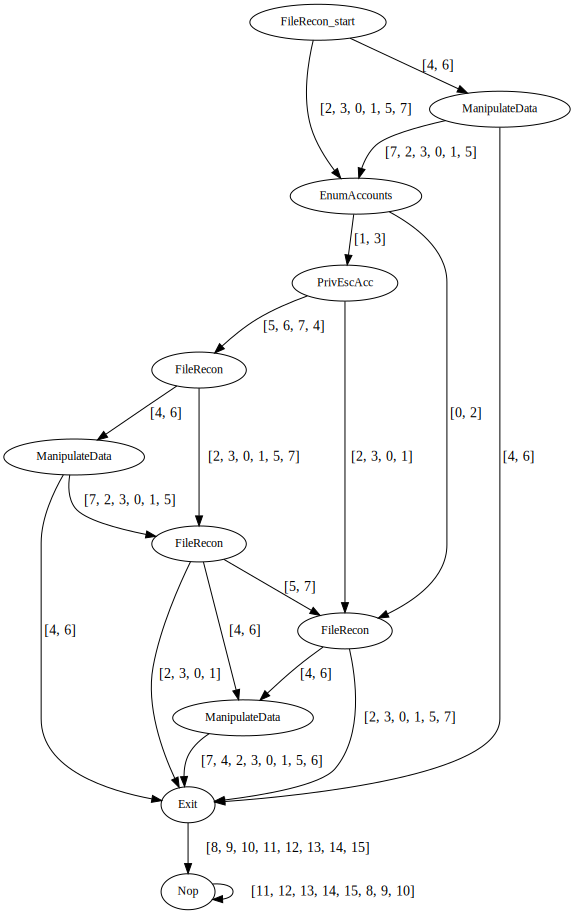

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1479140596_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


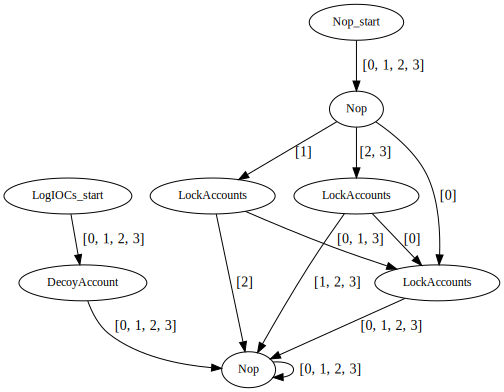

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/1108889615_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


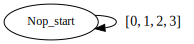

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/455888635_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, termin

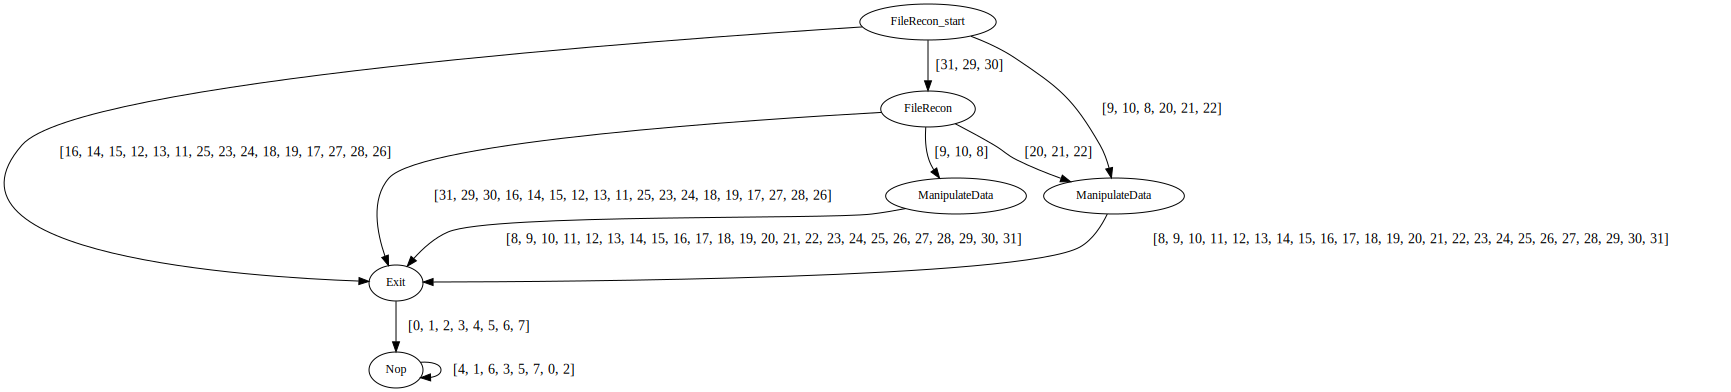

Displaying /home/ashinde/PhD/CaffineBravery/results_l3_control/3565780_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                             none

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

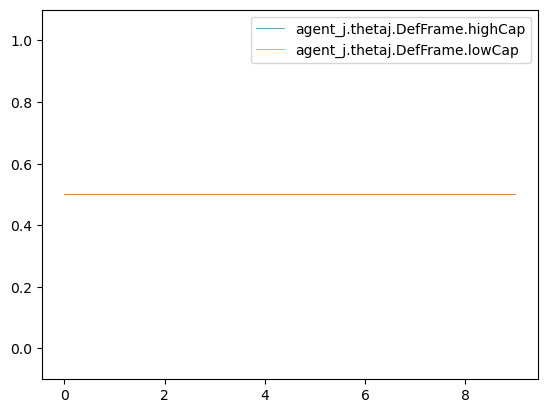

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.425                    0.575            Nop   
3                   0.425                    0.575            Nop   
4                   0.425                    0.575            Nop   
5                   0.425                    0.575            Nop   
6                   0.425                    0.575            Nop   
7                   0.425                    0.575            Nop   
8                   0.425                    0.575            Nop   
9                   0.425                    0.575            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                        file_enum  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.7                                 0.0   
2                        0.7                                 0.0   
3                        0.7                                 0.0   
4                        0.7                                 0.0   
5                        0.7                                 0.0   
6                        0.7                                 0.0   
7                        0.7                                 0.0   
8                        0.7                                 0.0   
9                        0.7                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.3           Exit            Nop   
2                        0.3            Nop            Nop   
3                        0.3            Nop            Nop   
4                        0.3            Nop            Nop   
5                        0.3            Nop            Nop   
6                        0.3            Nop            Nop   
7                        0.3            Nop            Nop   
8                        0.3            Nop            Nop   
9                        0.3            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

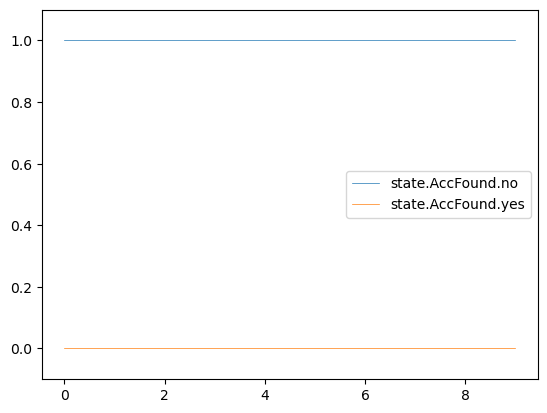

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                        file_enum  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

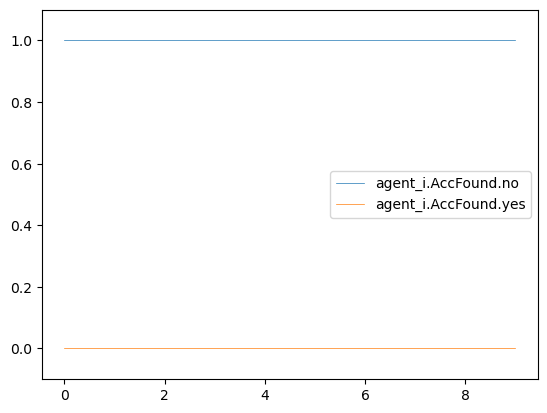

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

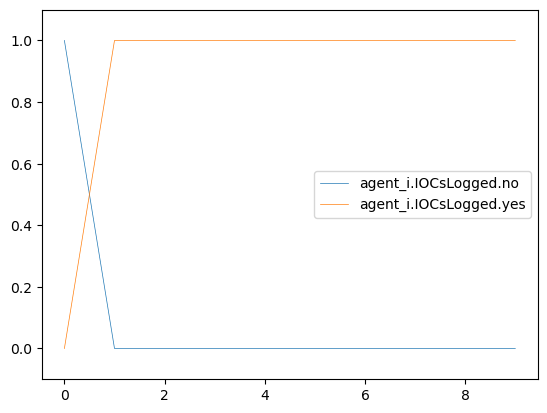

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.85                    0.15           Exit   
2                   0.85                    0.15            Nop   
3                   0.85                    0.15            Nop   
4                   0.85                    0.15            Nop   
5                   0.85                    0.15            Nop   
6                   0.85                    0.15            Nop   
7                   0.85                    0.15            Nop   
8                   0.85                    0.15            Nop   
9                   0.85                    0.15            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

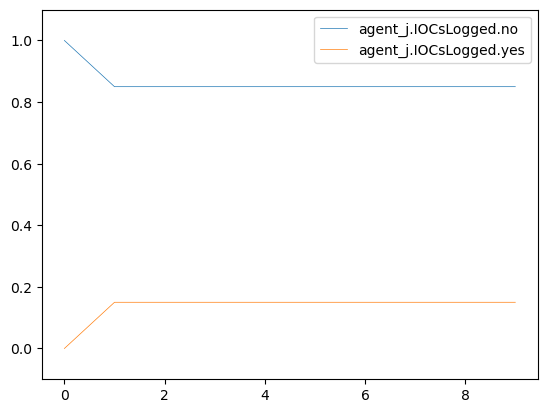

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                        file_enum  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

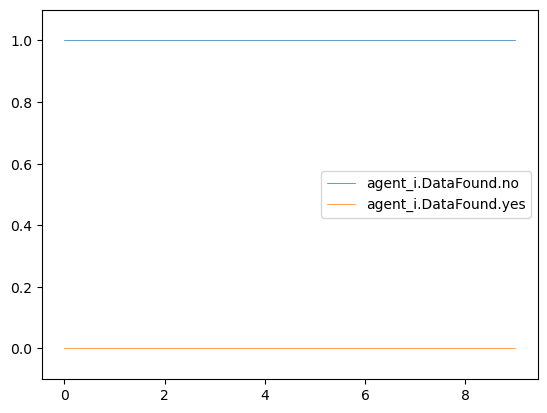

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

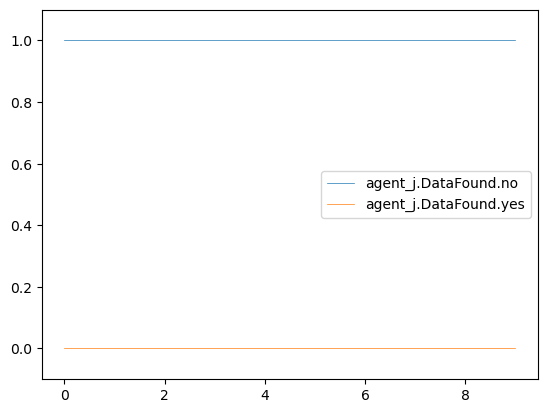

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.968591               0.031409            Nop            Nop   
3              0.999836               0.000164            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                        file_enum  
5                             none  
6                        file_enum  
7                       file_write  
8                       file_write  
9                             none

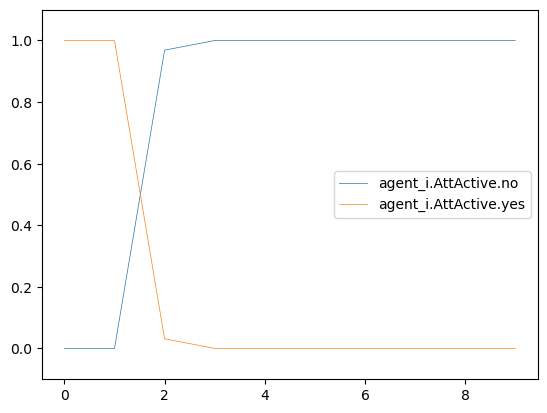

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                         none   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

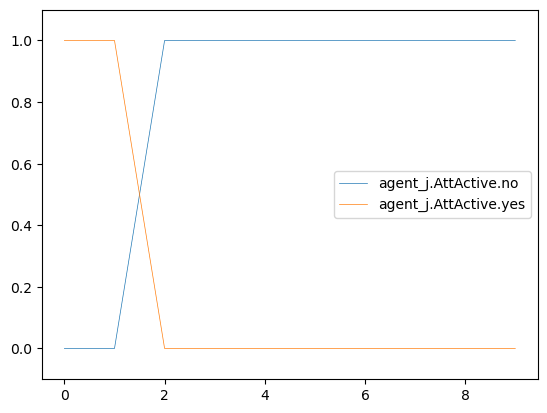

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

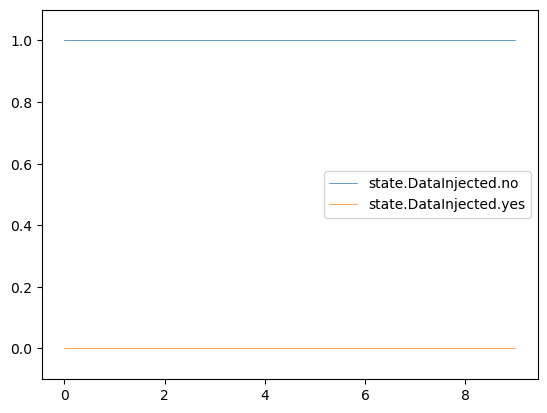

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

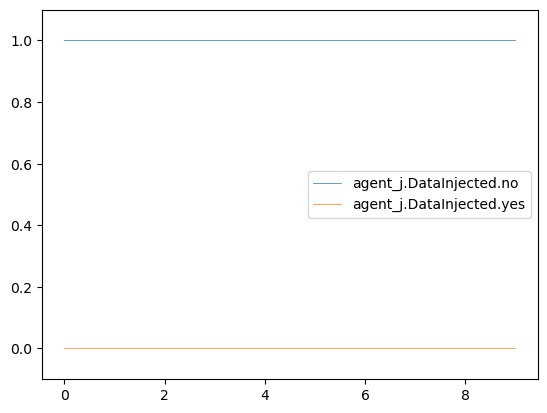

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

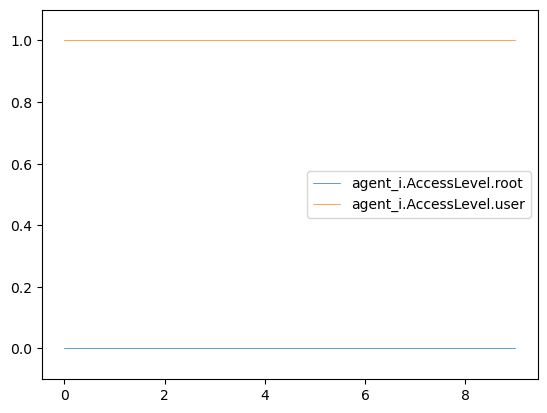

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

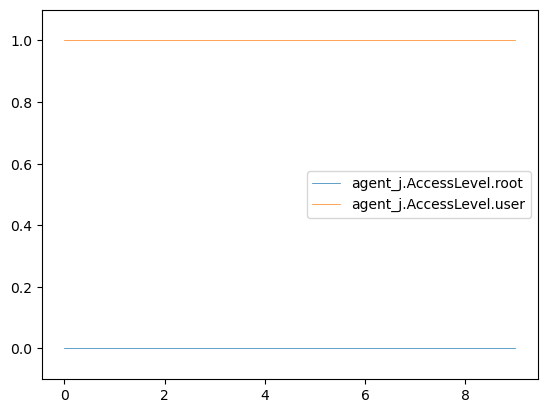

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

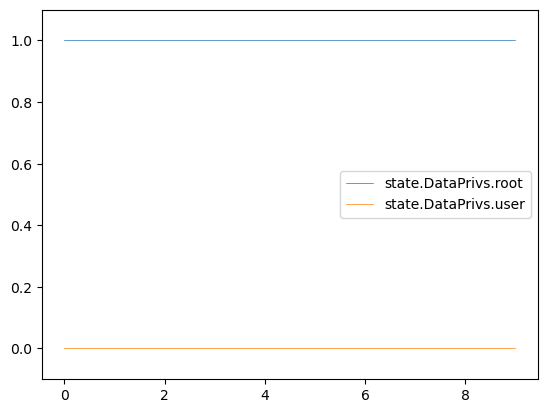

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

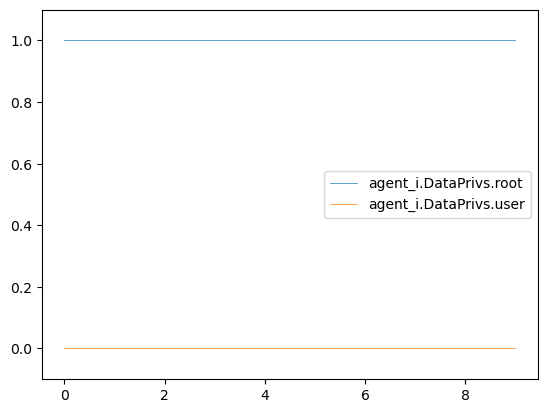

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939           Exit   
2                0.606061                0.393939            Nop   
3                0.606061                0.393939            Nop   
4                0.606061                0.393939            Nop   
5                0.606061                0.393939            Nop   
6                0.606061                0.393939            Nop   
7                0.606061                0.393939            Nop   
8                0.606061                0.393939            Nop   
9                0.606061                0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

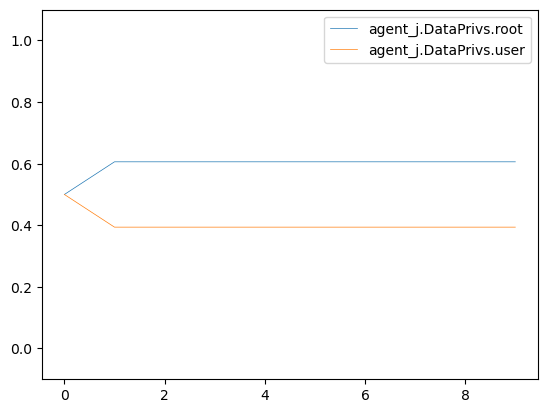

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                       file_write  
8            Nop                       file_write  
9            Nop                             none

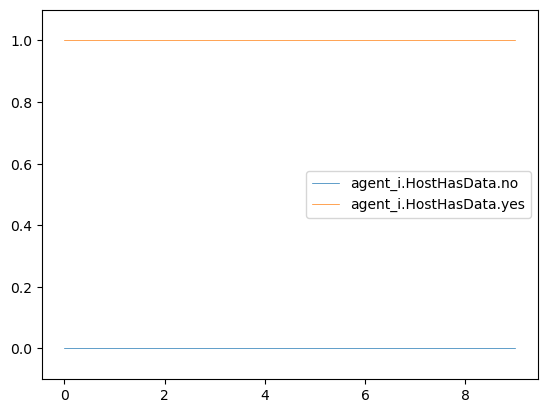

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939           Exit   
2                0.606061                 0.393939            Nop   
3                0.606061                 0.393939            Nop   
4                0.606061                 0.393939            Nop   
5                0.606061                 0.393939            Nop   
6                0.606061                 0.393939            Nop   
7                0.606061                 0.393939            Nop   
8                0.606061                 0.393939            Nop   
9                0.606061                 0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                            auth                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                         none   
8            Nop                            auth                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

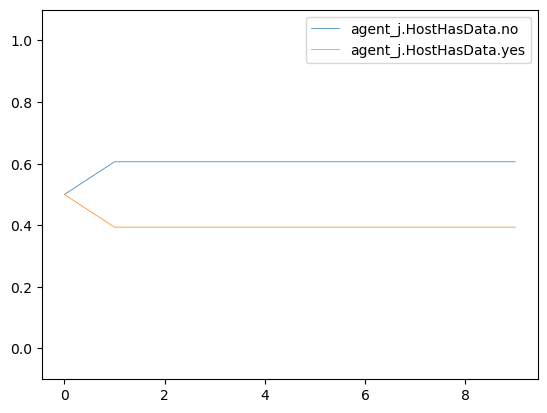

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                             none
2                               1.0                       file_write
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

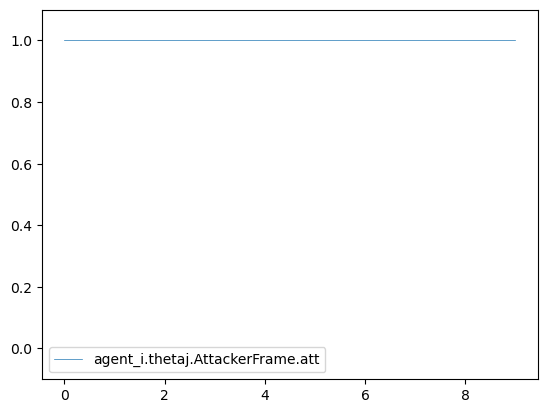

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

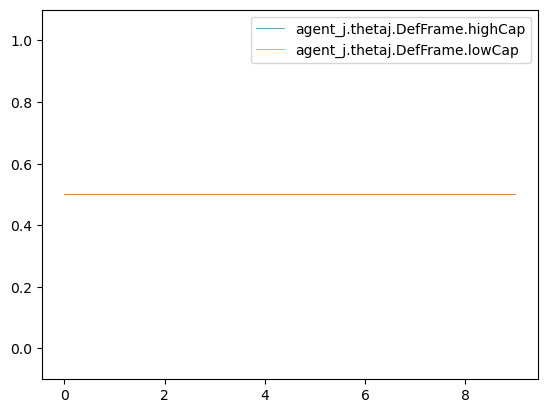

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

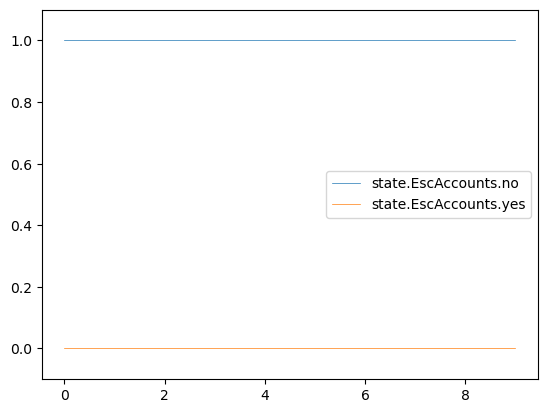

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

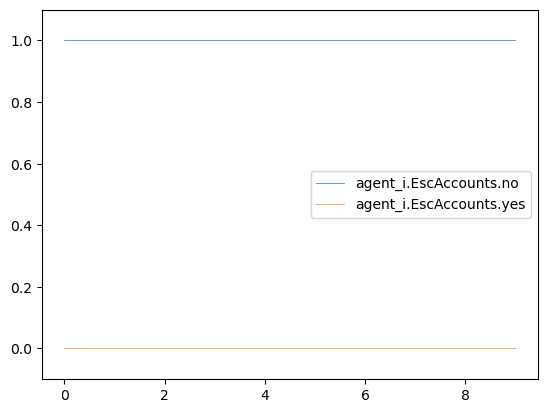

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

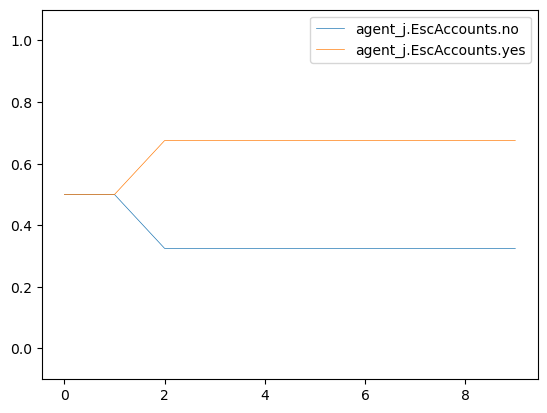

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

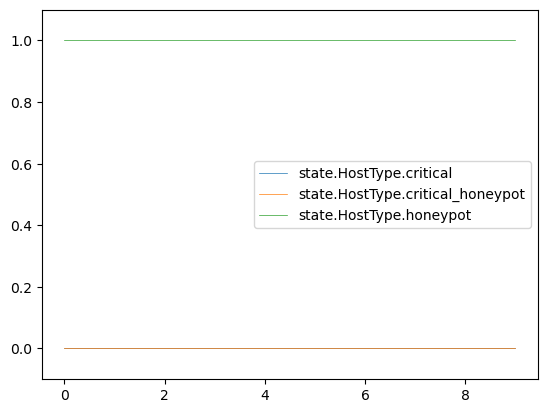

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

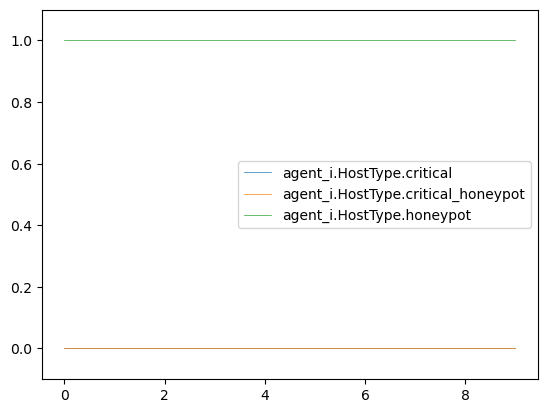

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

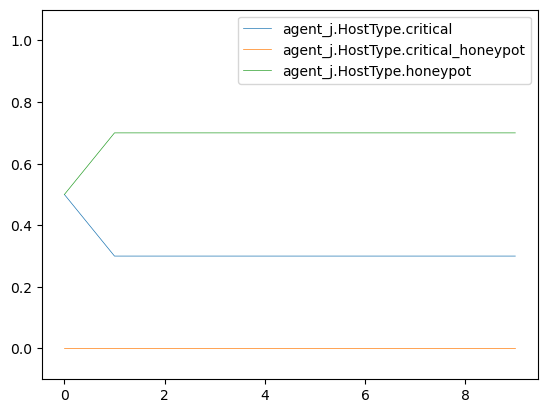

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

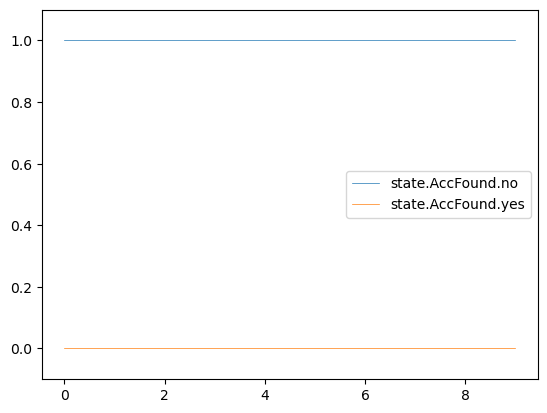

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

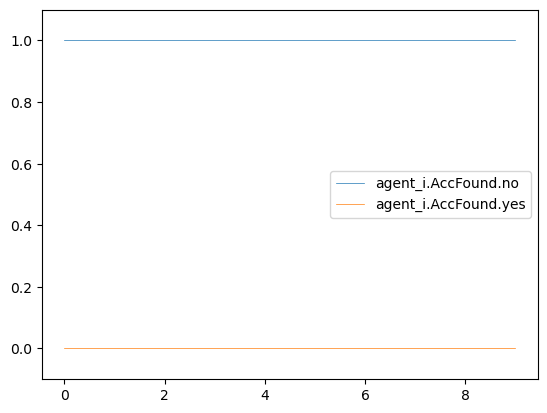

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

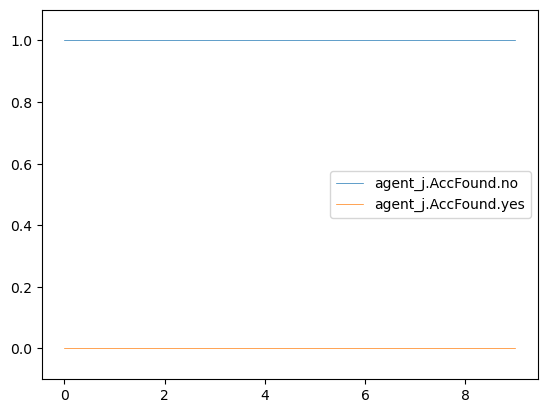

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

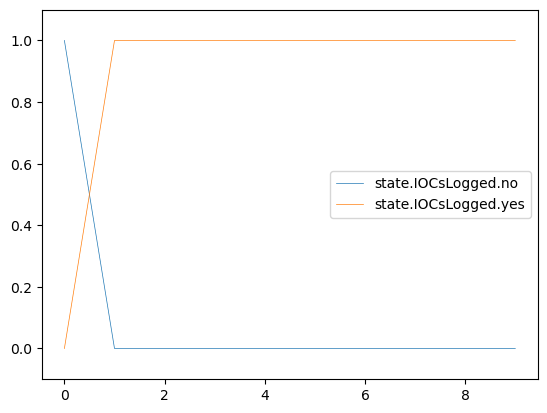

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

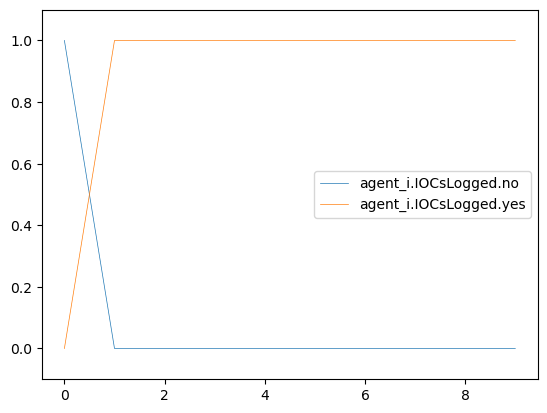

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

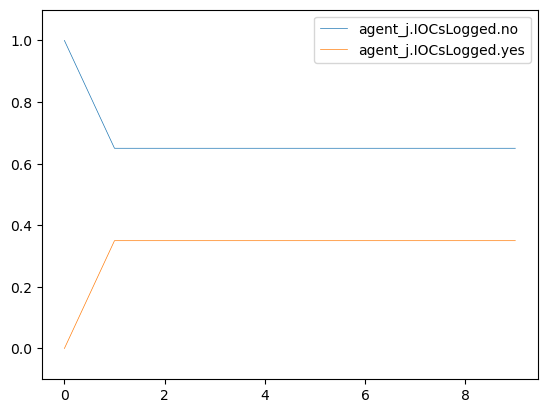

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

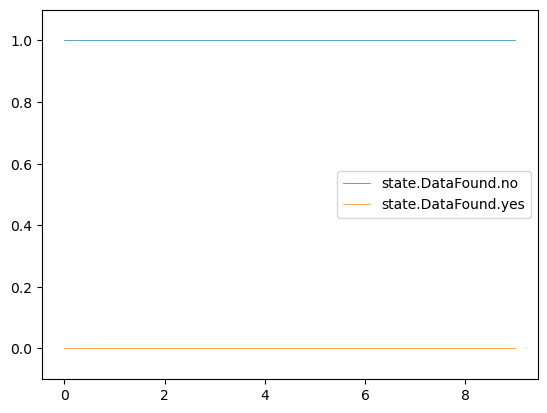

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

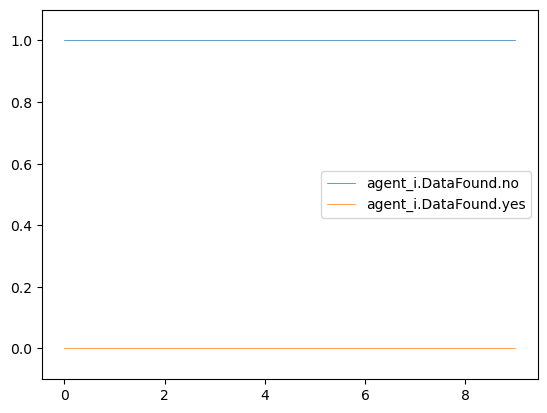

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

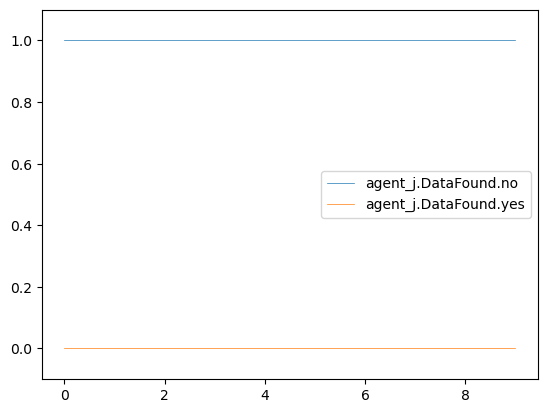

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.968591               0.031409            Nop            Nop   
3              0.992033               0.007967            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

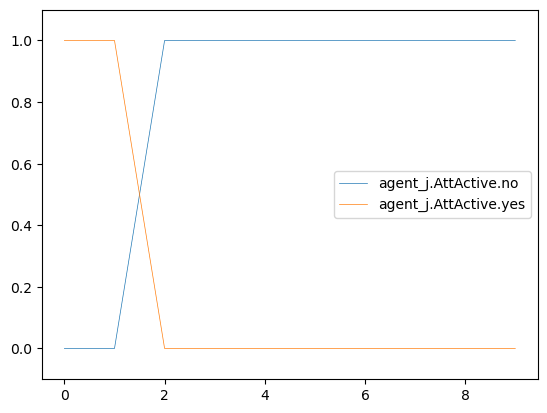

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

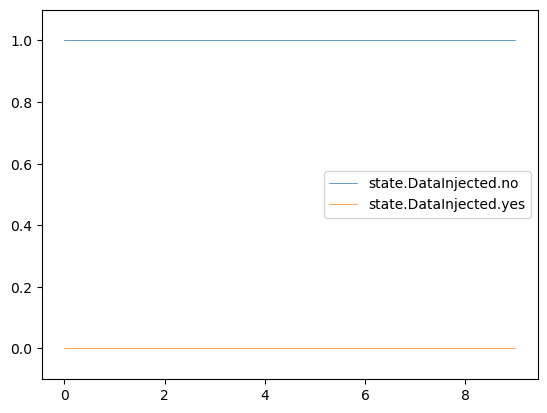

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

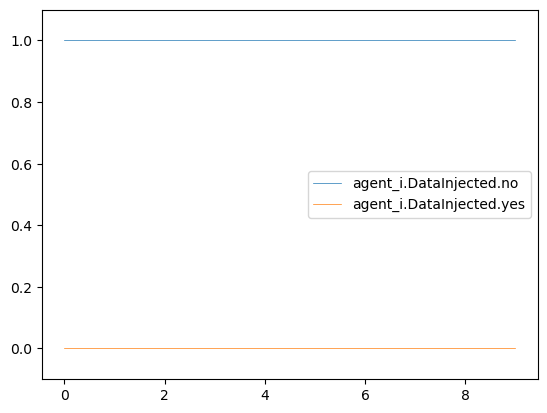

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

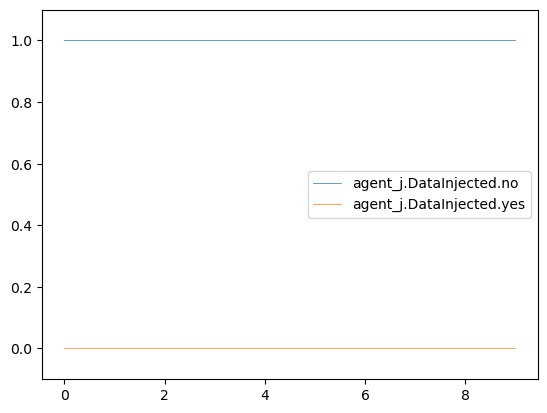

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

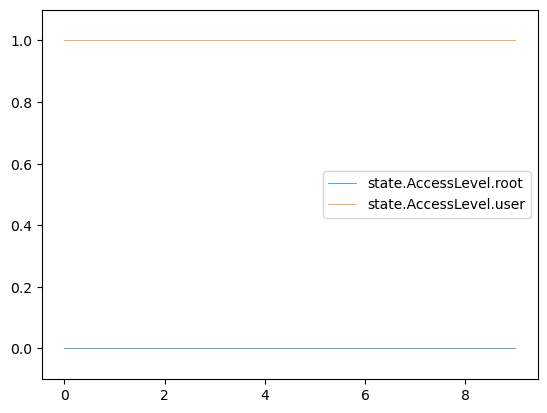

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

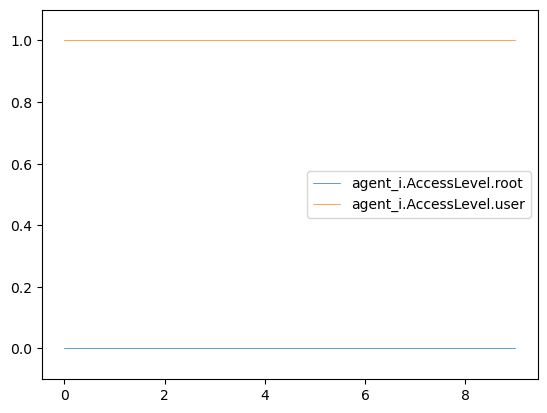

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

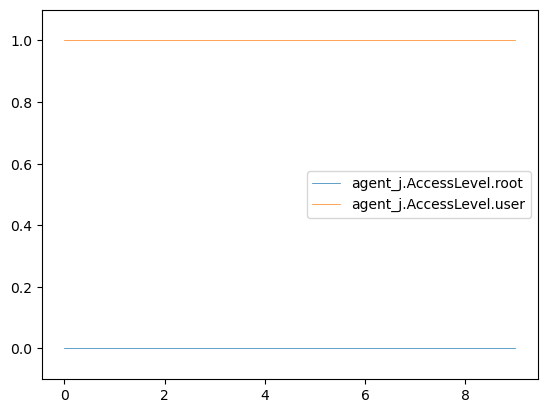

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

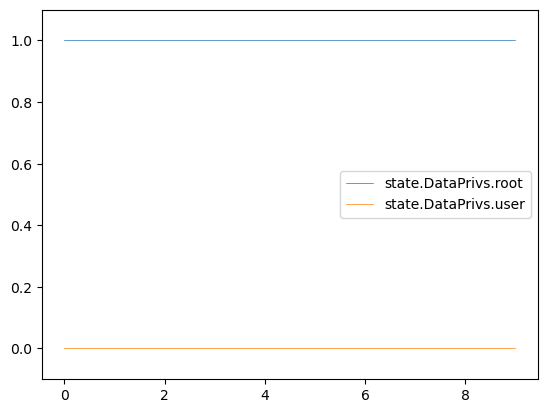

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

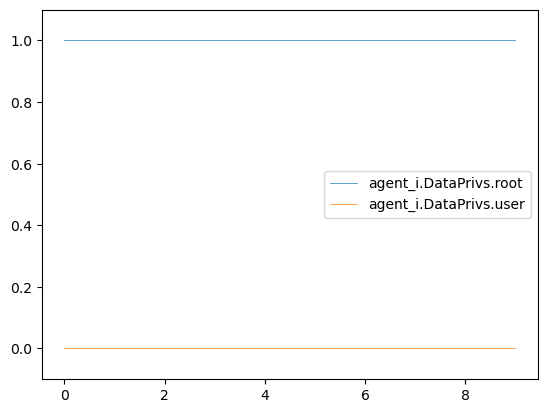

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939           Exit   
2                0.606061                0.393939            Nop   
3                0.606061                0.393939            Nop   
4                0.606061                0.393939            Nop   
5                0.606061                0.393939            Nop   
6                0.606061                0.393939            Nop   
7                0.606061                0.393939            Nop   
8                0.606061                0.393939            Nop   
9                0.606061                0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

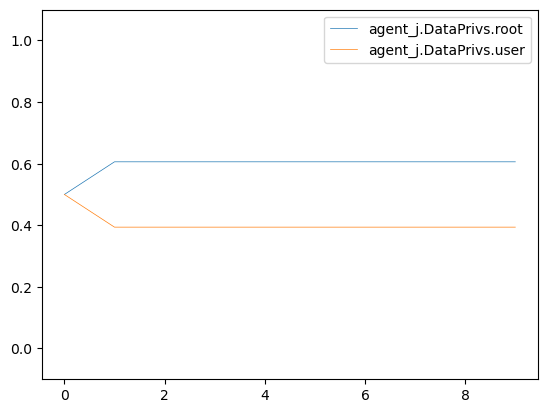

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

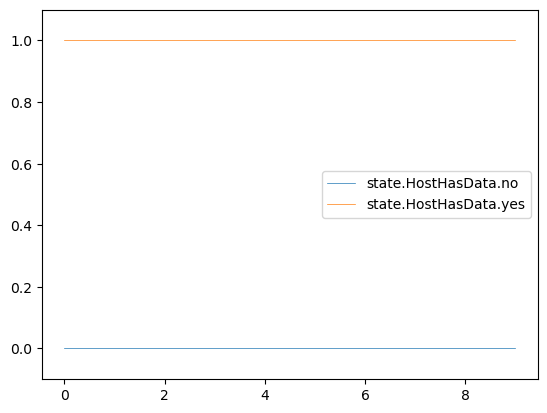

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

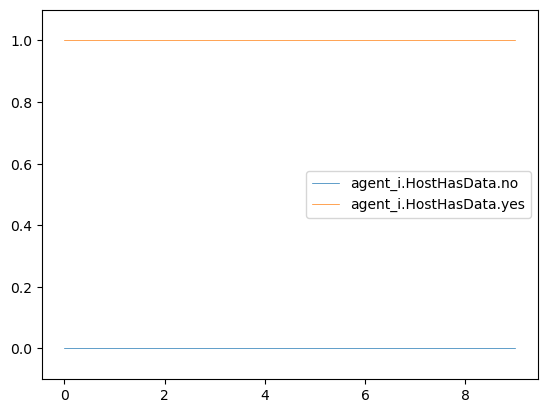

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939           Exit   
2                0.606061                 0.393939            Nop   
3                0.606061                 0.393939            Nop   
4                0.606061                 0.393939            Nop   
5                0.606061                 0.393939            Nop   
6                0.606061                 0.393939            Nop   
7                0.606061                 0.393939            Nop   
8                0.606061                 0.393939            Nop   
9                0.606061                 0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                   user_files   
4            Nop                          denied                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

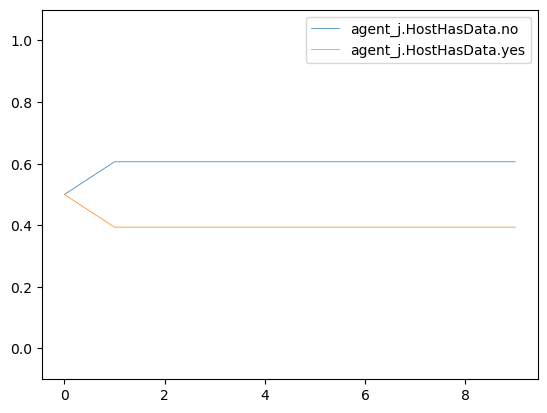

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

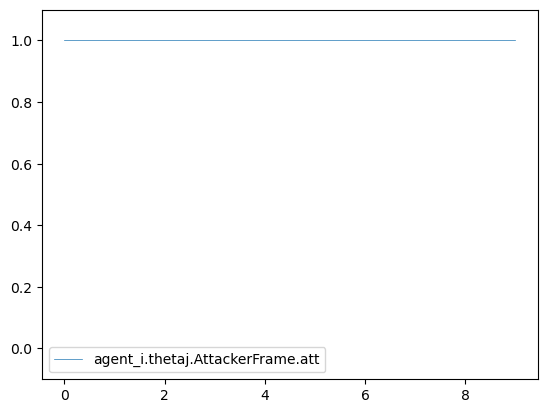

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

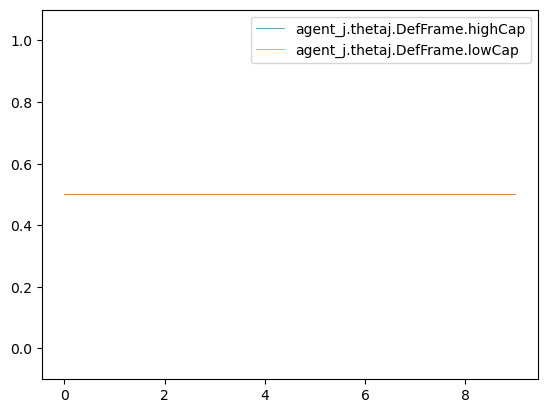

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

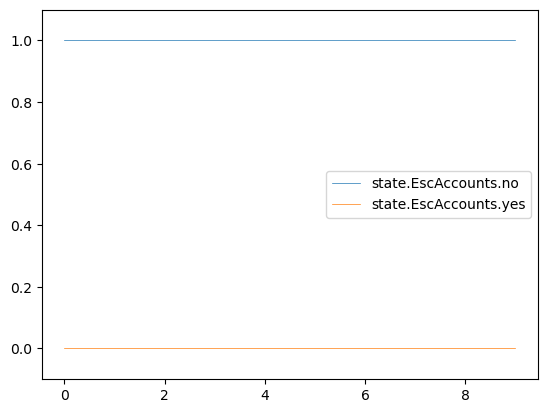

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

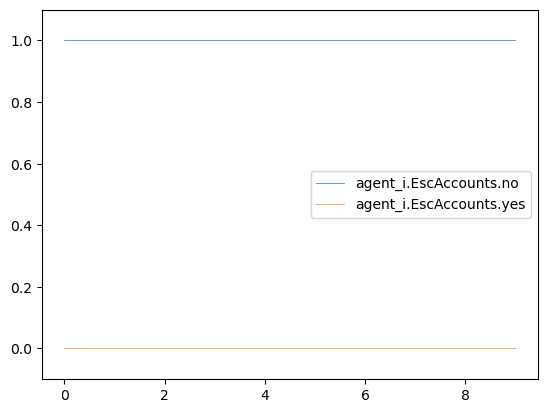

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

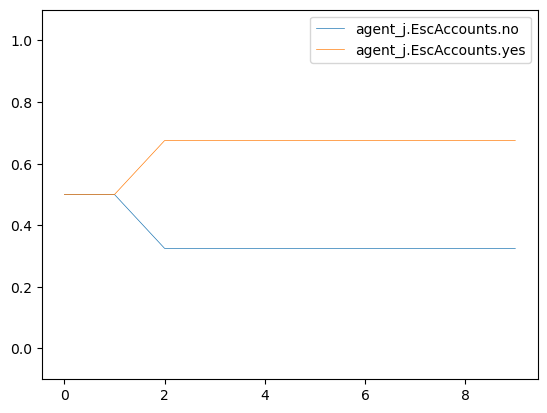

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

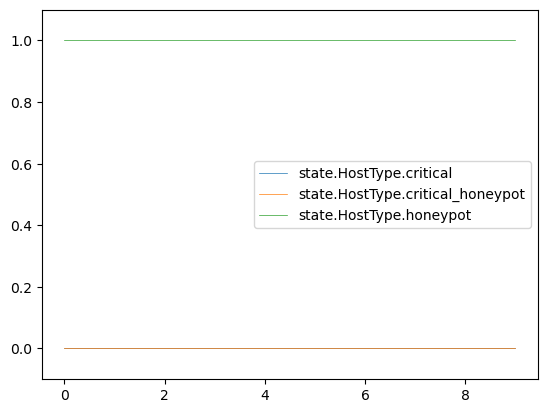

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

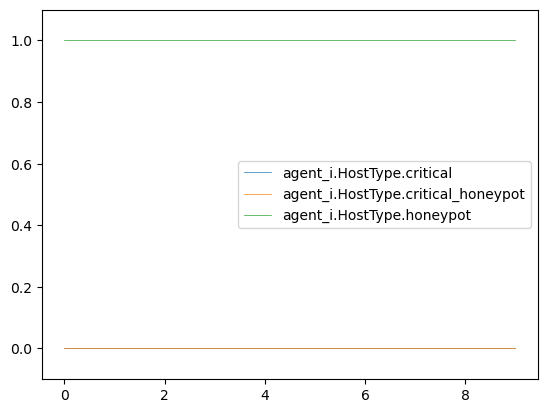

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

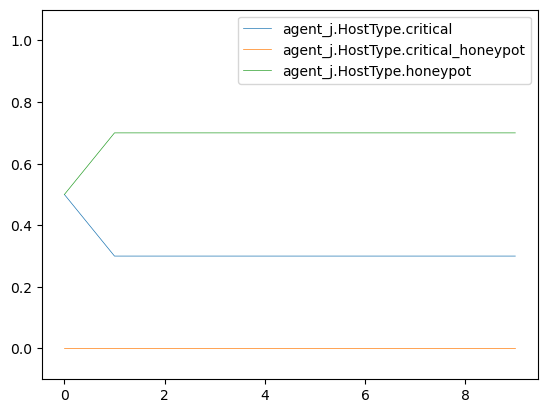

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

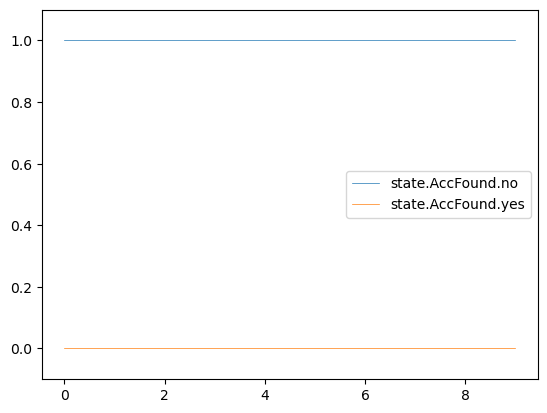

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

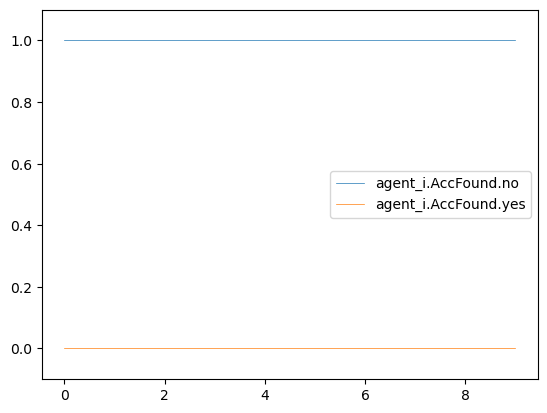

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

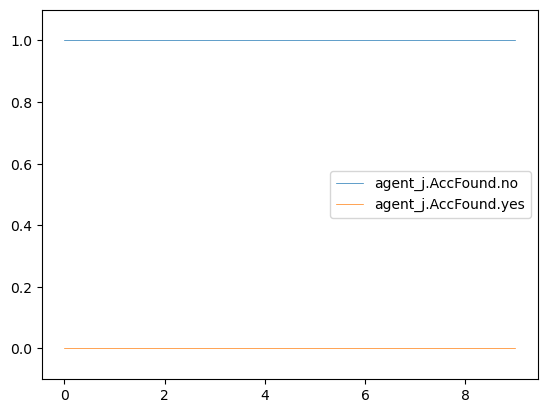

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

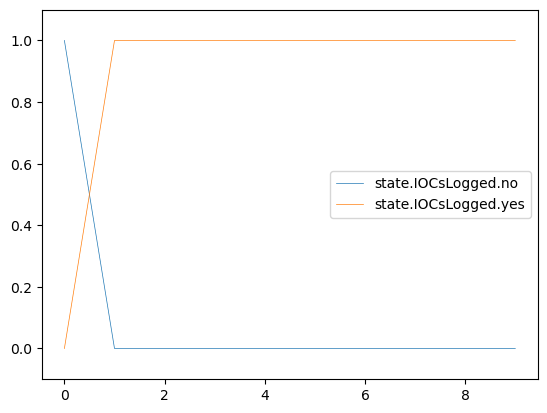

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

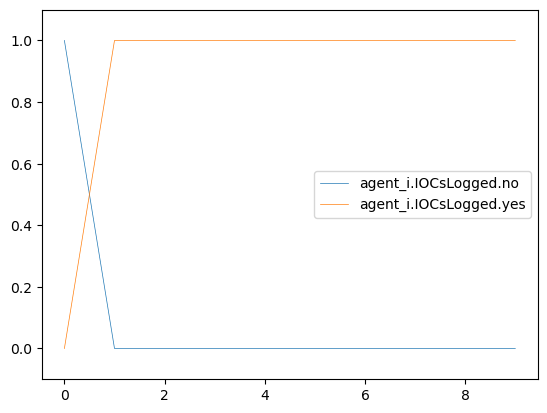

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

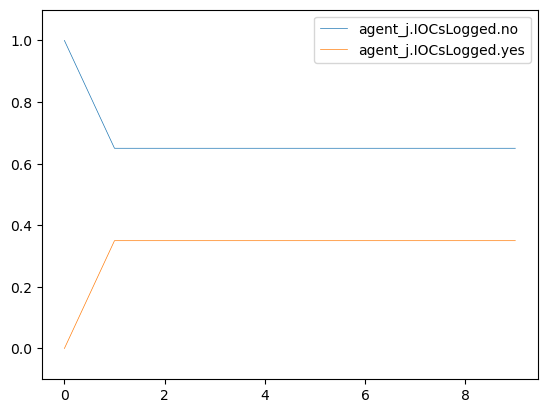

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

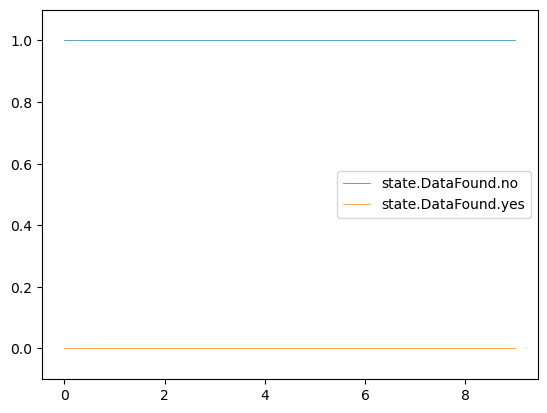

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

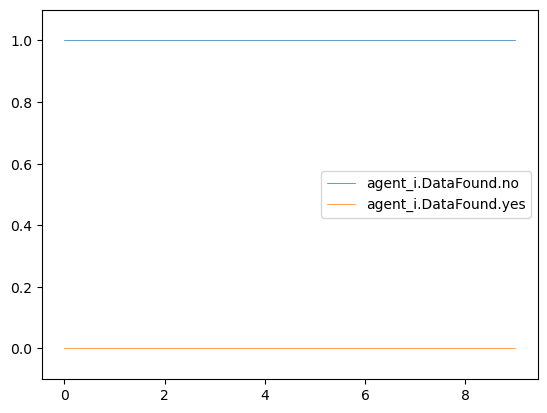

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016           Exit            Nop   
2              0.954984               0.045016            Nop            Nop   
3              0.954984               0.045016            Nop            Nop   
4              0.954984               0.045016            Nop            Nop   
5              0.954984               0.045016            Nop            Nop   
6              0.954984               0.045016            Nop            Nop   
7              0.954984               0.045016            Nop            Nop   
8              0.954984               0.045016            Nop            Nop   
9              0.954984               0.045016            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.626923               0.373077            Nop            Nop   
3              0.994808               0.005192            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                       file_write  
2                        file_enum  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

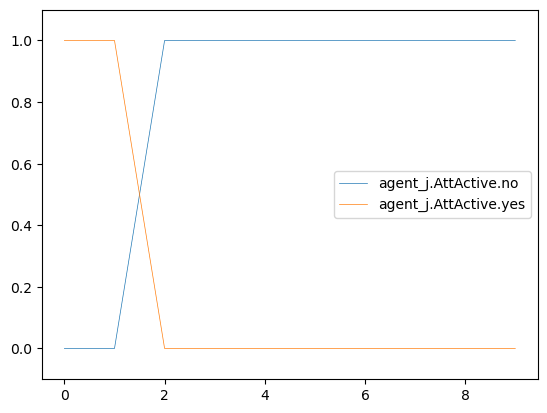

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

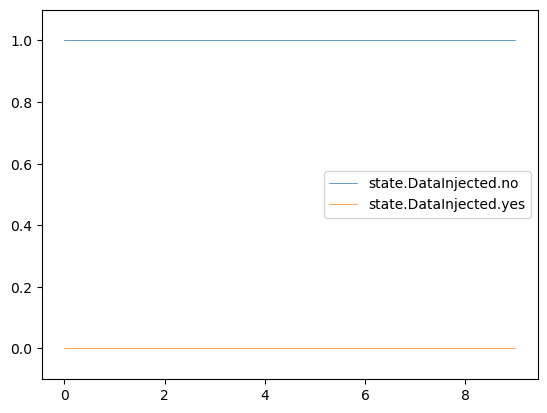

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

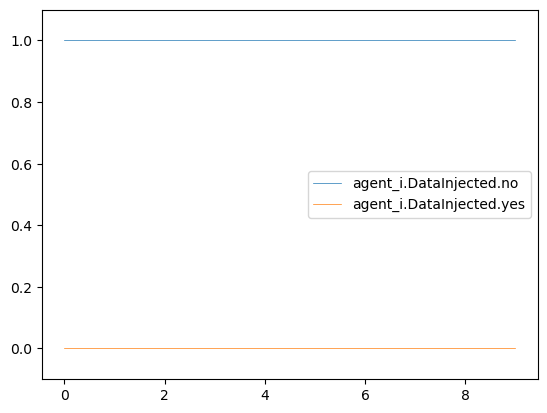

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

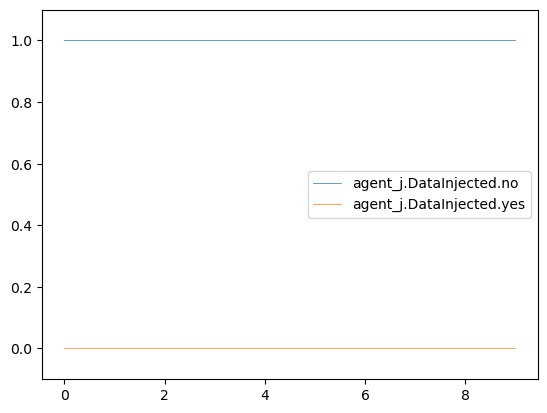

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

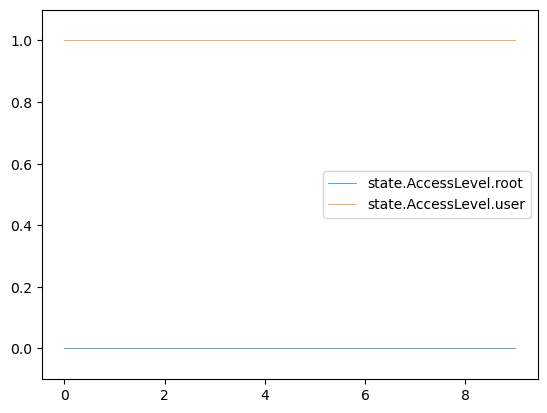

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

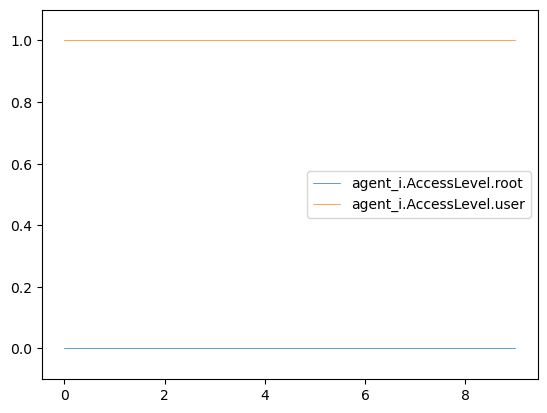

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

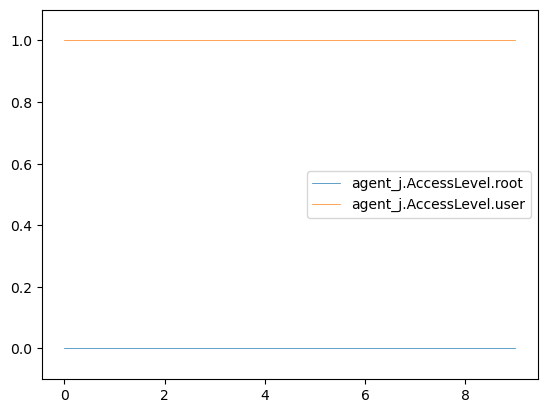

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

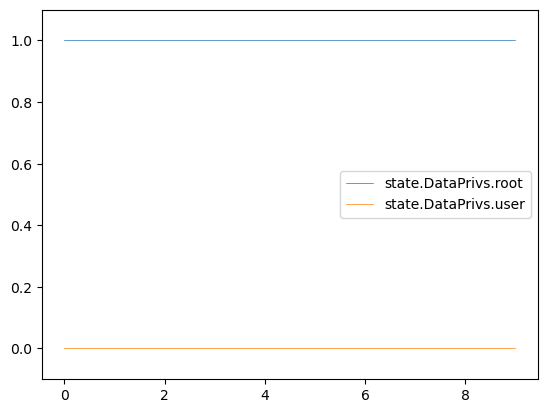

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

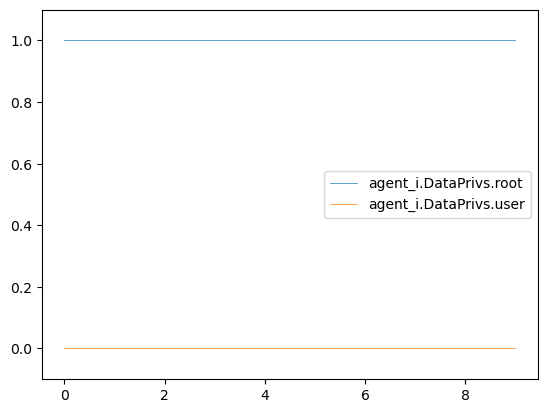

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222           Exit   
2                0.578778                0.421222            Nop   
3                0.578778                0.421222            Nop   
4                0.578778                0.421222            Nop   
5                0.578778                0.421222            Nop   
6                0.578778                0.421222            Nop   
7                0.578778                0.421222            Nop   
8                0.578778                0.421222            Nop   
9                0.578778                0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

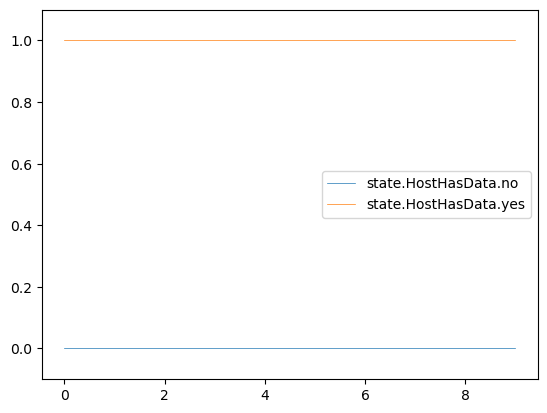

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1           Exit                       file_write  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

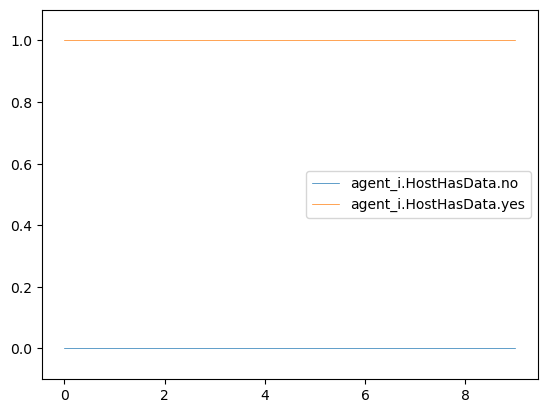

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222           Exit   
2                0.578778                 0.421222            Nop   
3                0.578778                 0.421222            Nop   
4                0.578778                 0.421222            Nop   
5                0.578778                 0.421222            Nop   
6                0.578778                 0.421222            Nop   
7                0.578778                 0.421222            Nop   
8                0.578778                 0.421222            Nop   
9                0.578778                 0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                         none   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

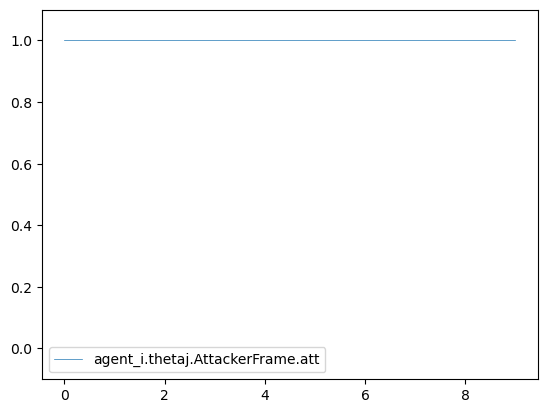

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

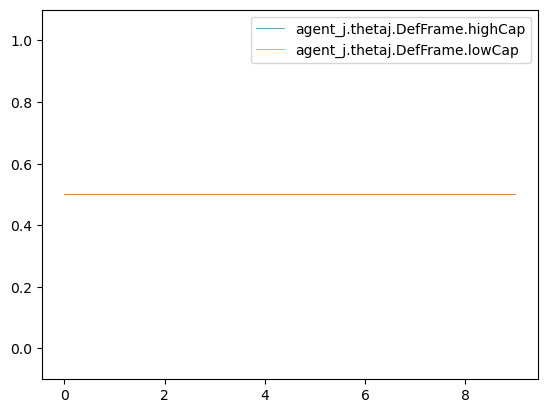

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

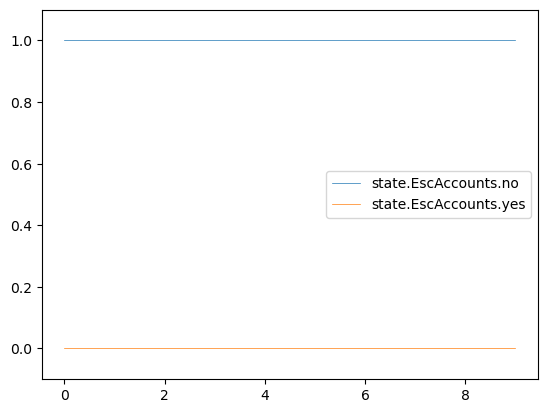

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

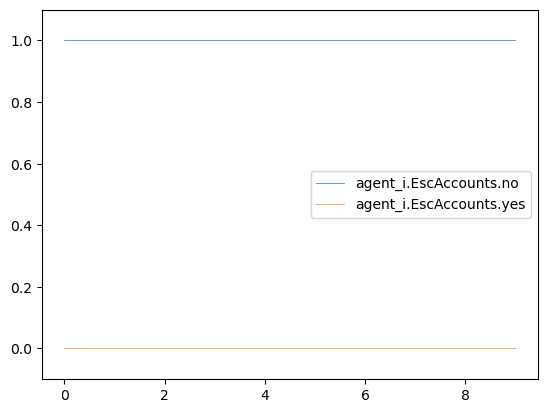

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

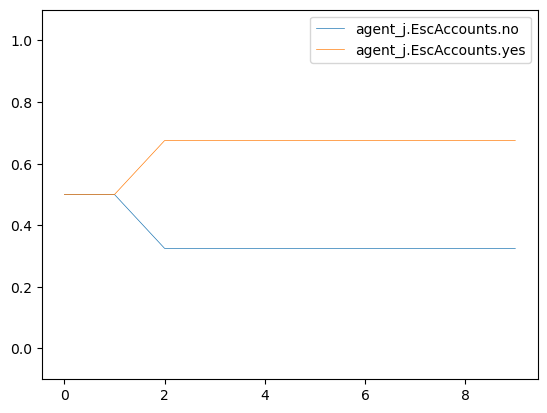

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

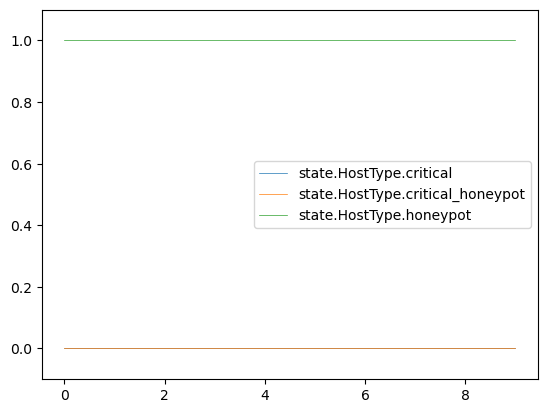

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

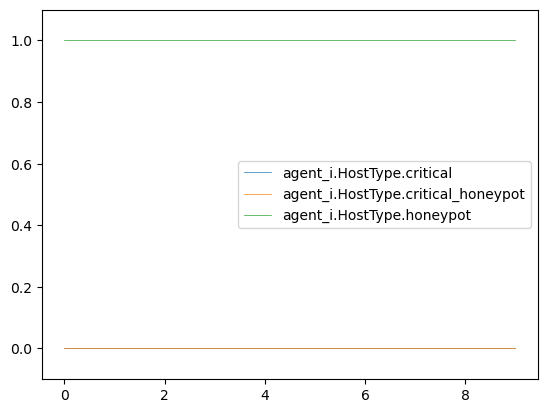

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

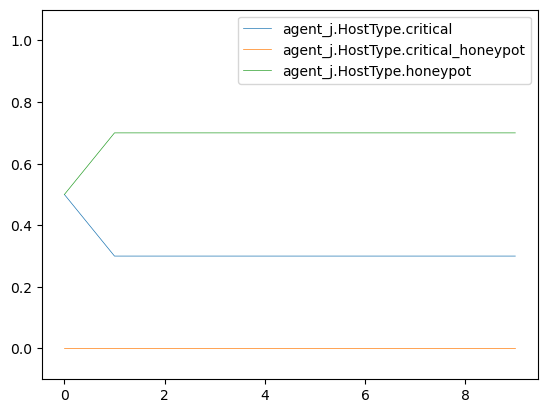

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

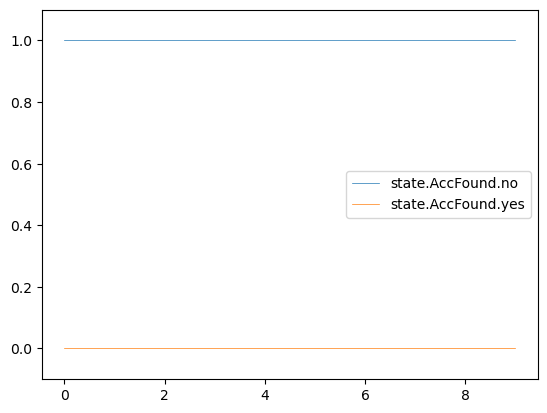

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

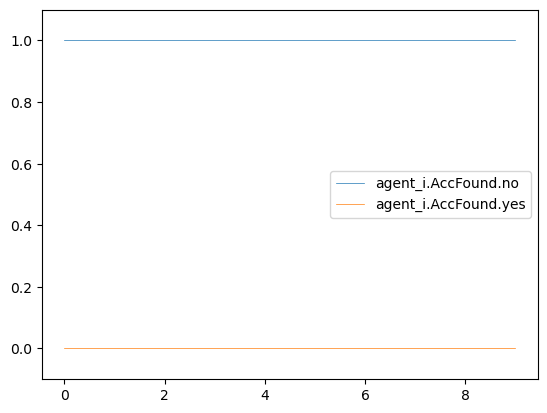

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

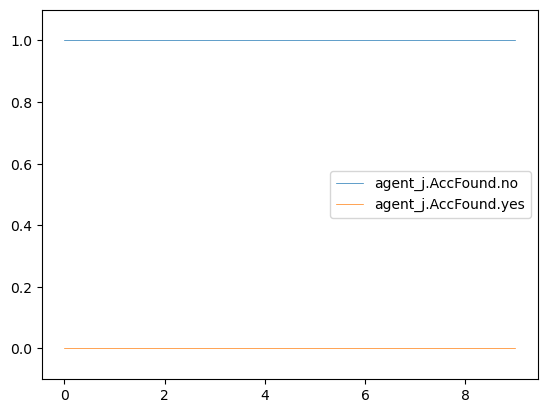

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

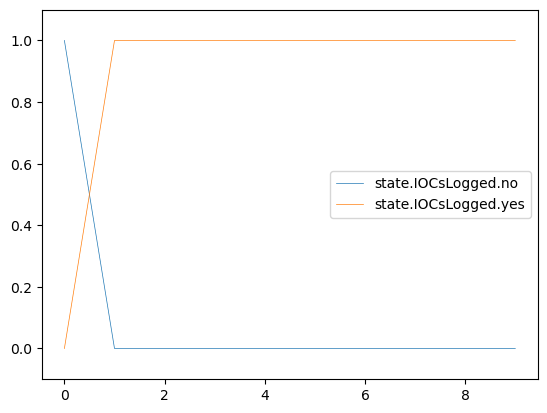

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

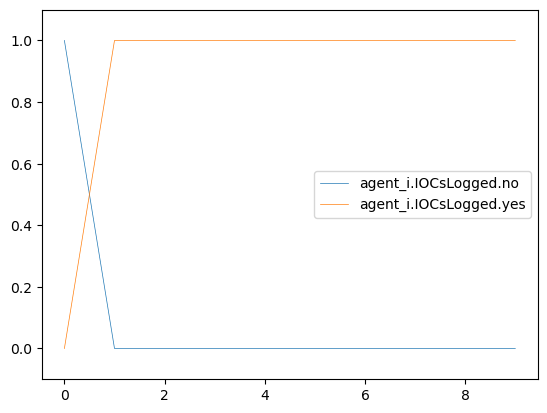

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

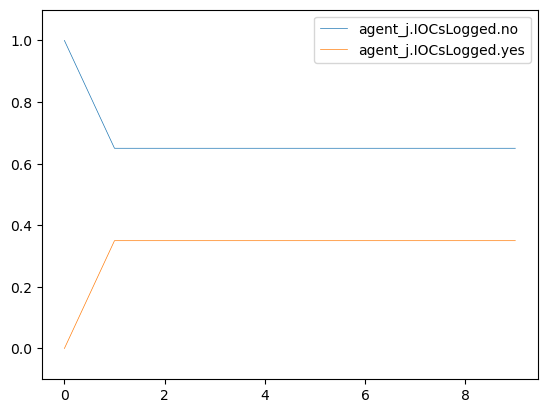

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

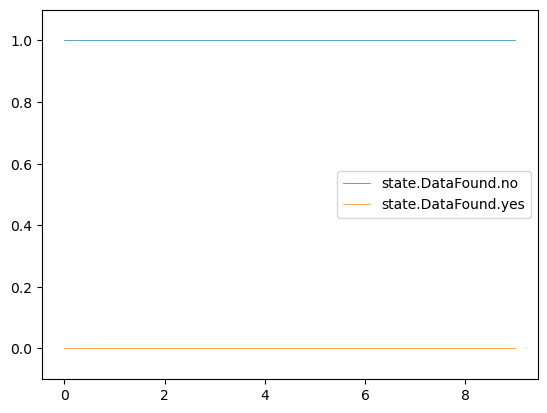

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

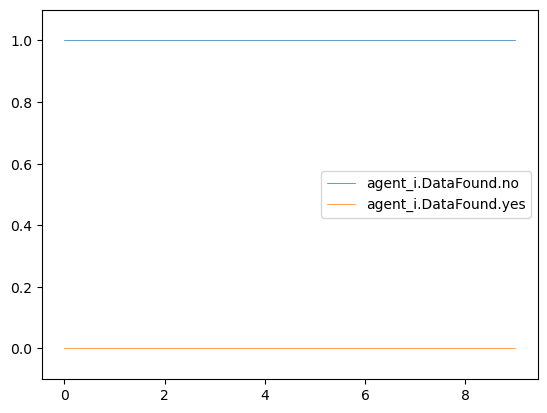

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016           Exit            Nop   
2              0.954984               0.045016            Nop            Nop   
3              0.954984               0.045016            Nop            Nop   
4              0.954984               0.045016            Nop            Nop   
5              0.954984               0.045016            Nop            Nop   
6              0.954984               0.045016            Nop            Nop   
7              0.954984               0.045016            Nop            Nop   
8              0.954984               0.045016            Nop            Nop   
9              0.954984               0.045016            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

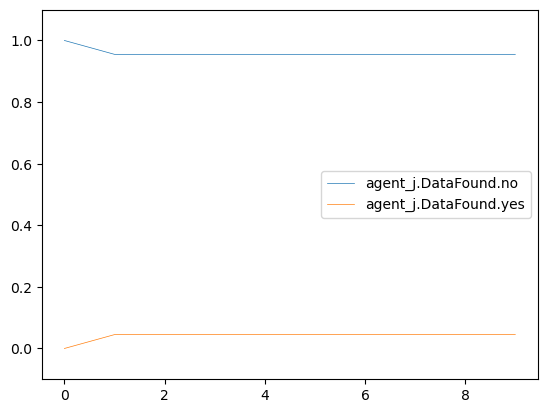

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

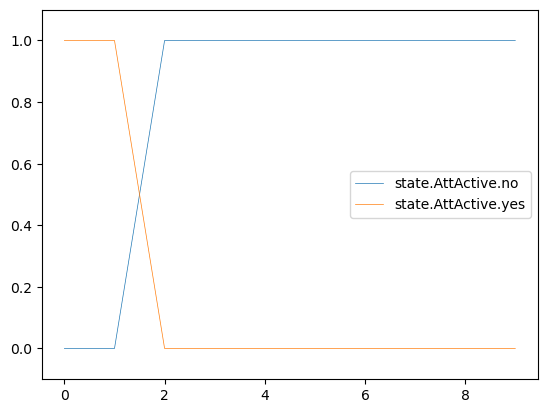

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.626923               0.373077            Nop            Nop   
3              0.994808               0.005192            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

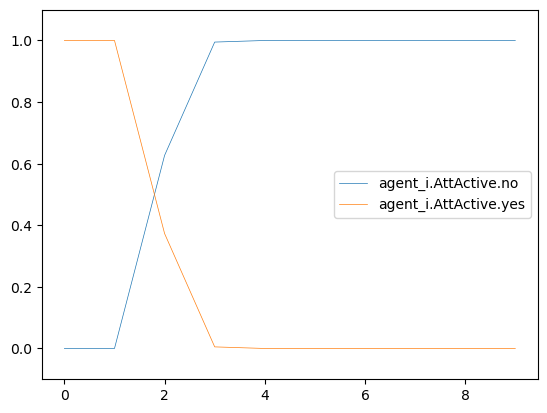

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

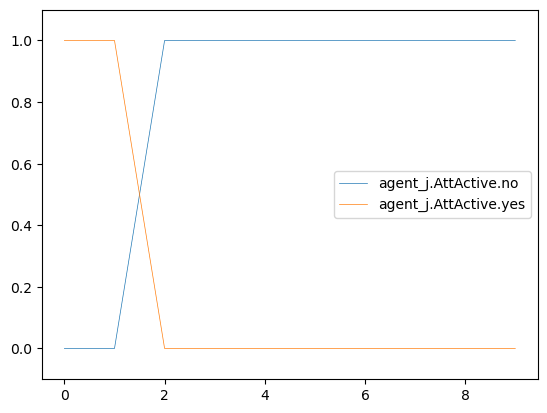

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

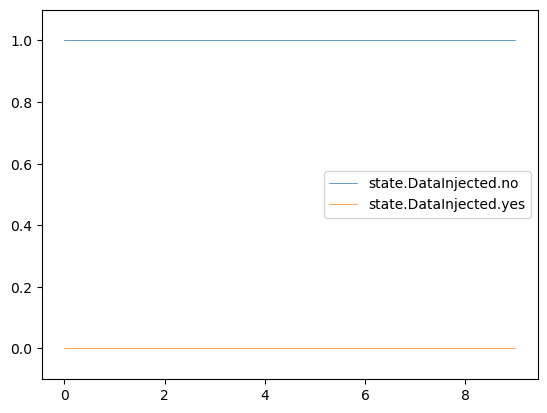

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

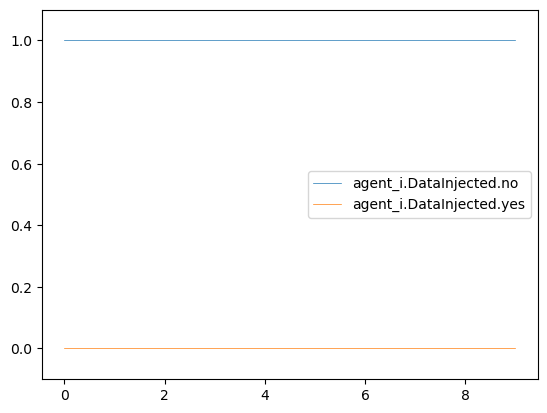

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

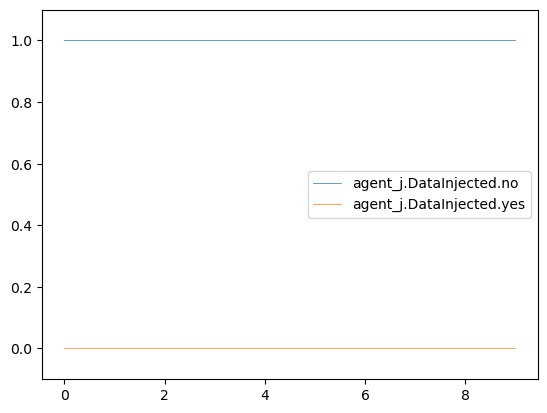

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

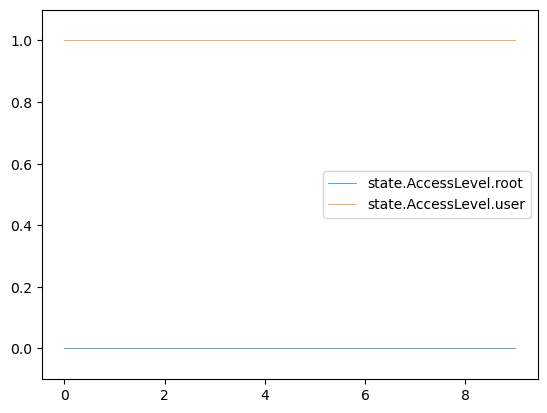

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

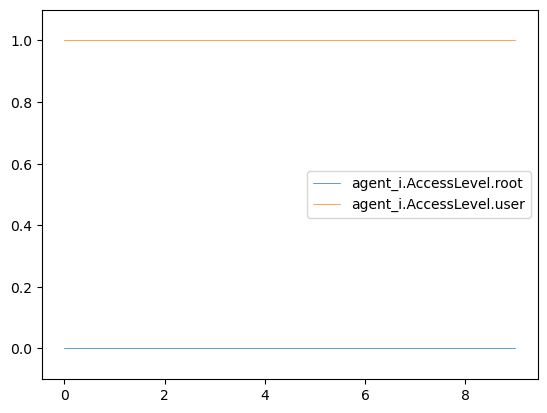

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

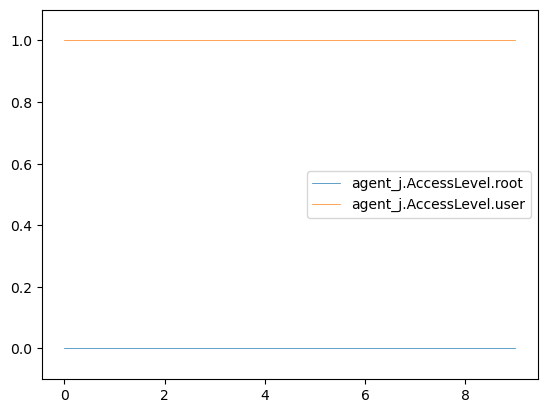

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

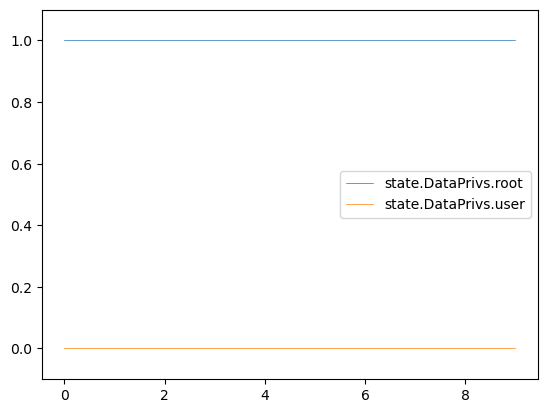

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

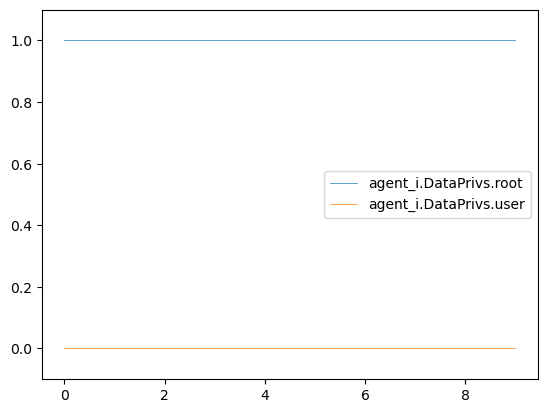

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222           Exit   
2                0.578778                0.421222            Nop   
3                0.578778                0.421222            Nop   
4                0.578778                0.421222            Nop   
5                0.578778                0.421222            Nop   
6                0.578778                0.421222            Nop   
7                0.578778                0.421222            Nop   
8                0.578778                0.421222            Nop   
9                0.578778                0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

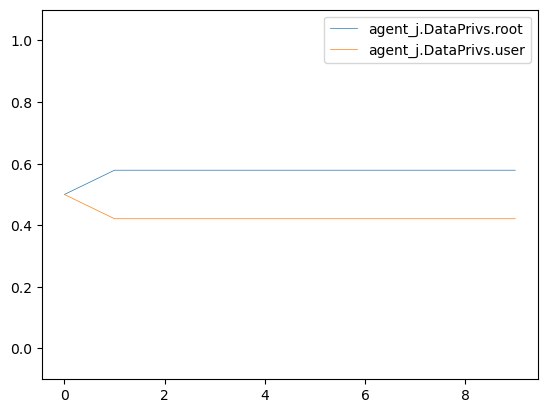

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

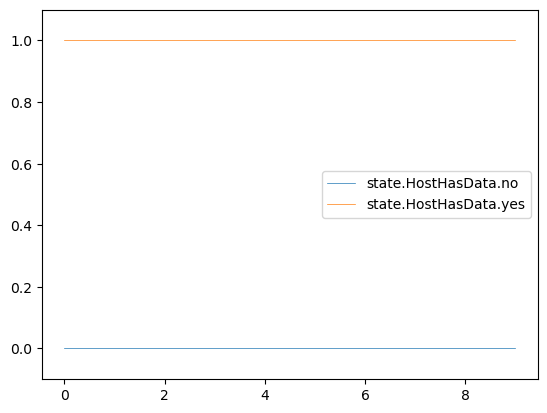

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                        file_enum  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

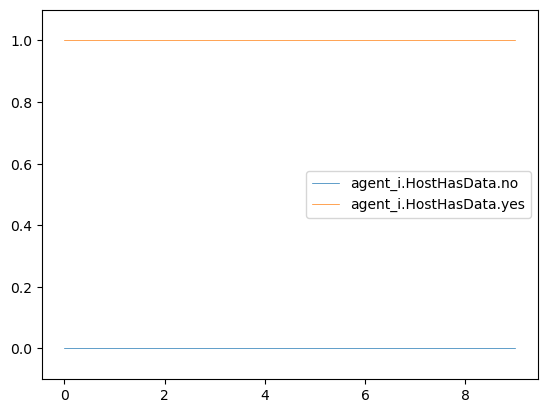

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222           Exit   
2                0.578778                 0.421222            Nop   
3                0.578778                 0.421222            Nop   
4                0.578778                 0.421222            Nop   
5                0.578778                 0.421222            Nop   
6                0.578778                 0.421222            Nop   
7                0.578778                 0.421222            Nop   
8                0.578778                 0.421222            Nop   
9                0.578778                 0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                         none   
2            Nop                            auth                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                   user_files   
7            Nop                          denied                   user_files   
8            Nop                            auth                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

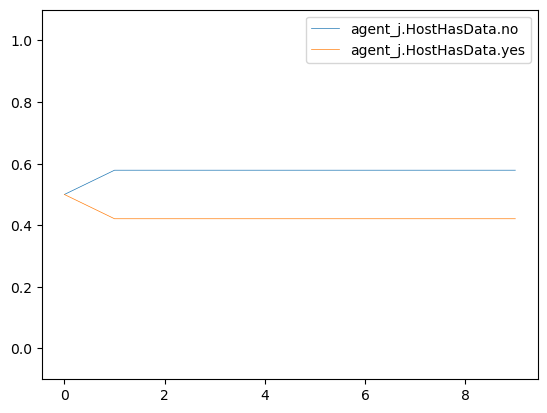

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                             none

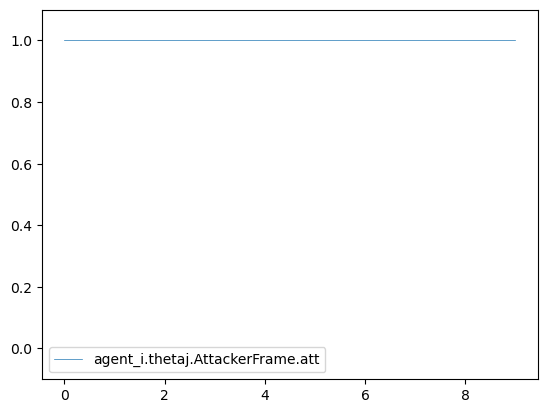

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

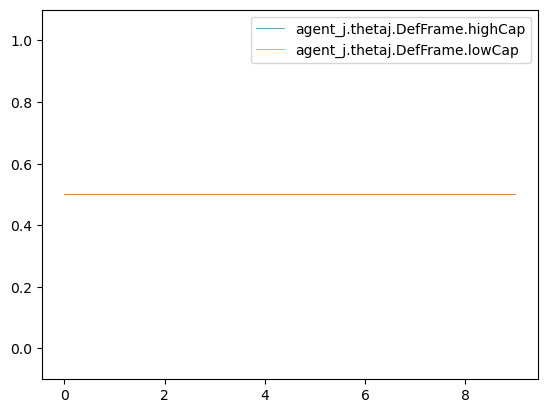

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

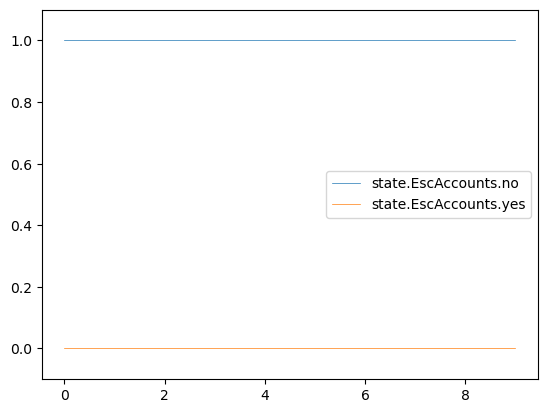

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

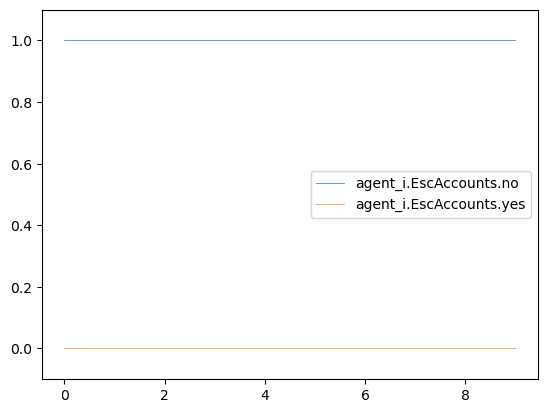

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

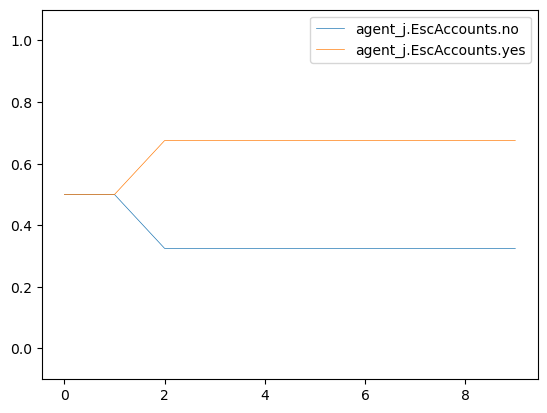

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

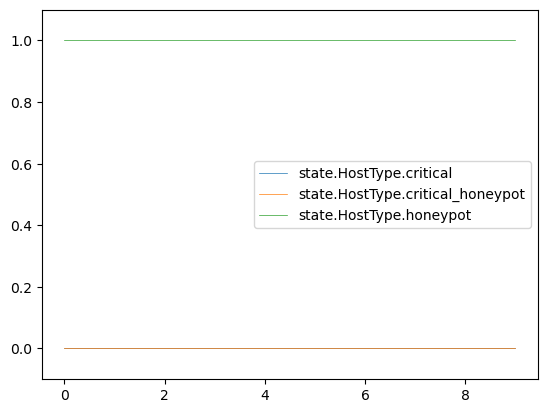

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

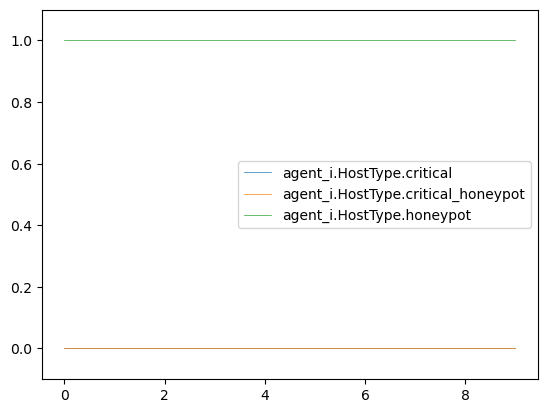

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

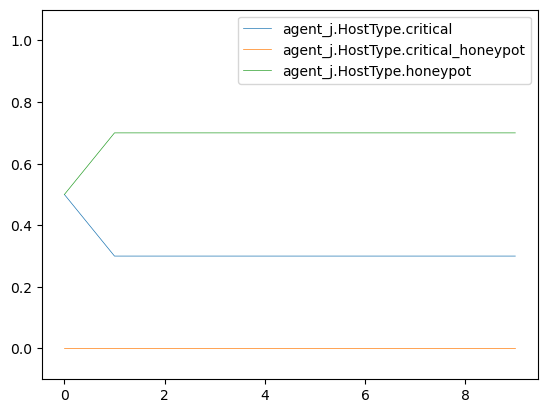

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

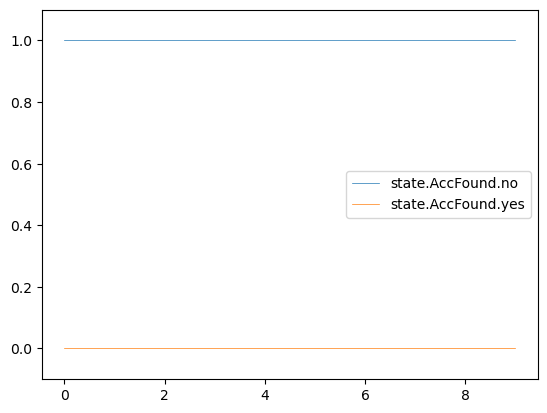

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

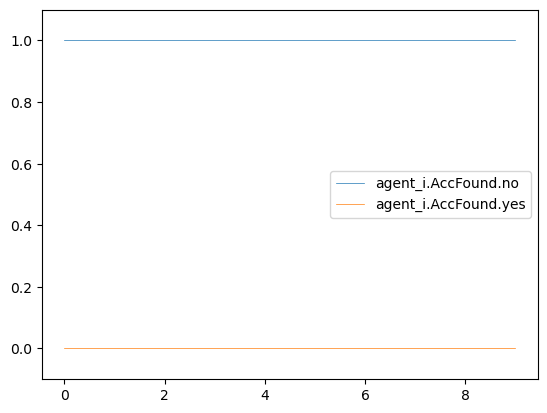

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

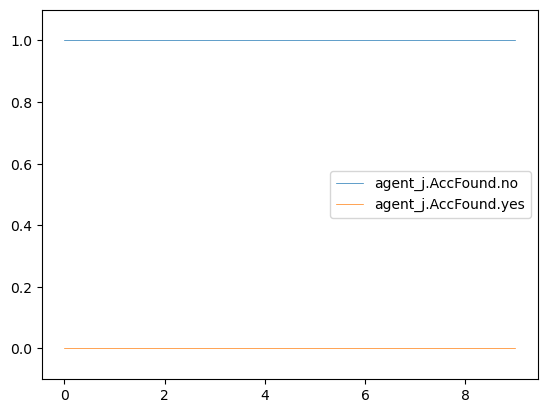

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

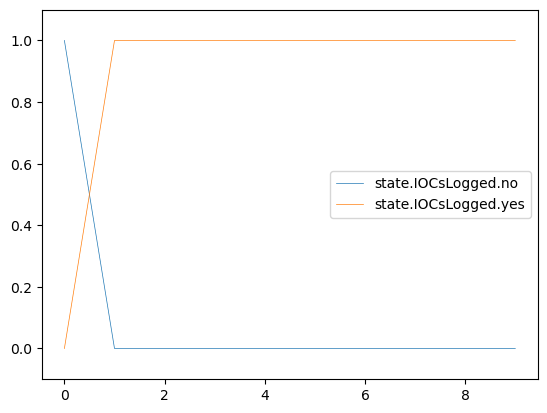

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

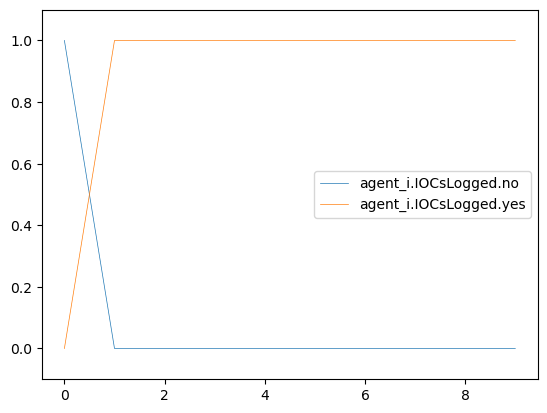

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

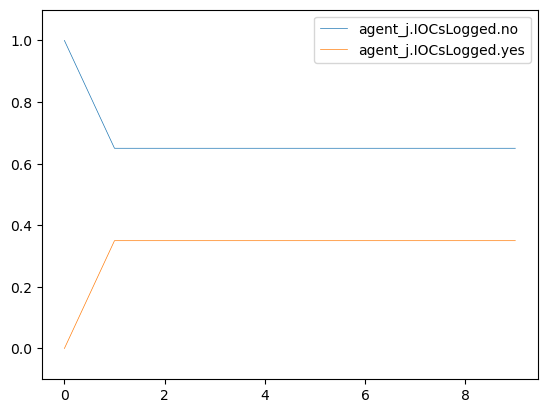

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

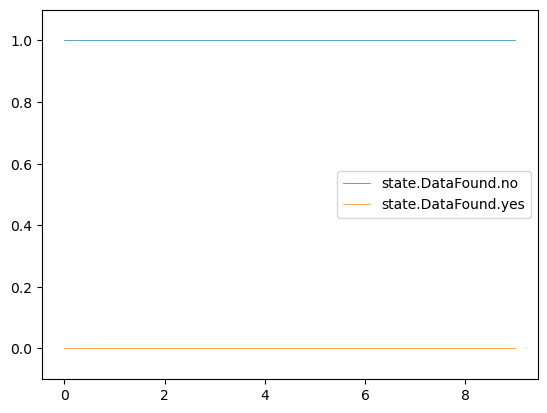

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

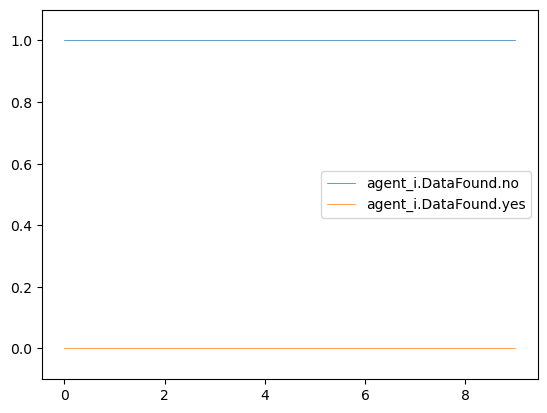

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

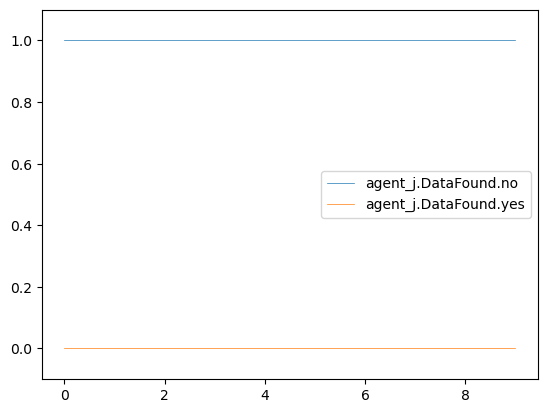

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

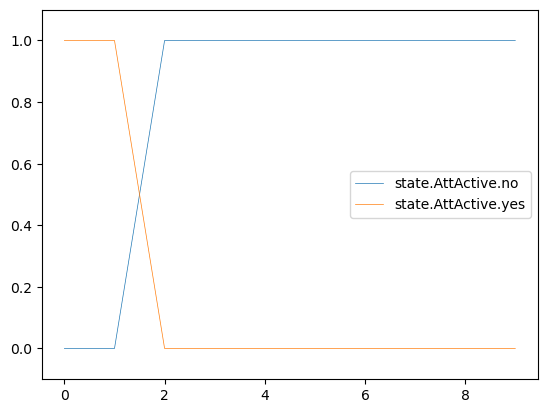

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.968591               0.031409            Nop            Nop   
3              0.999836               0.000164            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                             none  
9                             none

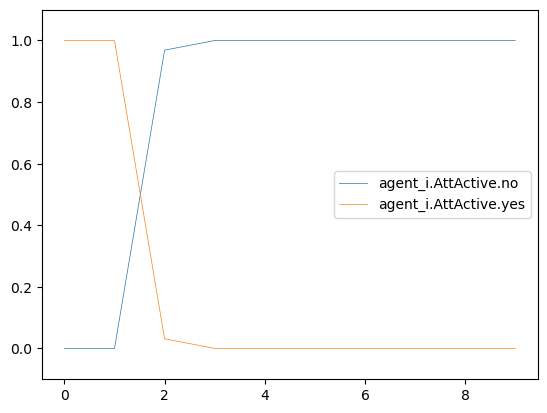

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

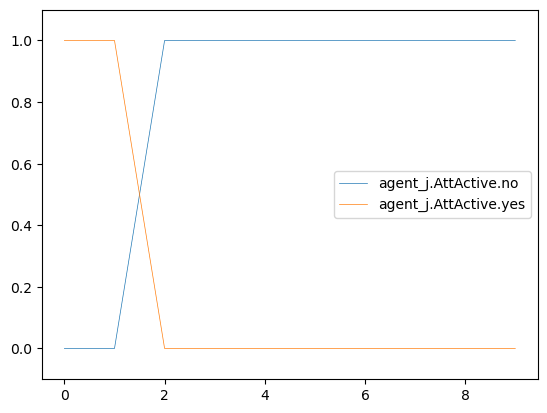

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

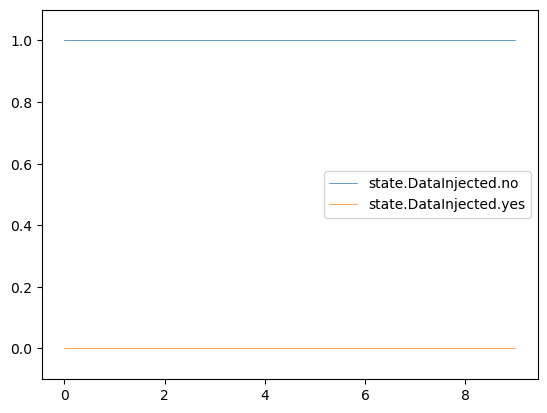

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

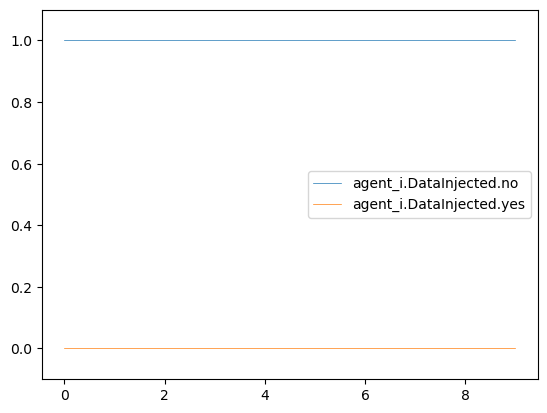

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

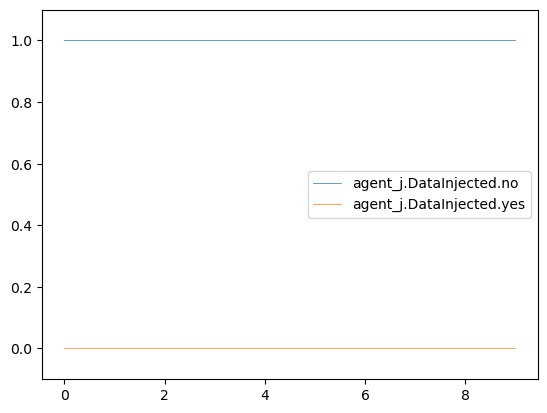

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

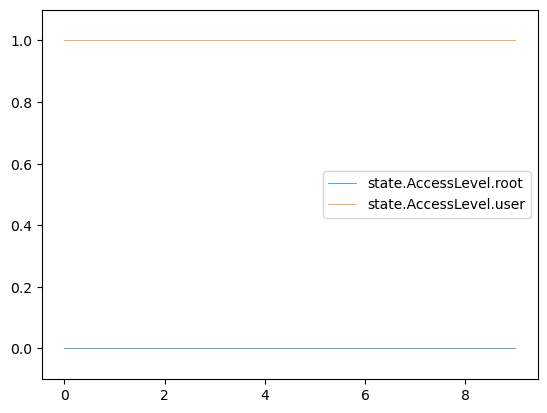

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

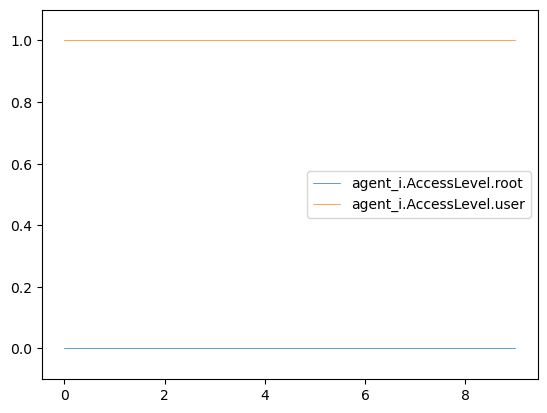

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

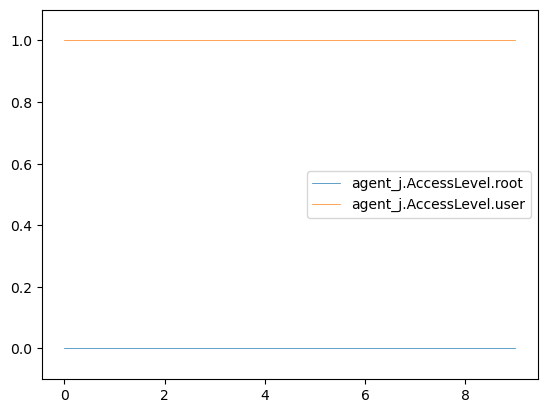

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

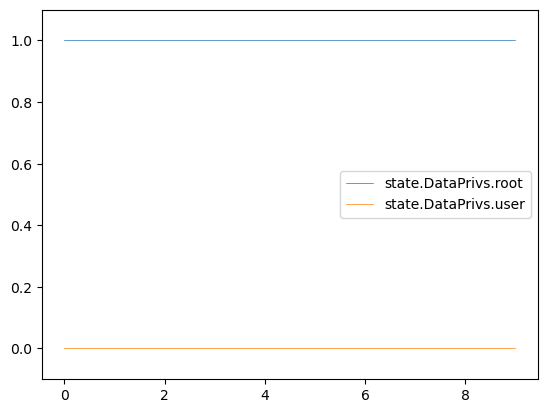

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

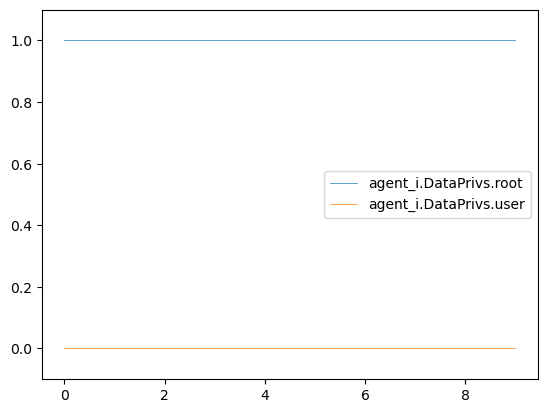

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939           Exit   
2                0.606061                0.393939            Nop   
3                0.606061                0.393939            Nop   
4                0.606061                0.393939            Nop   
5                0.606061                0.393939            Nop   
6                0.606061                0.393939            Nop   
7                0.606061                0.393939            Nop   
8                0.606061                0.393939            Nop   
9                0.606061                0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

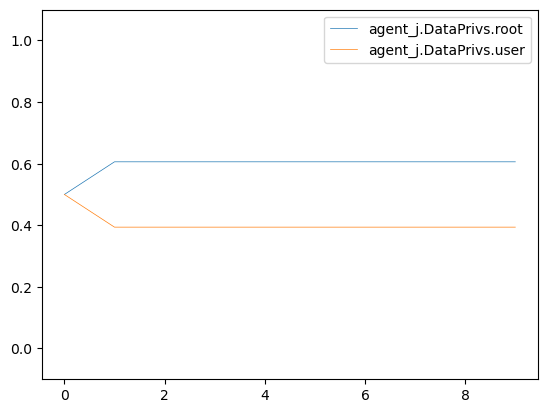

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

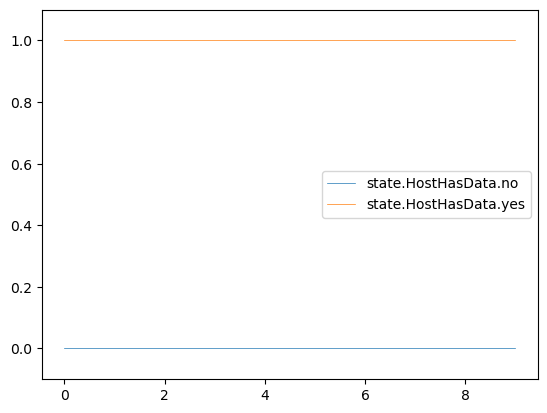

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

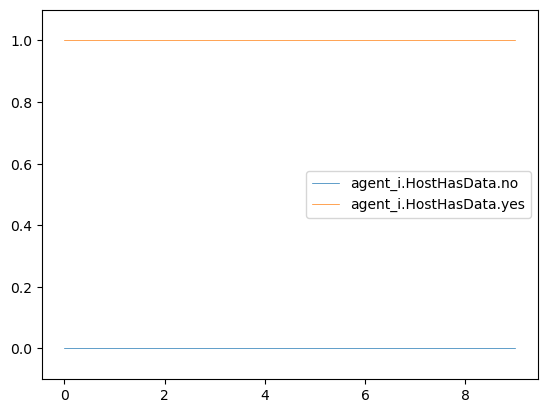

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939           Exit   
2                0.606061                 0.393939            Nop   
3                0.606061                 0.393939            Nop   
4                0.606061                 0.393939            Nop   
5                0.606061                 0.393939            Nop   
6                0.606061                 0.393939            Nop   
7                0.606061                 0.393939            Nop   
8                0.606061                 0.393939            Nop   
9                0.606061                 0.393939            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

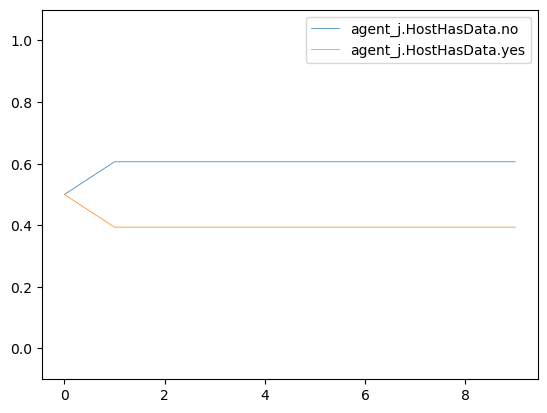

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                   login_activity
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

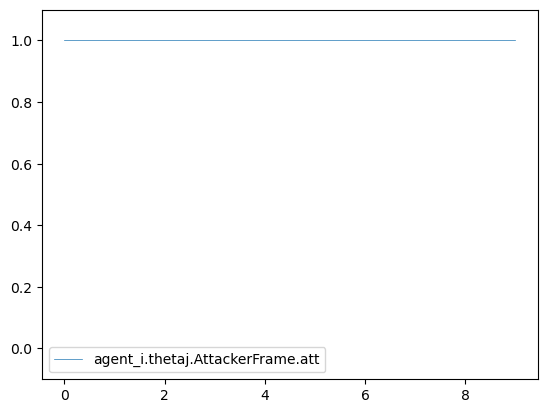

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

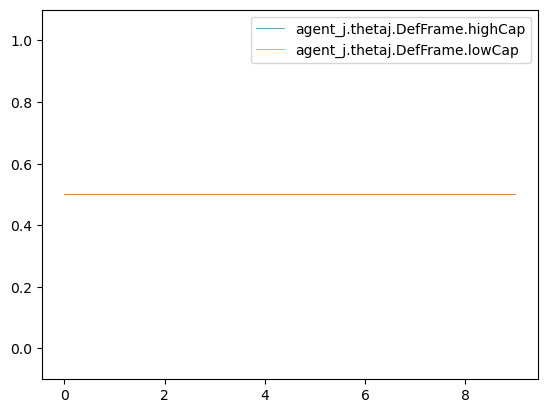

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

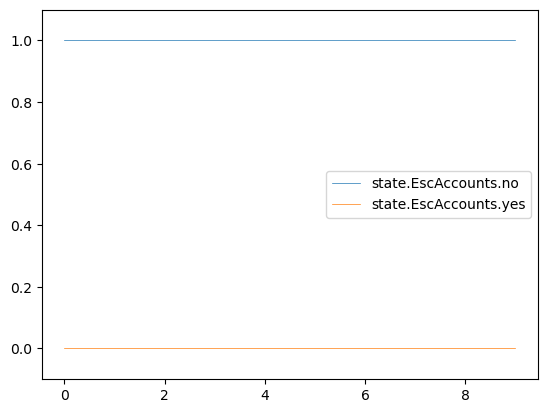

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

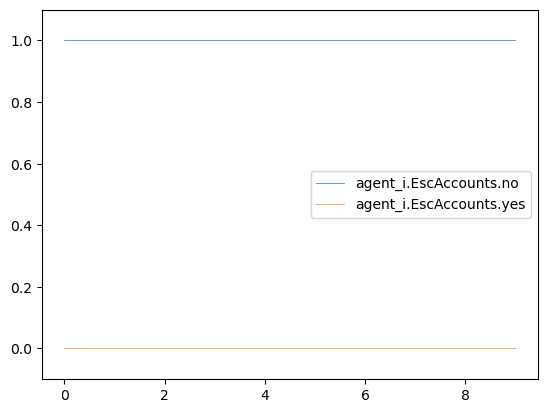

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

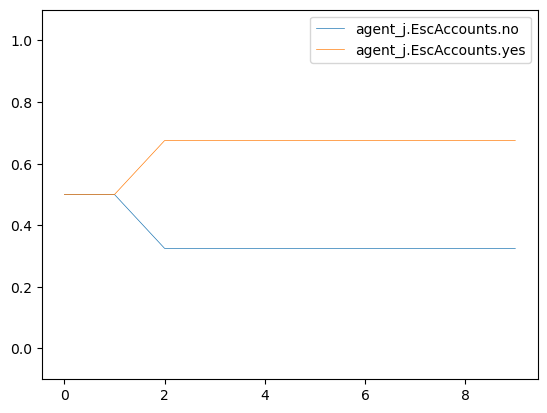

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

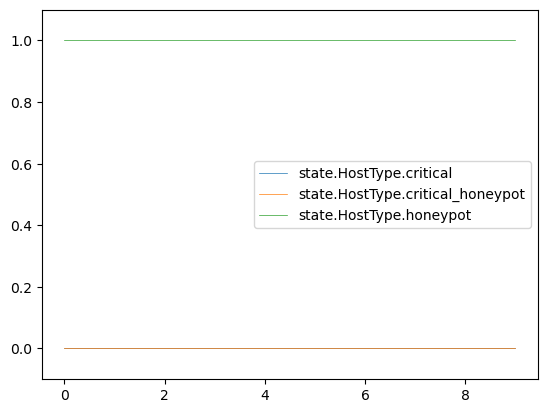

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                             none  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

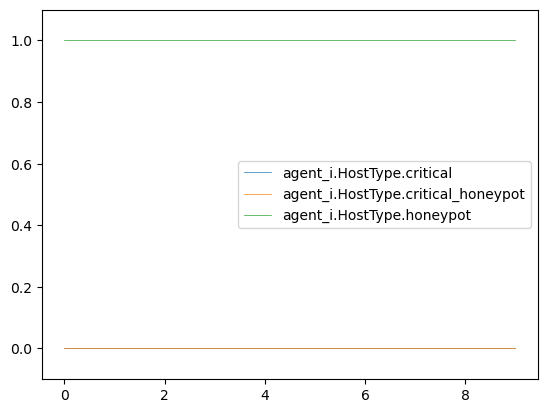

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

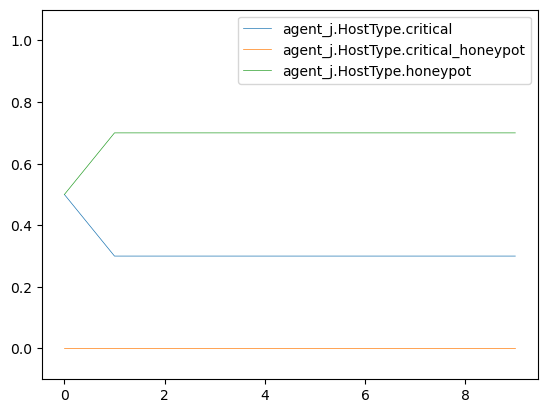

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

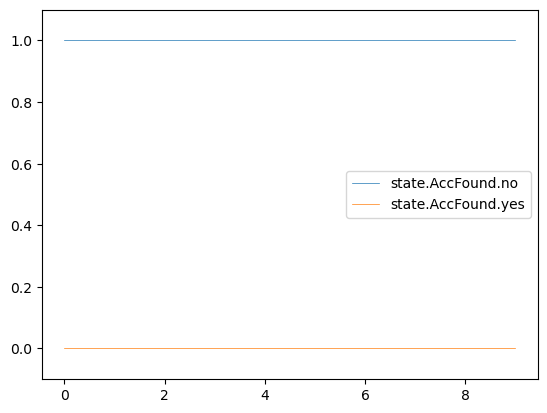

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                             none  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

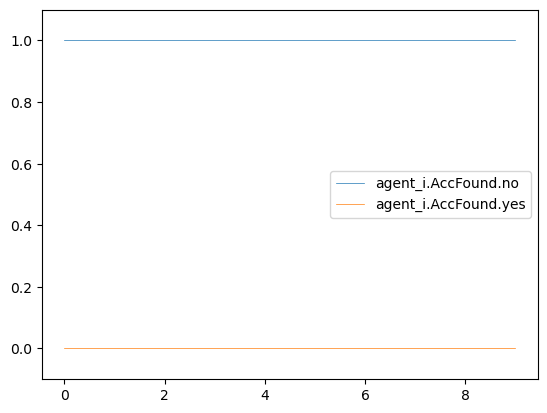

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

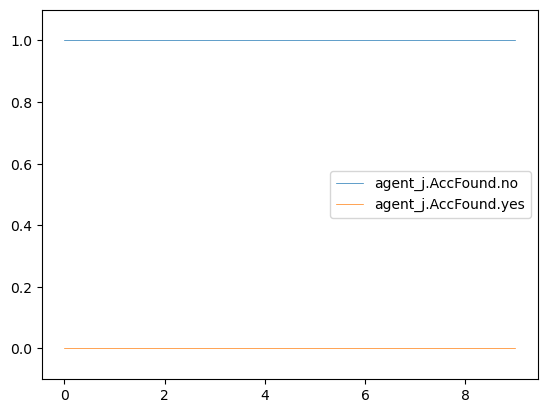

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

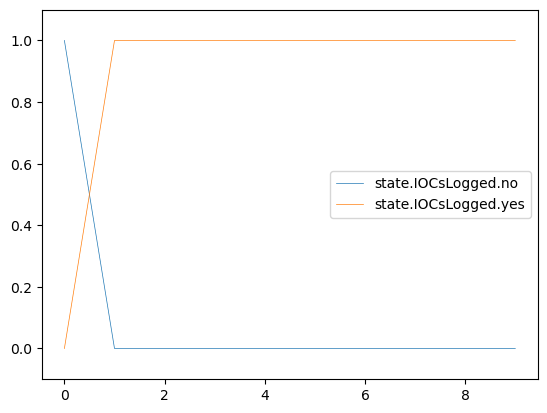

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

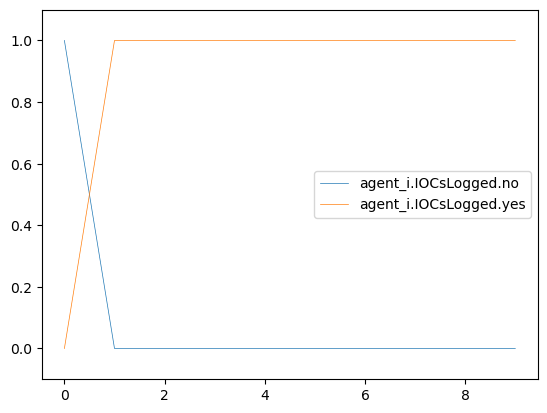

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

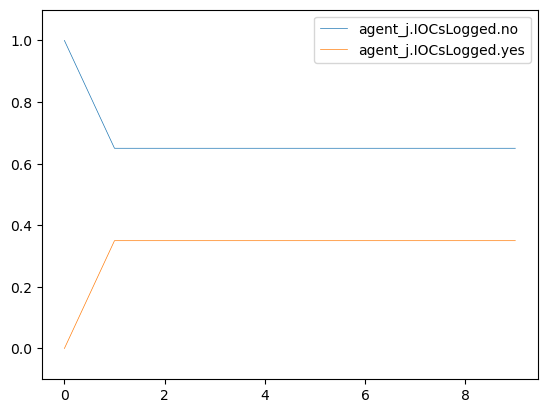

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

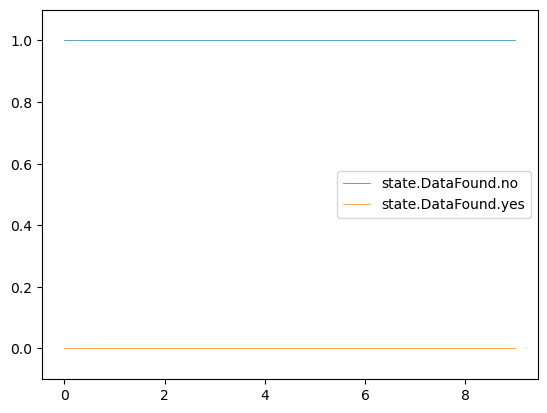

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                             none  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

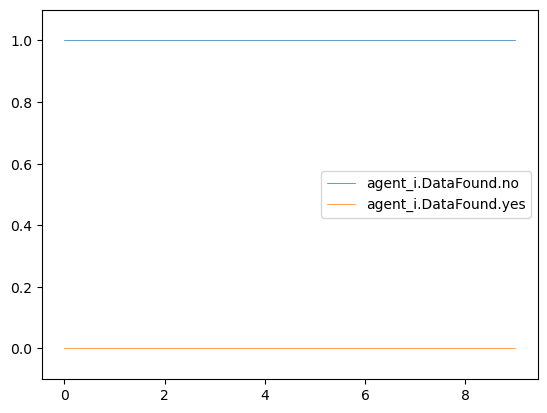

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016           Exit            Nop   
2              0.954984               0.045016            Nop            Nop   
3              0.954984               0.045016            Nop            Nop   
4              0.954984               0.045016            Nop            Nop   
5              0.954984               0.045016            Nop            Nop   
6              0.954984               0.045016            Nop            Nop   
7              0.954984               0.045016            Nop            Nop   
8              0.954984               0.045016            Nop            Nop   
9              0.954984               0.045016            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

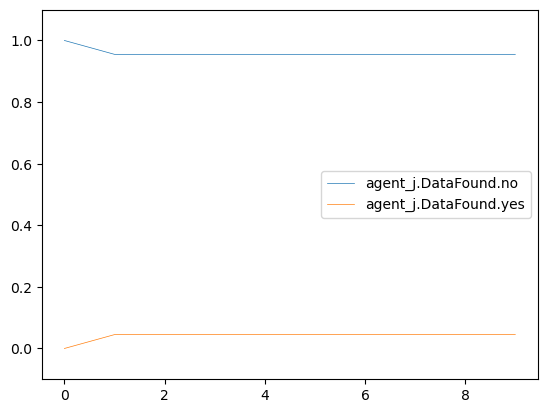

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

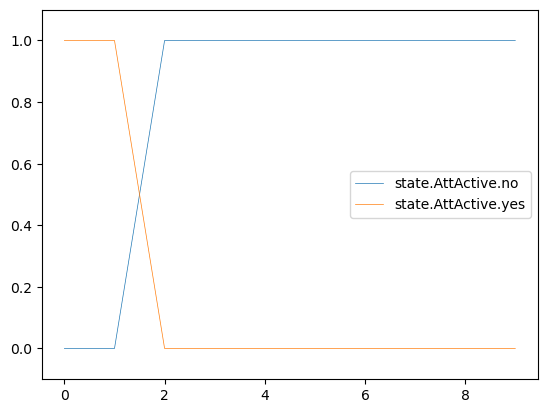

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.626923               0.373077            Nop            Nop   
3              0.994808               0.005192            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                   login_activity  
3                             none  
4                        file_enum  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

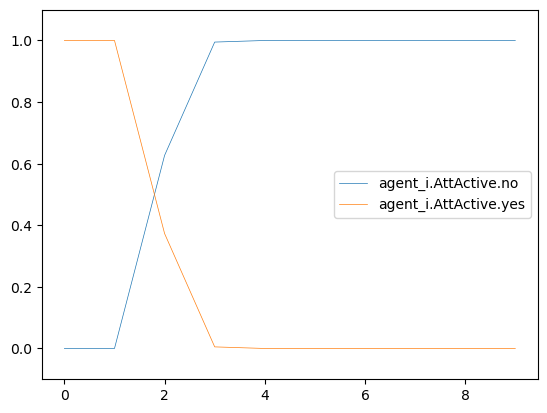

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

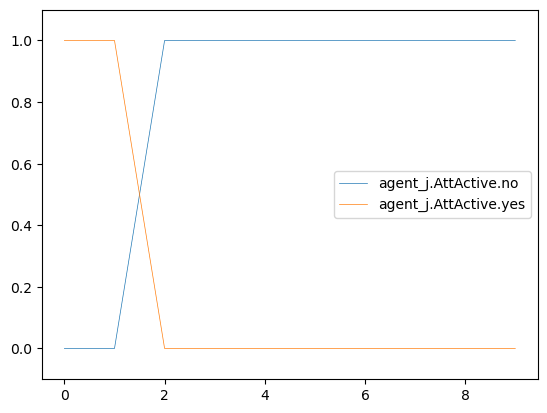

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

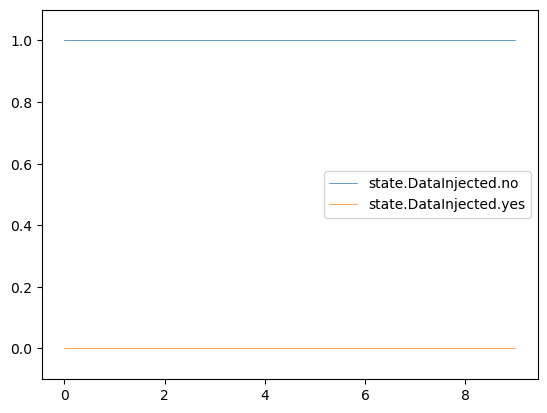

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

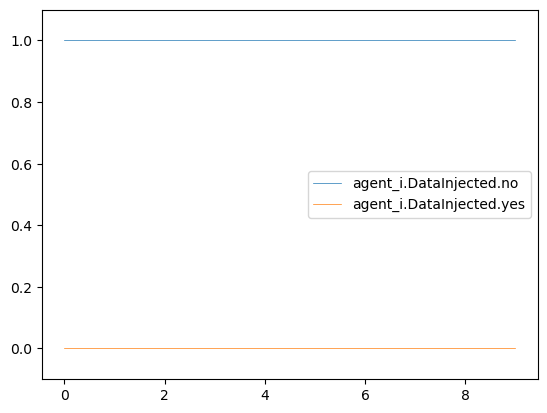

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

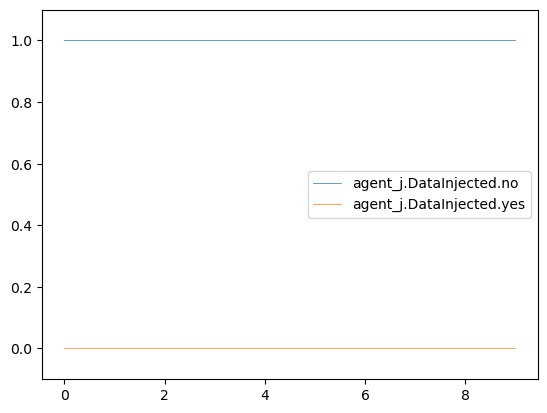

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

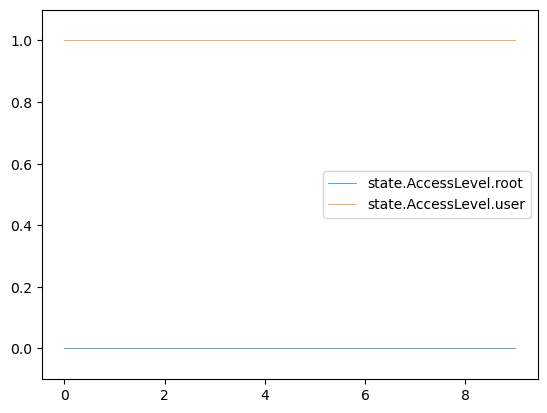

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

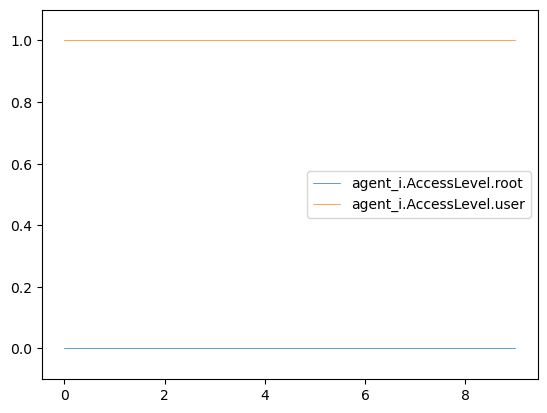

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

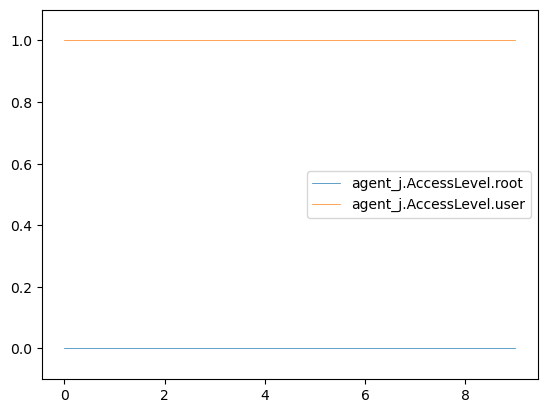

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

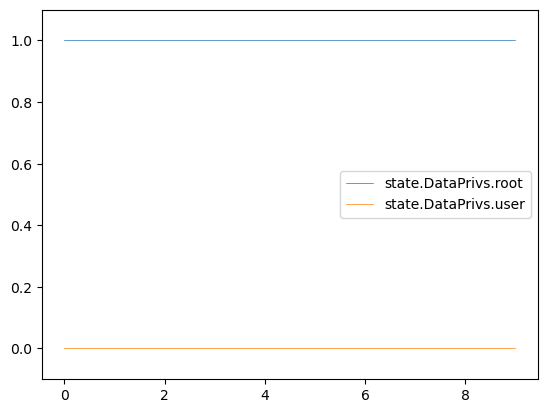

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

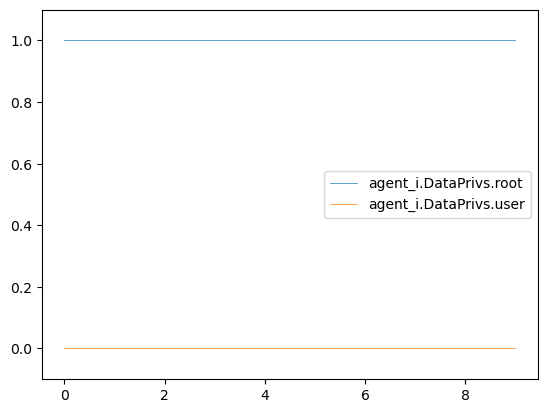

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222           Exit   
2                0.578778                0.421222            Nop   
3                0.578778                0.421222            Nop   
4                0.578778                0.421222            Nop   
5                0.578778                0.421222            Nop   
6                0.578778                0.421222            Nop   
7                0.578778                0.421222            Nop   
8                0.578778                0.421222            Nop   
9                0.578778                0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

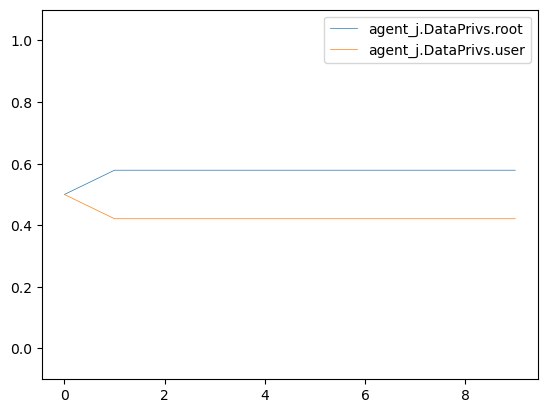

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

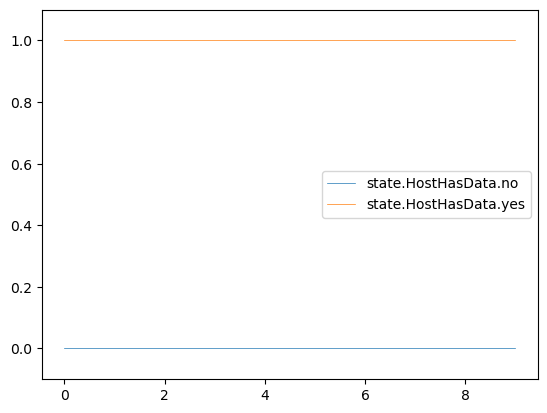

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                   login_activity  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

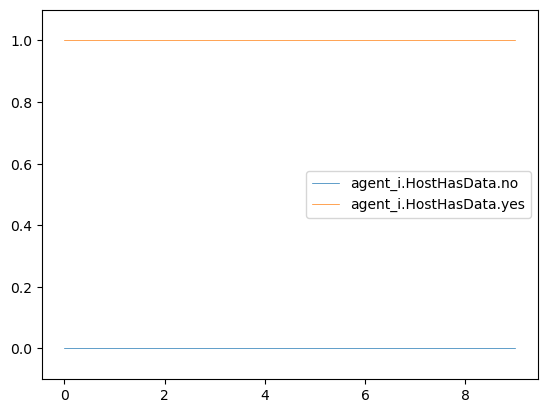

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222           Exit   
2                0.578778                 0.421222            Nop   
3                0.578778                 0.421222            Nop   
4                0.578778                 0.421222            Nop   
5                0.578778                 0.421222            Nop   
6                0.578778                 0.421222            Nop   
7                0.578778                 0.421222            Nop   
8                0.578778                 0.421222            Nop   
9                0.578778                 0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

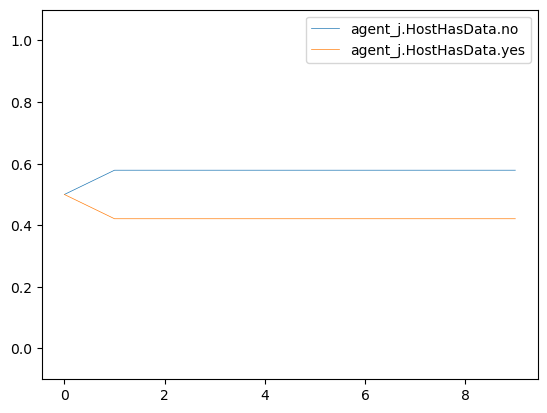

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

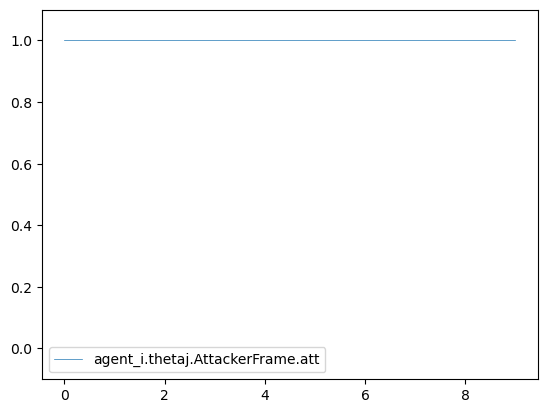

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                            auth                         none   
2                          denied                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

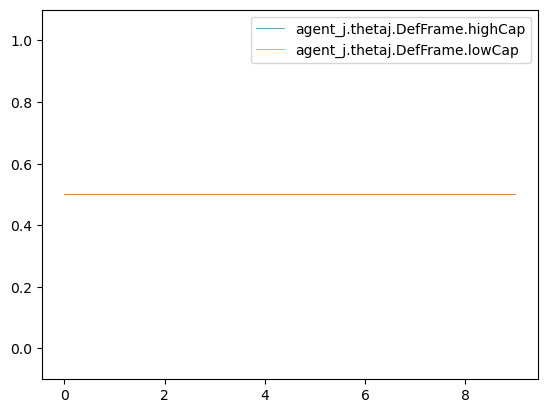

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop      FileRecon
2                   1.0                    0.0            Nop           Exit
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

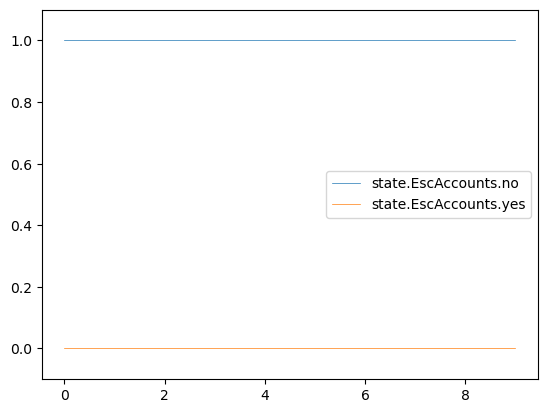

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

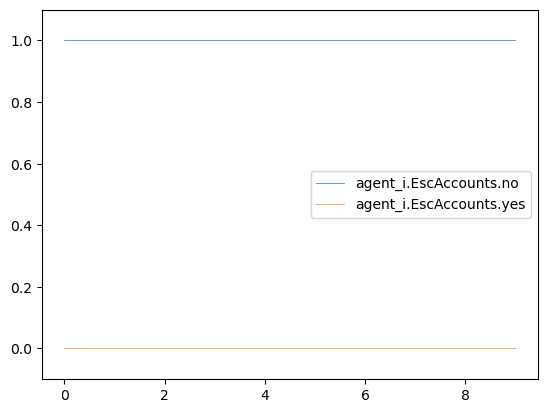

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500      FileRecon   
2                   0.375                    0.625           Exit   
3                   0.375                    0.625            Nop   
4                   0.375                    0.625            Nop   
5                   0.375                    0.625            Nop   
6                   0.375                    0.625            Nop   
7                   0.375                    0.625            Nop   
8                   0.375                    0.625            Nop   
9                   0.375                    0.625            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

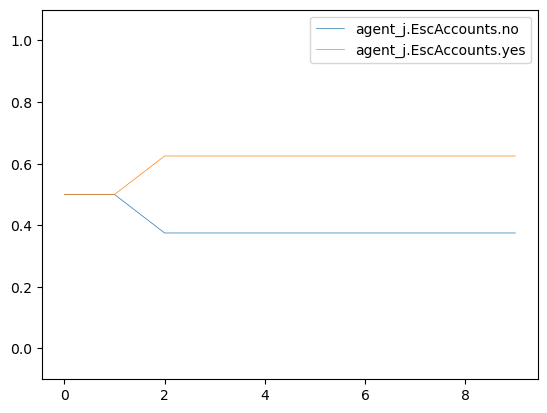

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop      FileRecon  
2                      1.0            Nop           Exit  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

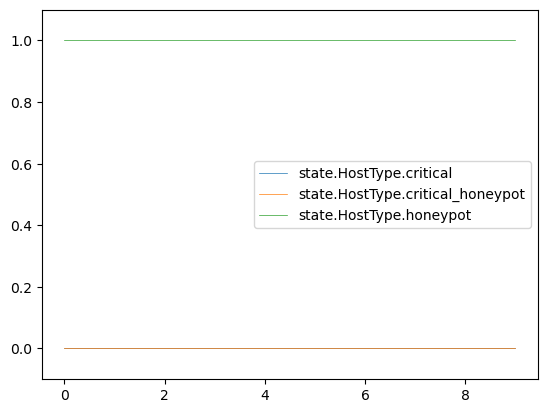

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop      FileRecon   
2                        1.0            Nop           Exit   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

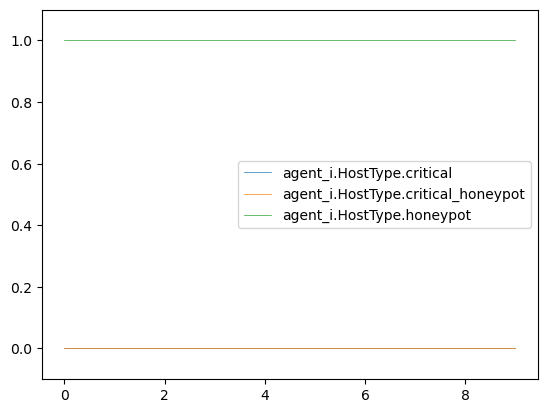

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.7                                 0.0   
2                        0.5                                 0.0   
3                        0.5                                 0.0   
4                        0.5                                 0.0   
5                        0.5                                 0.0   
6                        0.5                                 0.0   
7                        0.5                                 0.0   
8                        0.5                                 0.0   
9                        0.5                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.3      FileRecon            Nop   
2                        0.5           Exit            Nop   
3                        0.5            Nop            Nop   
4                        0.5            Nop            Nop   
5                        0.5            Nop            Nop   
6                        0.5            Nop            Nop   
7                        0.5            Nop            Nop   
8                        0.5            Nop            Nop   
9                        0.5            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                            auth                         none   
2                          denied                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

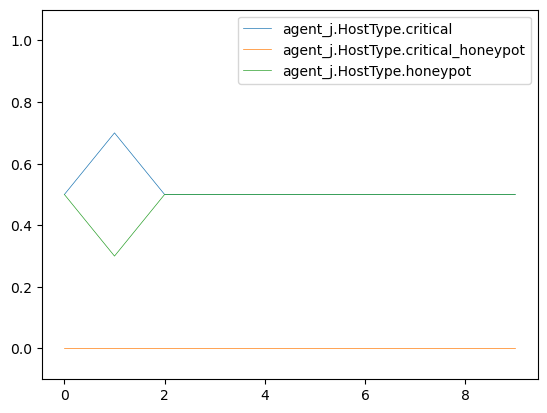

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop      FileRecon
2                1.0                 0.0            Nop           Exit
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

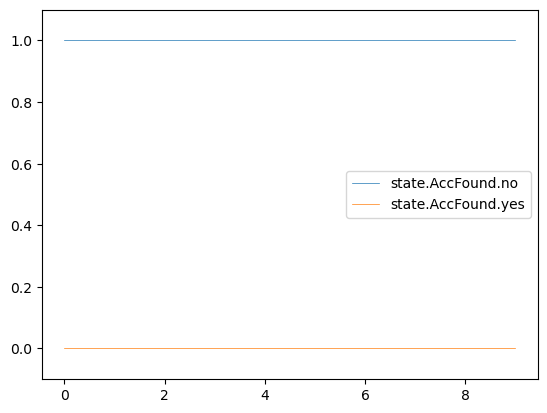

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop      FileRecon   
2                  1.0                   0.0            Nop           Exit   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

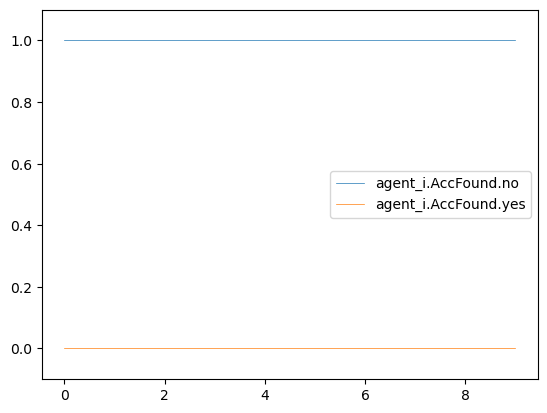

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0      FileRecon            Nop   
2                  1.0                   0.0           Exit            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                            auth                         none   
2                          denied                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

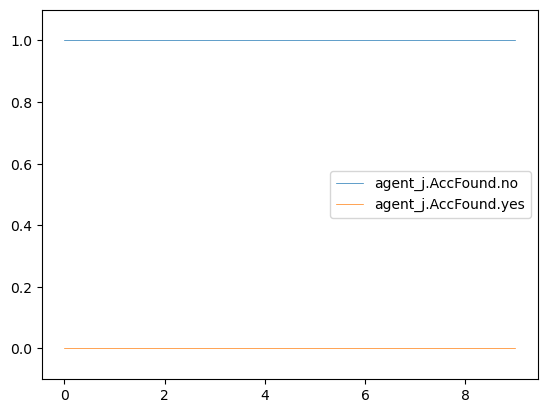

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop      FileRecon
2                  0.0                   1.0            Nop           Exit
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

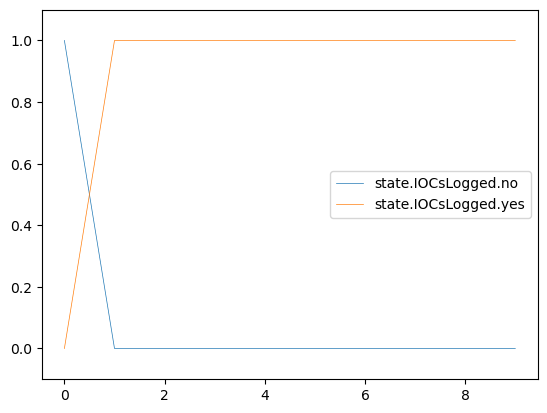

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

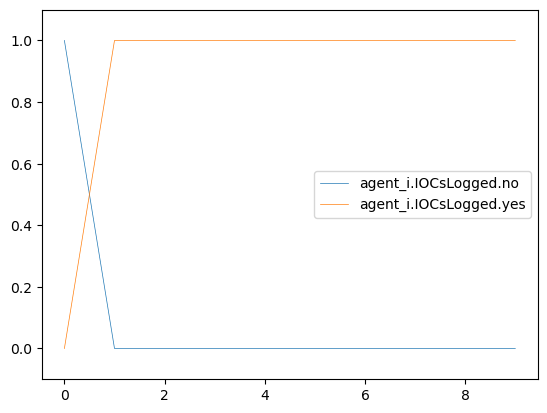

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.85                    0.15      FileRecon   
2                   0.75                    0.25           Exit   
3                   0.75                    0.25            Nop   
4                   0.75                    0.25            Nop   
5                   0.75                    0.25            Nop   
6                   0.75                    0.25            Nop   
7                   0.75                    0.25            Nop   
8                   0.75                    0.25            Nop   
9                   0.75                    0.25            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

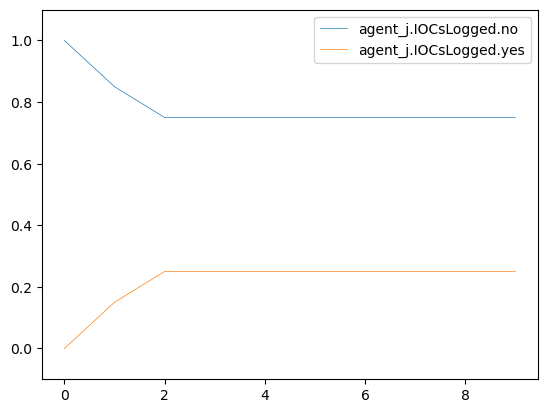

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop      FileRecon
2                 1.0                  0.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

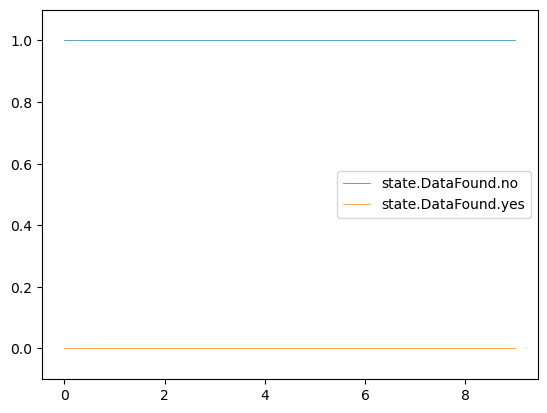

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop      FileRecon   
2                   1.0                    0.0            Nop           Exit   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

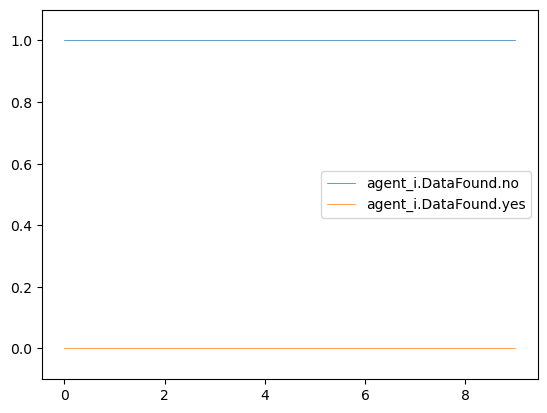

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016      FileRecon            Nop   
2              0.974384               0.025616           Exit            Nop   
3              0.974384               0.025616            Nop            Nop   
4              0.974384               0.025616            Nop            Nop   
5              0.974384               0.025616            Nop            Nop   
6              0.974384               0.025616            Nop            Nop   
7              0.974384               0.025616            Nop            Nop   
8              0.974384               0.025616            Nop            Nop   
9              0.974384               0.025616            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                            auth                         none   
2                          denied                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

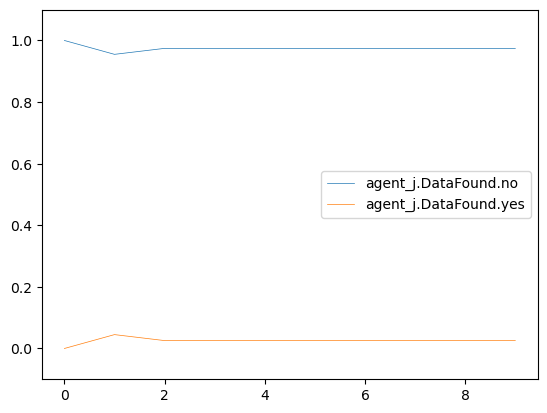

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop      FileRecon
2                 0.0                  1.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop      FileRecon   
2              0.450276               0.549724            Nop           Exit   
3              0.973895               0.026105            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0      FileRecon            Nop   
2                   0.0                    1.0           Exit            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                            auth                         none   
2                          denied                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

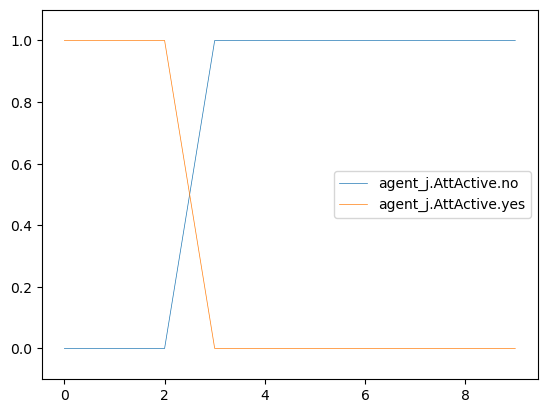

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop      FileRecon
2                    1.0                     0.0            Nop           Exit
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

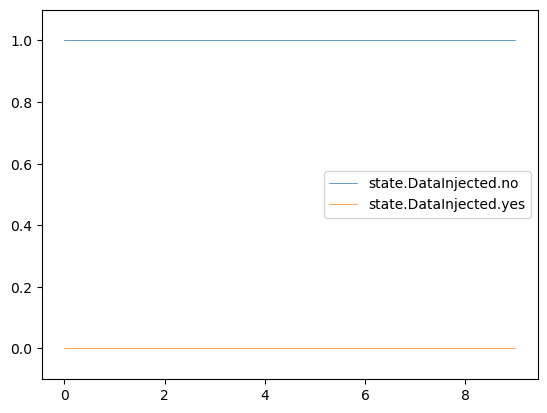

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

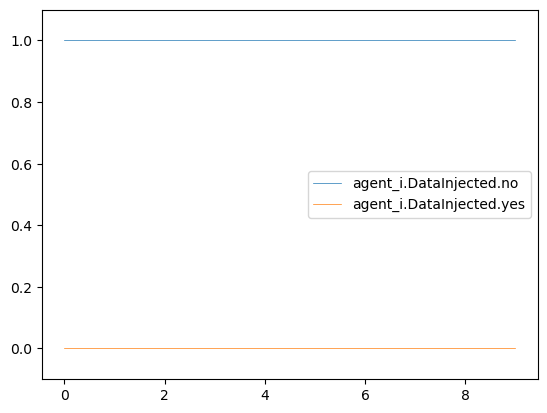

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0      FileRecon   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

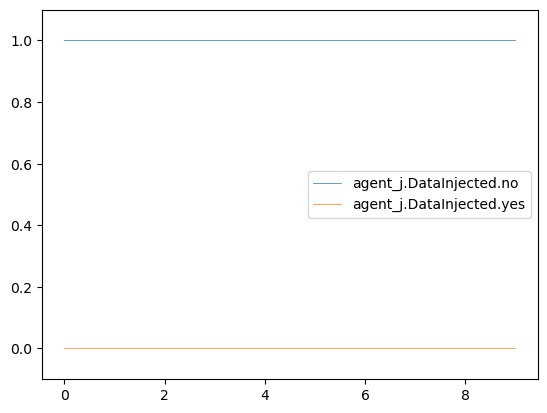

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1      FileRecon  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

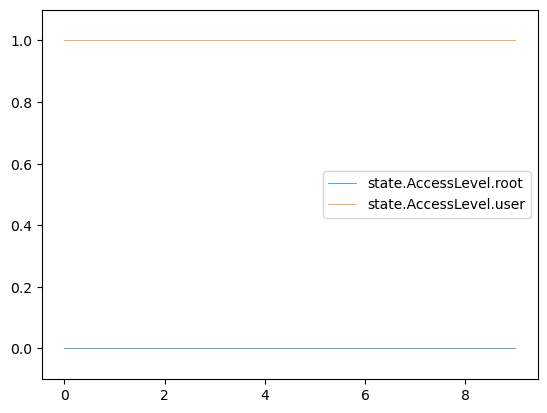

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

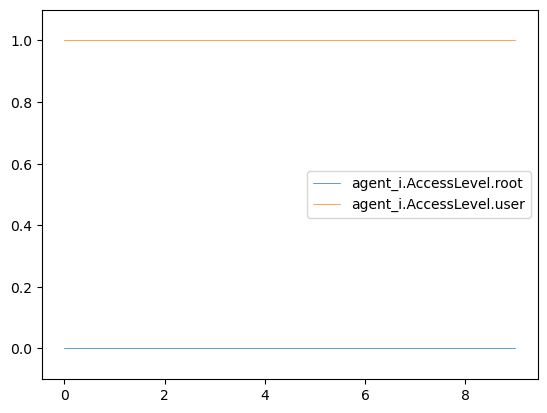

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0      FileRecon   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

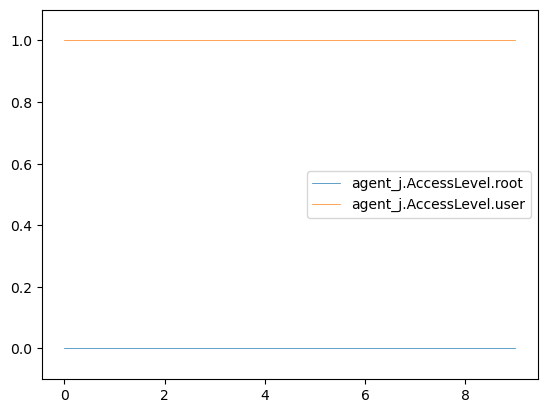

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop      FileRecon
2                   1.0                   0.0            Nop           Exit
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

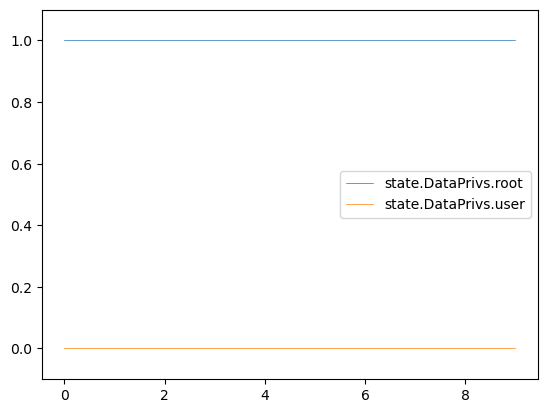

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

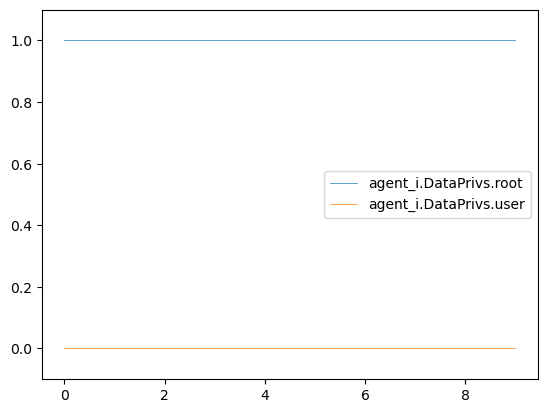

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222      FileRecon   
2                0.630669                0.369331           Exit   
3                0.630669                0.369331            Nop   
4                0.630669                0.369331            Nop   
5                0.630669                0.369331            Nop   
6                0.630669                0.369331            Nop   
7                0.630669                0.369331            Nop   
8                0.630669                0.369331            Nop   
9                0.630669                0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop           Exit
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

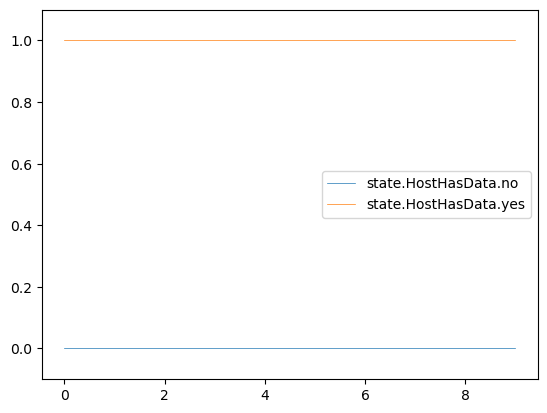

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

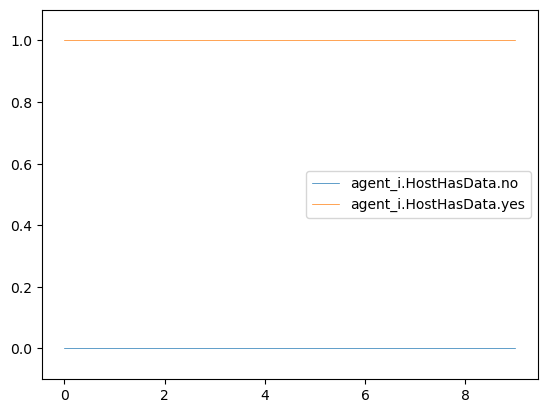

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222      FileRecon   
2                0.630669                 0.369331           Exit   
3                0.630669                 0.369331            Nop   
4                0.630669                 0.369331            Nop   
5                0.630669                 0.369331            Nop   
6                0.630669                 0.369331            Nop   
7                0.630669                 0.369331            Nop   
8                0.630669                 0.369331            Nop   
9                0.630669                 0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1            Nop                            auth                         none   
2            Nop                          denied                         none   
3            Nop                            auth                   user_files   
4            Nop                            auth                         none   
5            Nop                            auth                   user_files   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

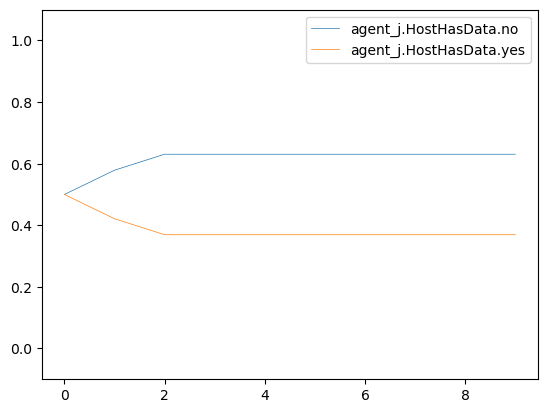

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                        file_enum
9                               1.0                        file_enum

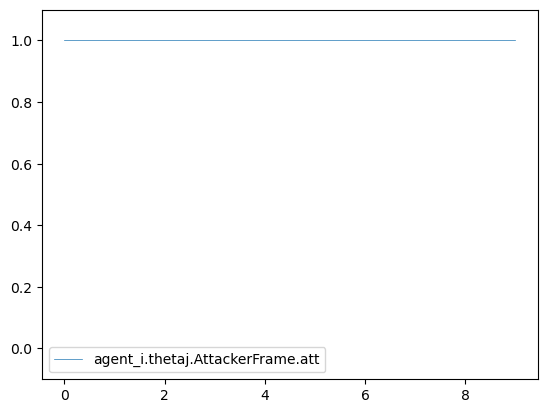

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

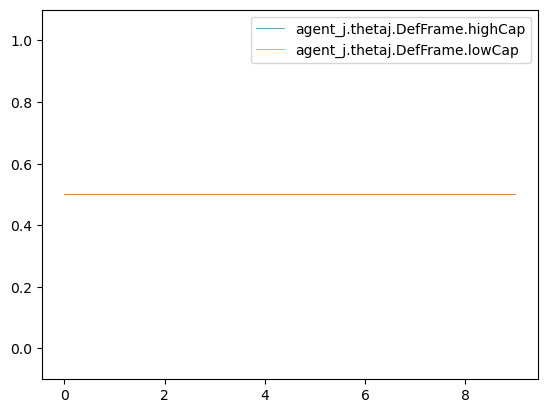

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

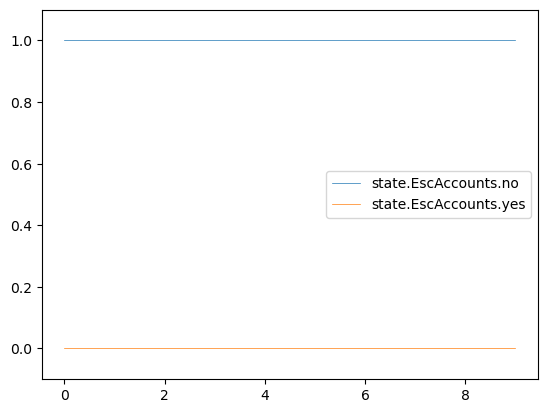

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

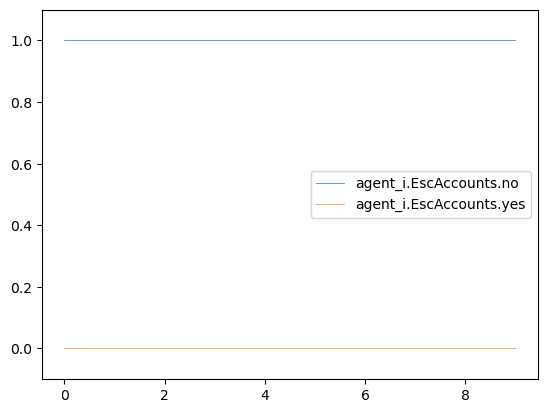

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

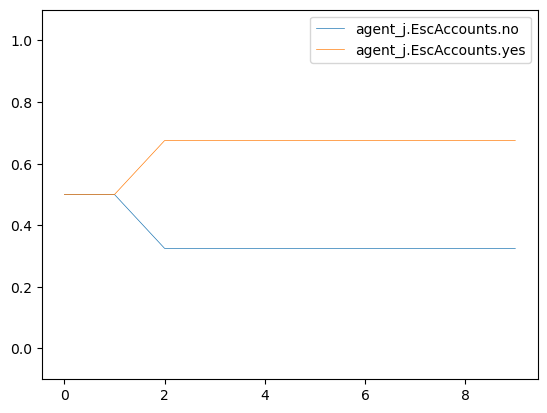

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

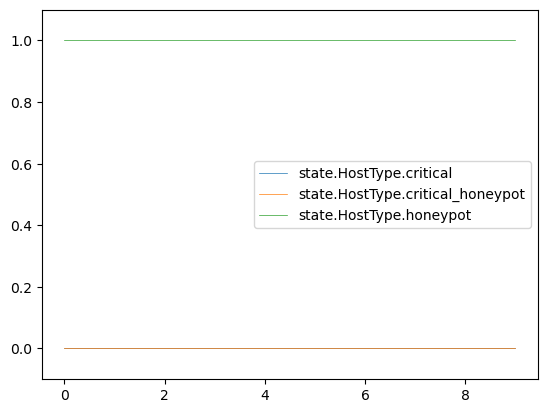

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                        file_enum

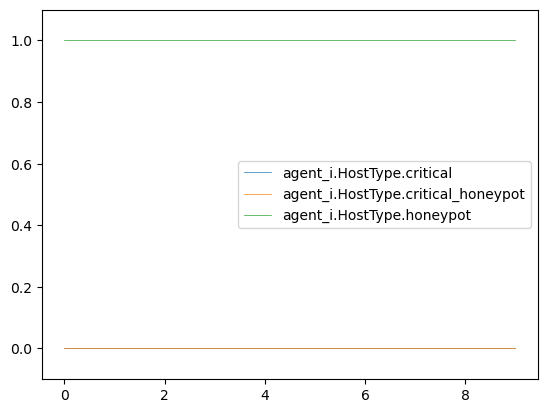

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

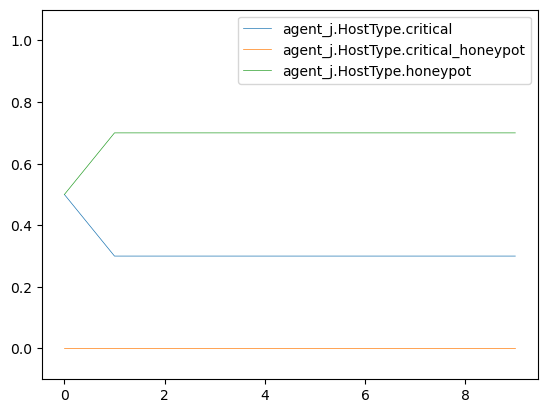

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

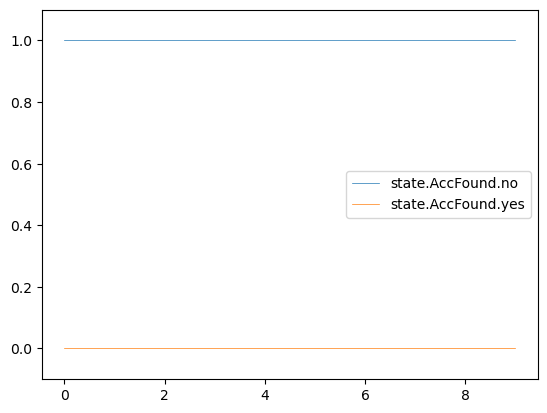

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                        file_enum

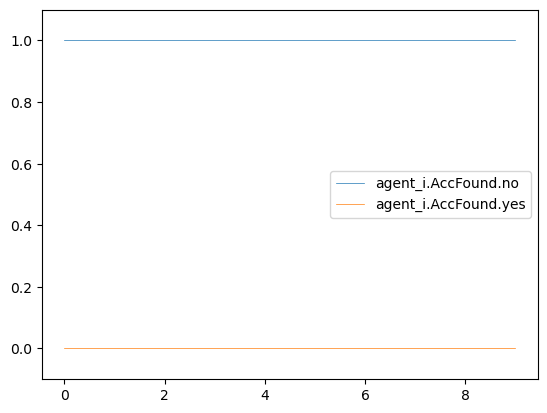

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

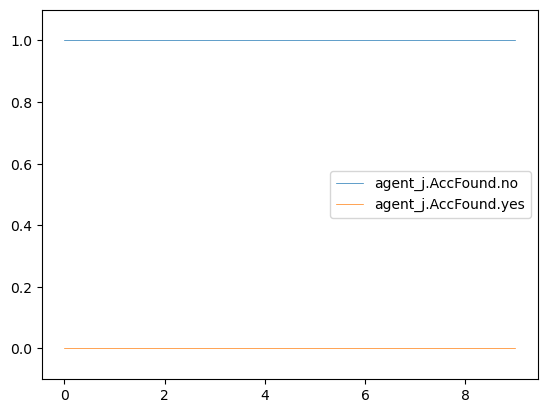

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

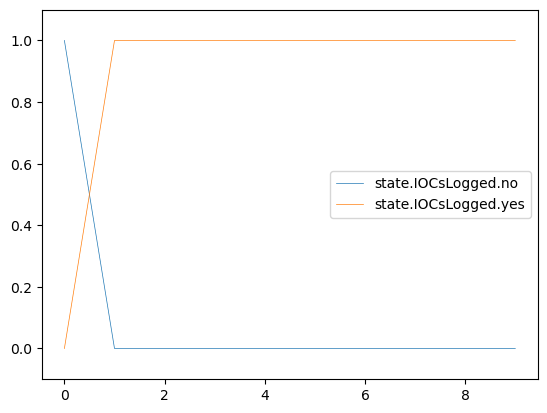

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

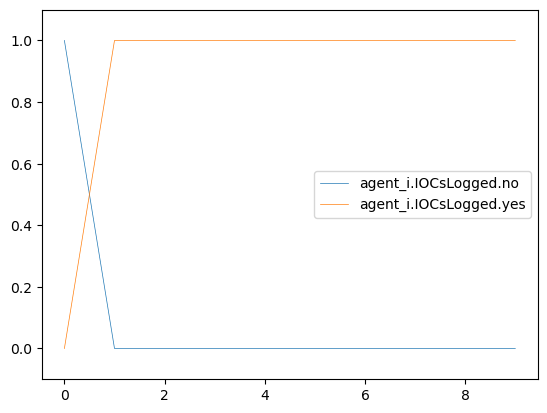

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

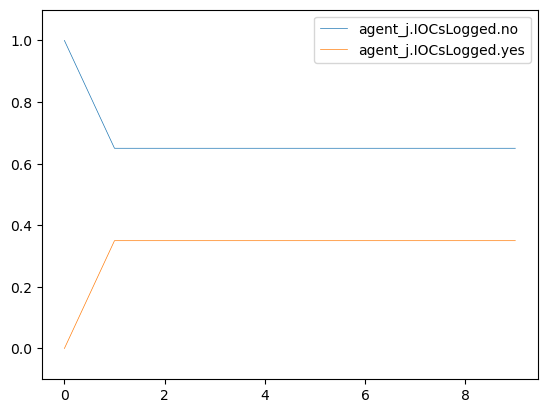

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

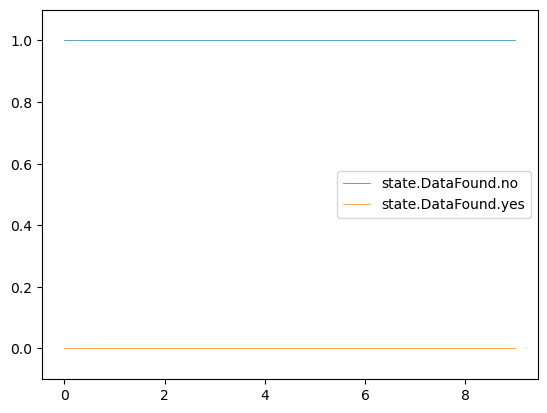

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                        file_enum

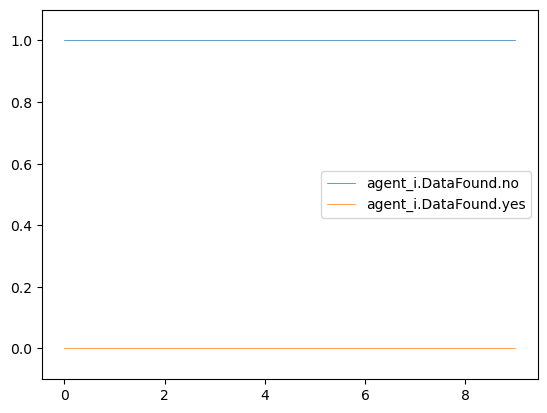

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016           Exit            Nop   
2              0.954984               0.045016            Nop            Nop   
3              0.954984               0.045016            Nop            Nop   
4              0.954984               0.045016            Nop            Nop   
5              0.954984               0.045016            Nop            Nop   
6              0.954984               0.045016            Nop            Nop   
7              0.954984               0.045016            Nop            Nop   
8              0.954984               0.045016            Nop            Nop   
9              0.954984               0.045016            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

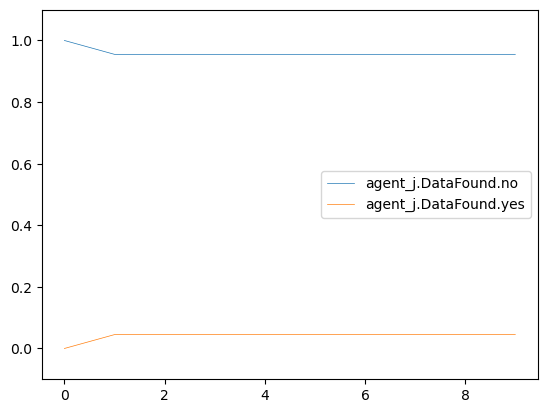

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

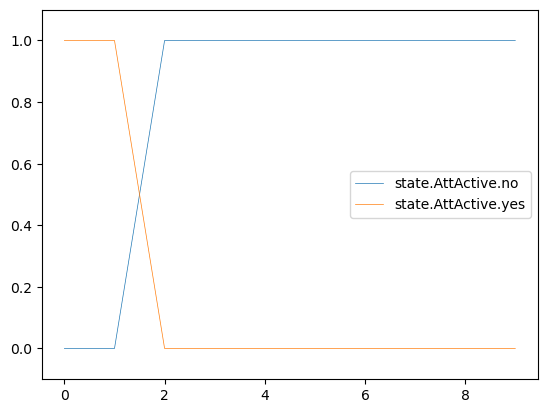

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.968591               0.031409            Nop            Nop   
3              0.999836               0.000164            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                        file_enum

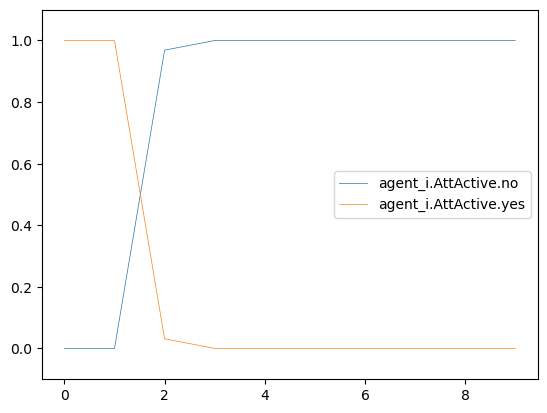

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

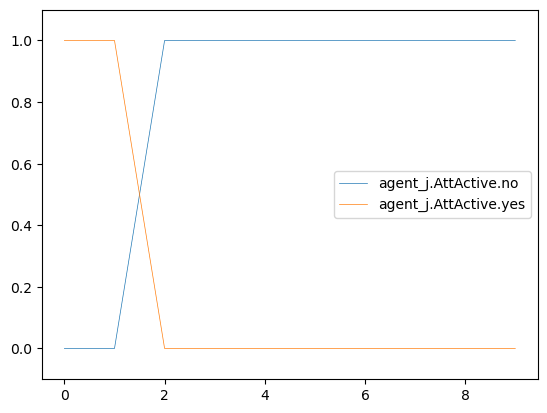

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

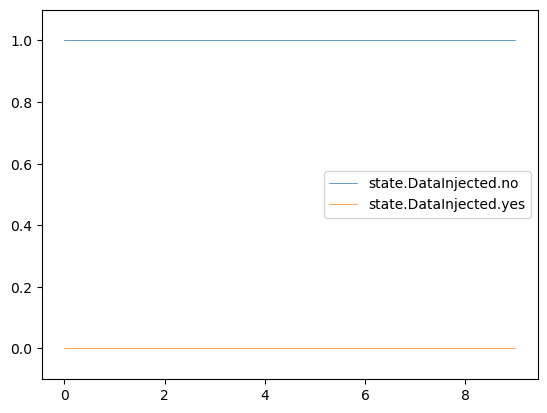

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

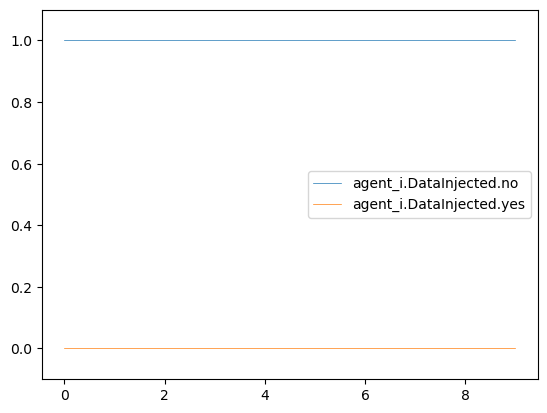

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

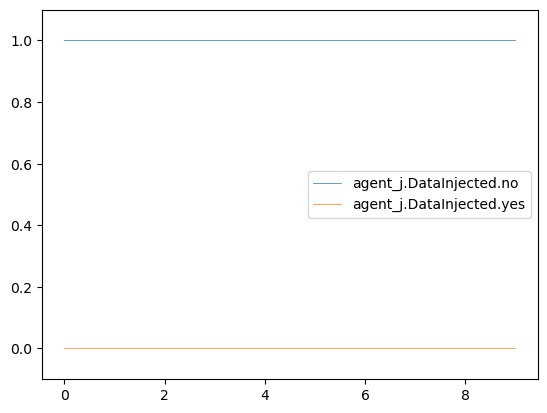

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

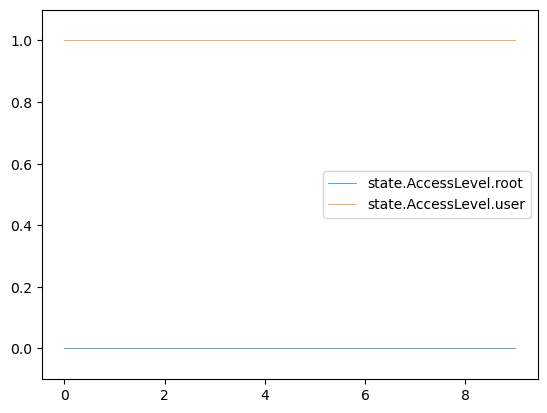

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

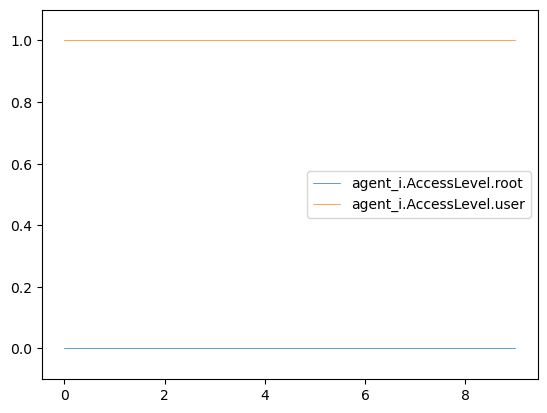

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

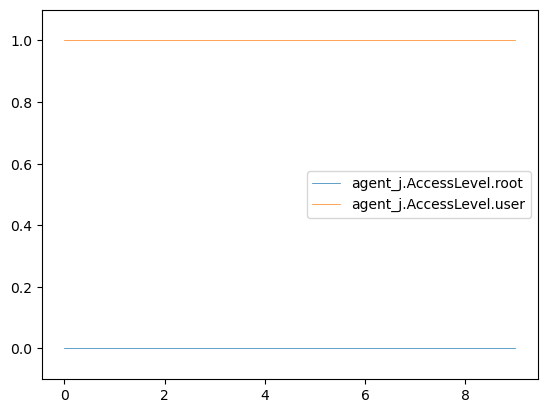

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

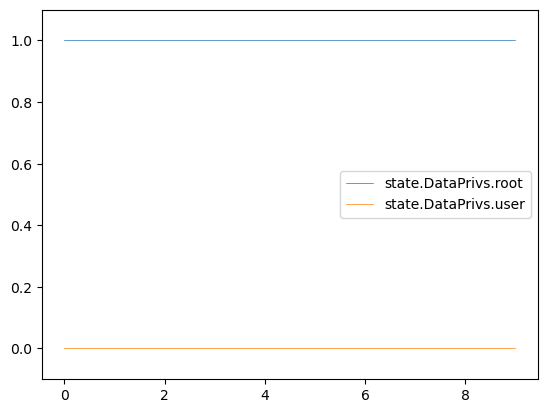

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

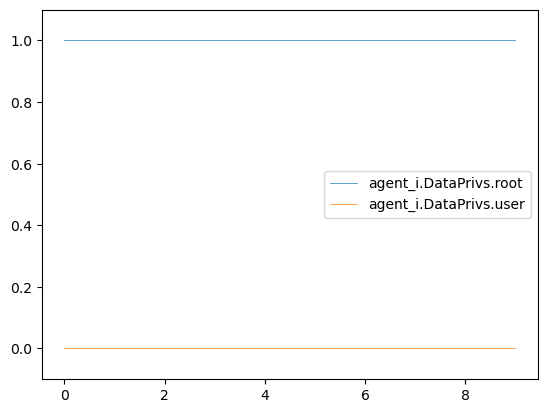

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222           Exit   
2                0.578778                0.421222            Nop   
3                0.578778                0.421222            Nop   
4                0.578778                0.421222            Nop   
5                0.578778                0.421222            Nop   
6                0.578778                0.421222            Nop   
7                0.578778                0.421222            Nop   
8                0.578778                0.421222            Nop   
9                0.578778                0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

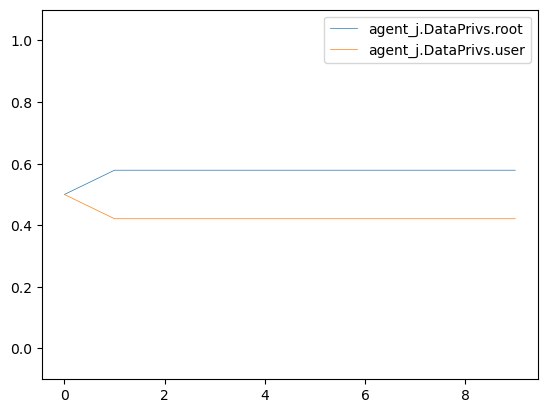

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

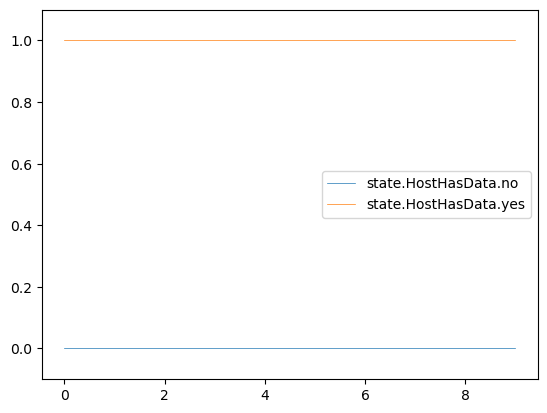

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                        file_enum

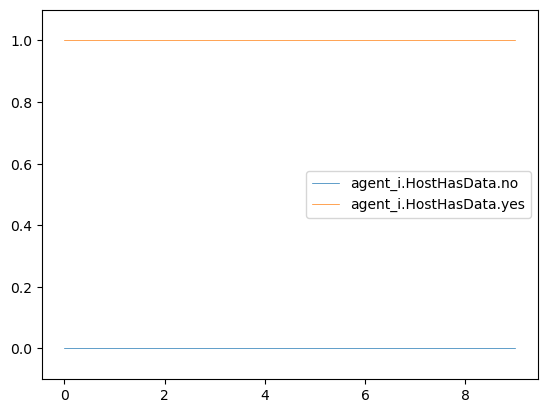

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222           Exit   
2                0.578778                 0.421222            Nop   
3                0.578778                 0.421222            Nop   
4                0.578778                 0.421222            Nop   
5                0.578778                 0.421222            Nop   
6                0.578778                 0.421222            Nop   
7                0.578778                 0.421222            Nop   
8                0.578778                 0.421222            Nop   
9                0.578778                 0.421222            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

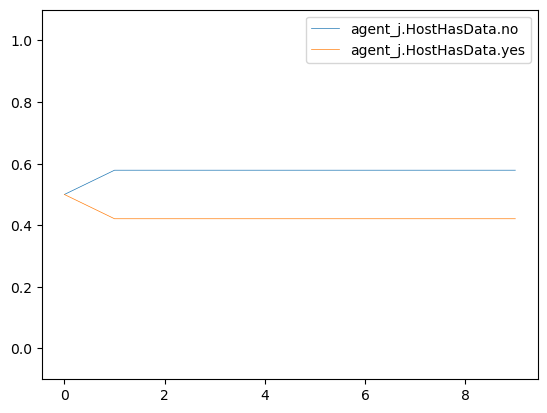

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

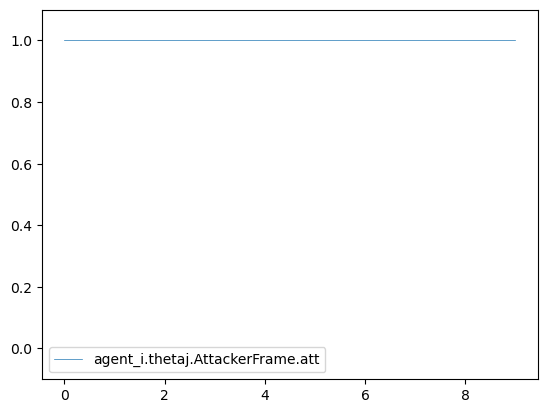

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                            auth                   user_files   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

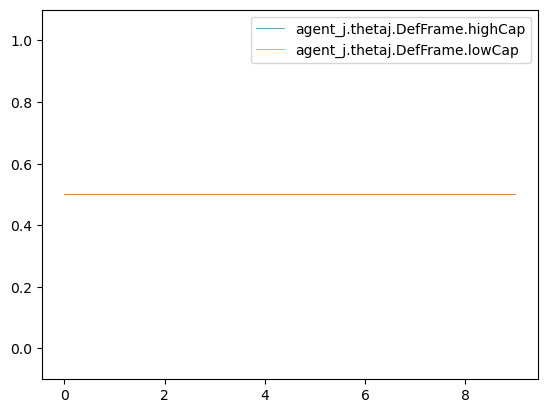

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0        LogIOCs       FileRecon
1                   1.0                    0.0            Nop  ManipulateData
2                   1.0                    0.0            Nop            Exit
3                   1.0                    0.0            Nop             Nop
4                   1.0                    0.0            Nop             Nop
5                   1.0                    0.0            Nop             Nop
6                   1.0                    0.0            Nop             Nop
7                   1.0                    0.0            Nop             Nop
8                   1.0                    0.0            Nop             Nop
9                   1.0                    0.0            Nop             Nop

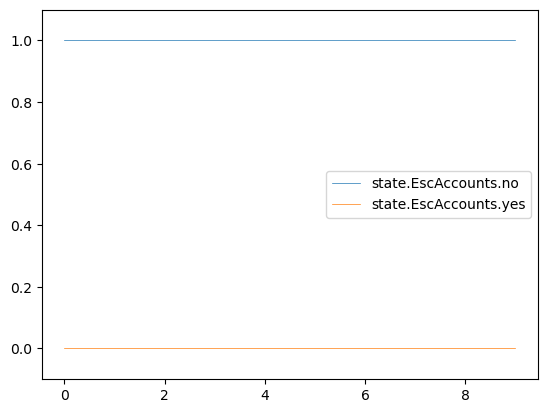

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

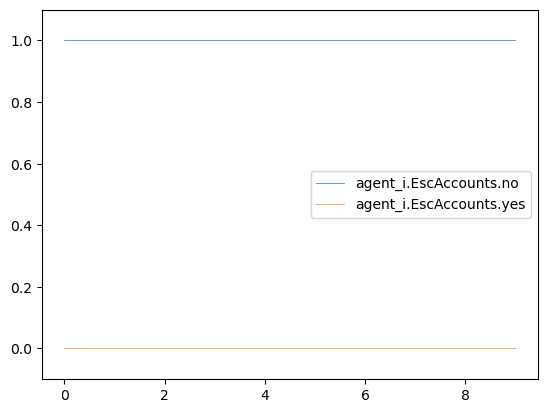

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                   0.500                    0.500       FileRecon   
1                   0.500                    0.500  ManipulateData   
2                   0.325                    0.675            Exit   
3                   0.325                    0.675             Nop   
4                   0.325                    0.675             Nop   
5                   0.325                    0.675             Nop   
6                   0.325                    0.675             Nop   
7                   0.325                    0.675             Nop   
8                   0.325                    0.675             Nop   
9                   0.325                    0.675             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

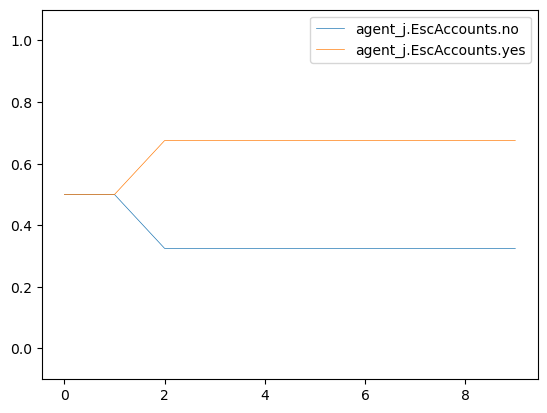

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0        LogIOCs       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop            Exit  
3                      1.0            Nop             Nop  
4                      1.0            Nop             Nop  
5                      1.0            Nop             Nop  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

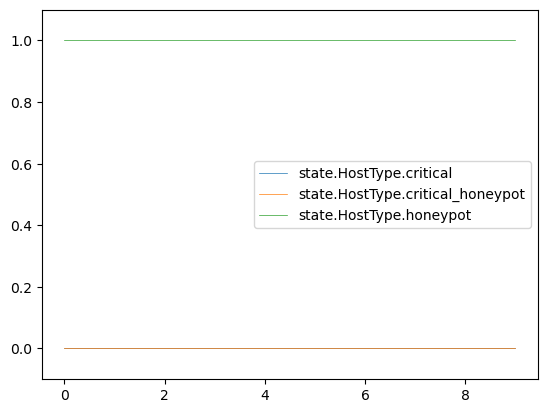

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0        LogIOCs       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop            Exit   
3                        1.0            Nop             Nop   
4                        1.0            Nop             Nop   
5                        1.0            Nop             Nop   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                             none  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

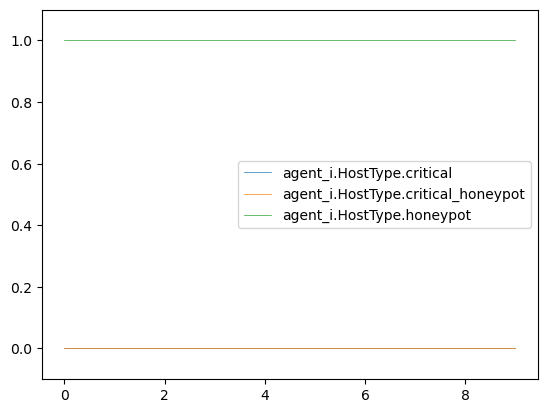

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.5       FileRecon        LogIOCs   
1                        0.7  ManipulateData            Nop   
2                        0.7            Exit            Nop   
3                        0.7             Nop            Nop   
4                        0.7             Nop            Nop   
5                        0.7             Nop            Nop   
6                        0.7             Nop            Nop   
7                        0.7             Nop            Nop   
8                        0.7             Nop            Nop   
9                        0.7             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                            auth                   user_files   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

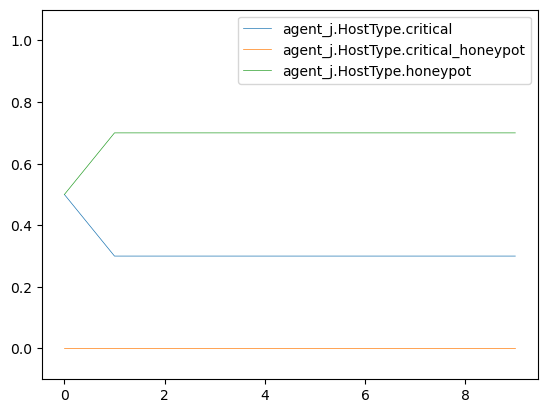

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0        LogIOCs       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop            Exit
3                1.0                 0.0            Nop             Nop
4                1.0                 0.0            Nop             Nop
5                1.0                 0.0            Nop             Nop
6                1.0                 0.0            Nop             Nop
7                1.0                 0.0            Nop             Nop
8                1.0                 0.0            Nop             Nop
9                1.0                 0.0            Nop             Nop

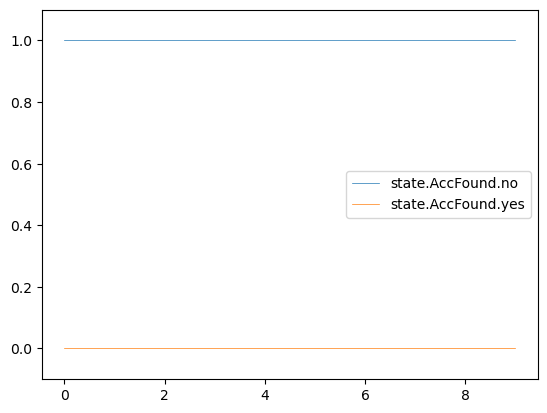

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0        LogIOCs       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop            Exit   
3                  1.0                   0.0            Nop             Nop   
4                  1.0                   0.0            Nop             Nop   
5                  1.0                   0.0            Nop             Nop   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                             none  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

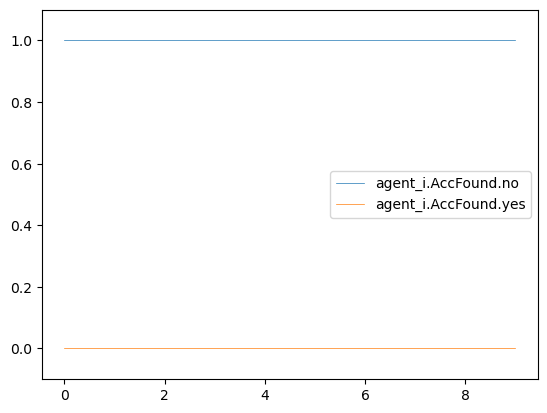

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0                  1.0                   0.0       FileRecon        LogIOCs   
1                  1.0                   0.0  ManipulateData            Nop   
2                  1.0                   0.0            Exit            Nop   
3                  1.0                   0.0             Nop            Nop   
4                  1.0                   0.0             Nop            Nop   
5                  1.0                   0.0             Nop            Nop   
6                  1.0                   0.0             Nop            Nop   
7                  1.0                   0.0             Nop            Nop   
8                  1.0                   0.0             Nop            Nop   
9                  1.0                   0.0             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                            auth                   user_files   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

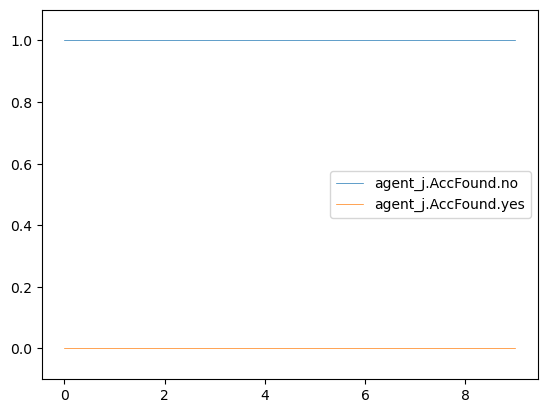

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action  agent_j.action
0                  1.0                   0.0        LogIOCs       FileRecon
1                  0.0                   1.0            Nop  ManipulateData
2                  0.0                   1.0            Nop            Exit
3                  0.0                   1.0            Nop             Nop
4                  0.0                   1.0            Nop             Nop
5                  0.0                   1.0            Nop             Nop
6                  0.0                   1.0            Nop             Nop
7                  0.0                   1.0            Nop             Nop
8                  0.0                   1.0            Nop             Nop
9                  0.0                   1.0            Nop             Nop

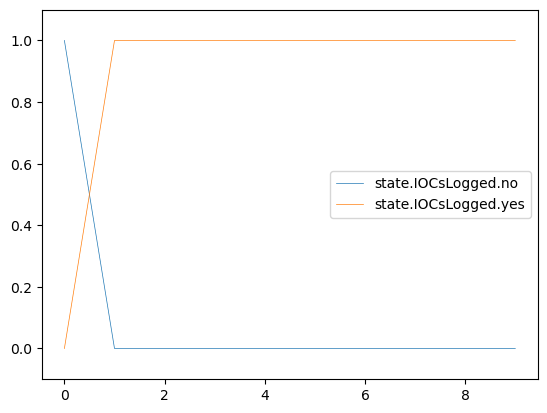

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

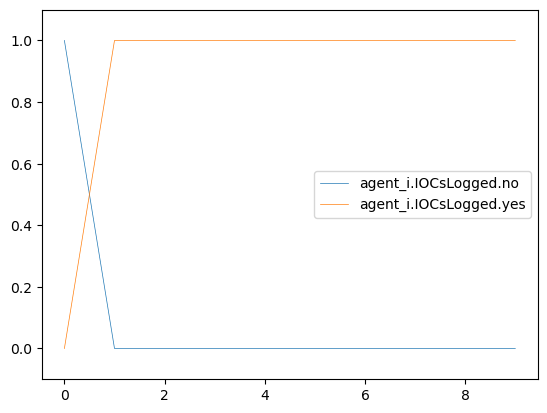

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0                   1.00                    0.00       FileRecon   
1                   0.65                    0.35  ManipulateData   
2                   0.65                    0.35            Exit   
3                   0.65                    0.35             Nop   
4                   0.65                    0.35             Nop   
5                   0.65                    0.35             Nop   
6                   0.65                    0.35             Nop   
7                   0.65                    0.35             Nop   
8                   0.65                    0.35             Nop   
9                   0.65                    0.35             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

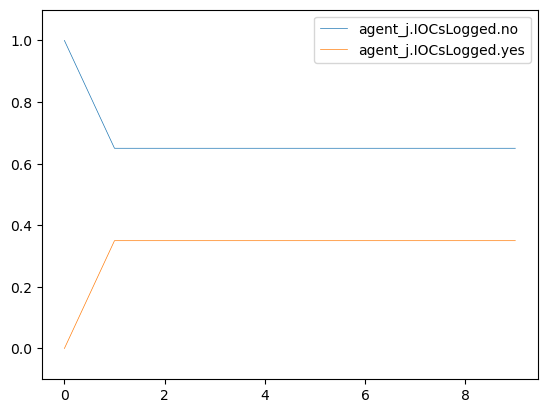

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0        LogIOCs       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

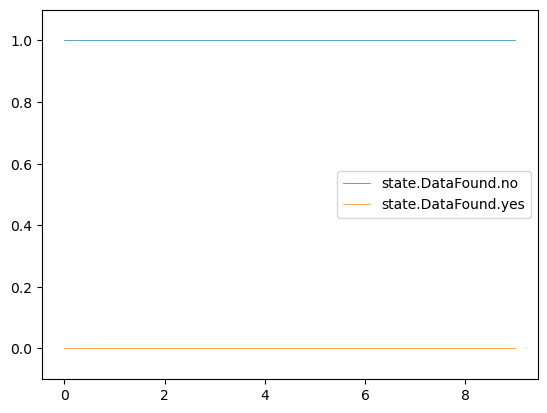

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0        LogIOCs       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop            Exit   
3                   1.0                    0.0            Nop             Nop   
4                   1.0                    0.0            Nop             Nop   
5                   1.0                    0.0            Nop             Nop   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                             none  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

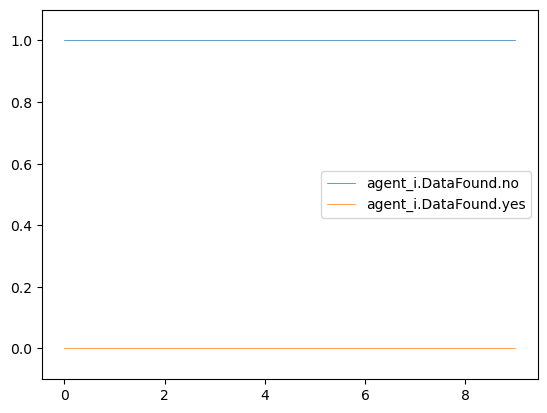

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon        LogIOCs   
1              0.207547               0.792453  ManipulateData            Nop   
2              0.992414               0.007586            Exit            Nop   
3              0.992414               0.007586             Nop            Nop   
4              0.992414               0.007586             Nop            Nop   
5              0.992414               0.007586             Nop            Nop   
6              0.992414               0.007586             Nop            Nop   
7              0.992414               0.007586             Nop            Nop   
8              0.992414               0.007586             Nop            Nop   
9              0.992414               0.007586             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                            auth                   user_files   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

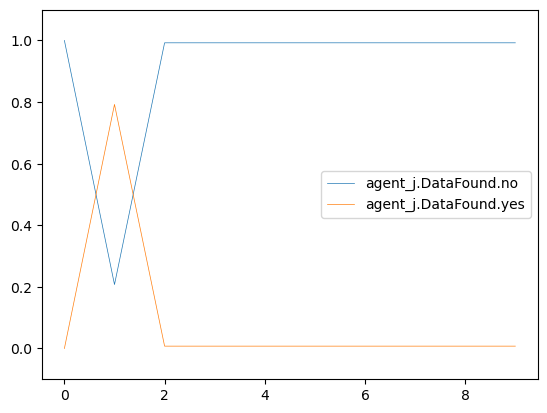

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0        LogIOCs       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

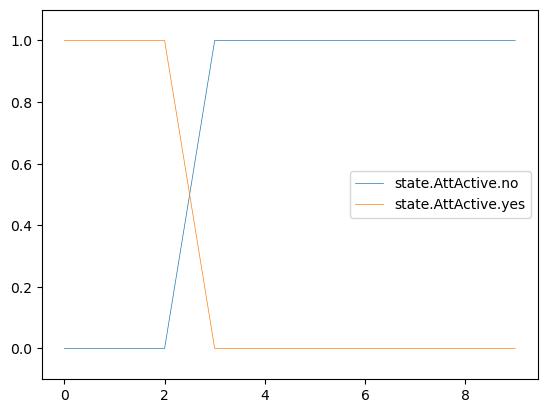

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000        LogIOCs       FileRecon   
1              0.000000               1.000000            Nop  ManipulateData   
2              0.626923               0.373077            Nop            Exit   
3              0.994808               0.005192            Nop             Nop   
4              1.000000               0.000000            Nop             Nop   
5              1.000000               0.000000            Nop             Nop   
6              1.000000               0.000000            Nop             Nop   
7              1.000000               0.000000            Nop             Nop   
8              1.000000               0.000000            Nop             Nop   
9              1.000000               0.000000            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                             none  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

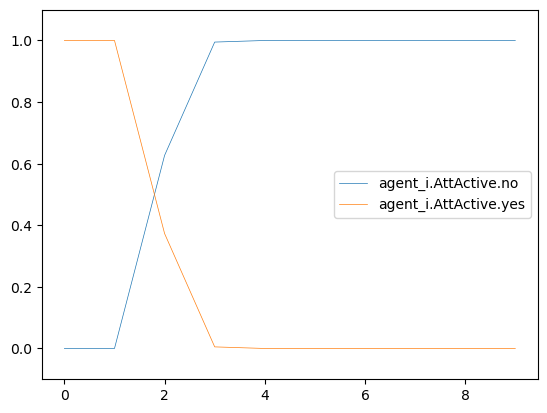

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon        LogIOCs   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0            Exit            Nop   
3                   1.0                    0.0             Nop            Nop   
4                   1.0                    0.0             Nop            Nop   
5                   1.0                    0.0             Nop            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                   user_files   
2                          denied                   user_files   
3                            auth                   user_files   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                   user_files   
8                          denied                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

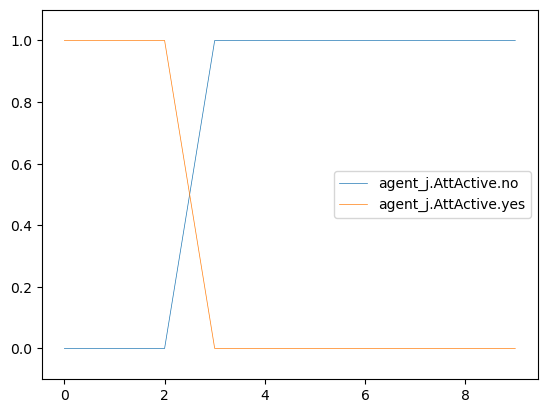

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

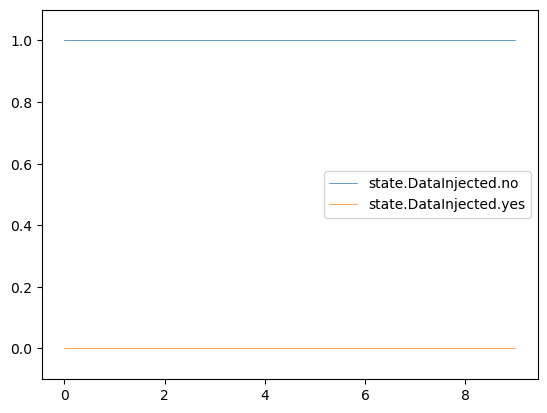

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

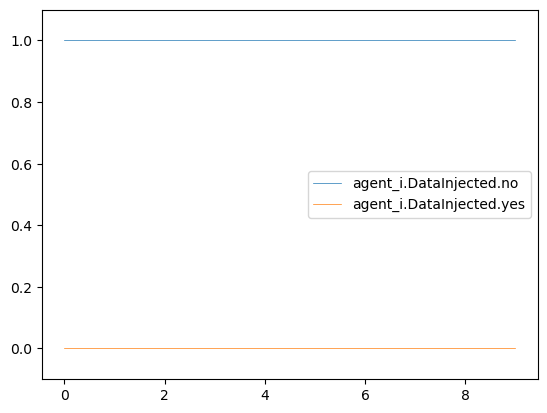

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.992414                  0.007586            Exit   
3                 0.992414                  0.007586             Nop   
4                 0.992414                  0.007586             Nop   
5                 0.992414                  0.007586             Nop   
6                 0.992414                  0.007586             Nop   
7                 0.992414                  0.007586             Nop   
8                 0.992414                  0.007586             Nop   
9                 0.992414                  0.007586             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

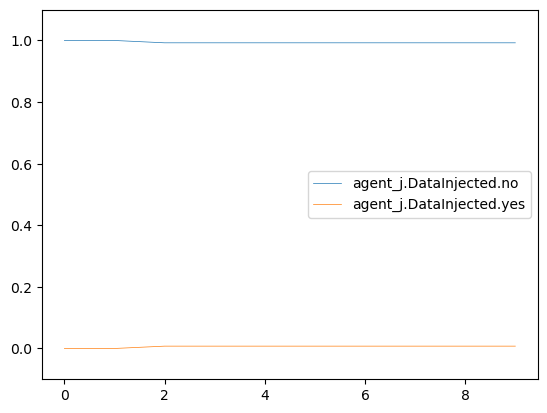

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

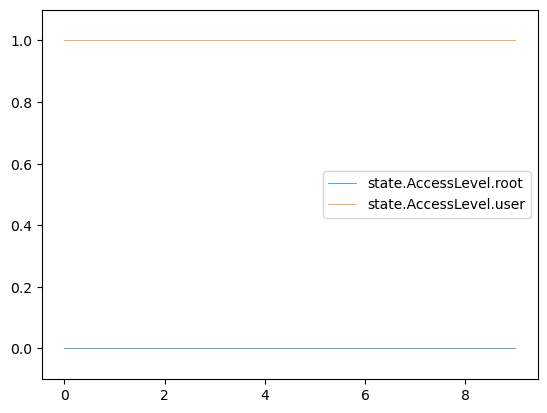

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

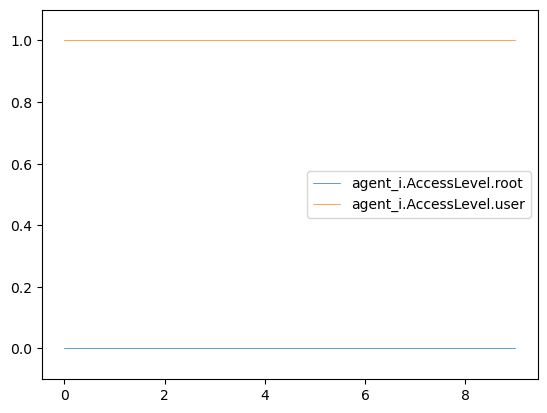

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

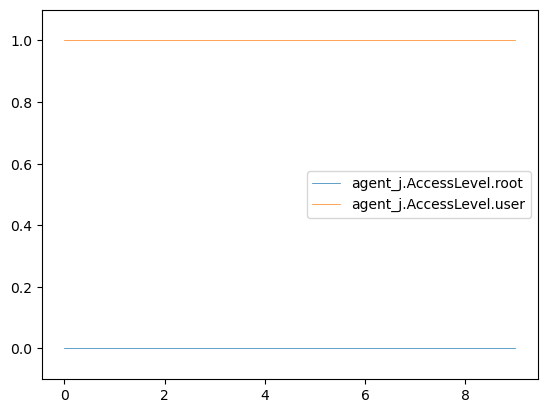

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0        LogIOCs       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop            Exit
3                   1.0                   0.0            Nop             Nop
4                   1.0                   0.0            Nop             Nop
5                   1.0                   0.0            Nop             Nop
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

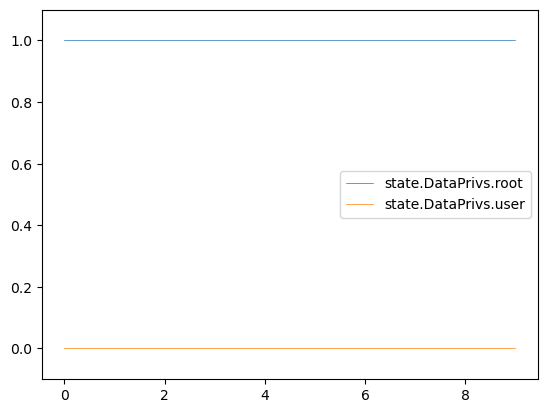

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

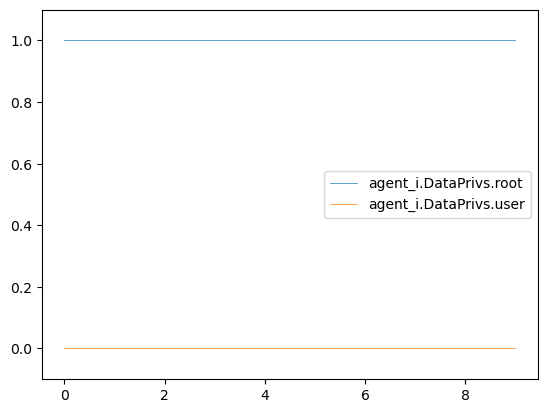

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.125786                0.874214  ManipulateData   
2                0.601463                0.398537            Exit   
3                0.601463                0.398537             Nop   
4                0.601463                0.398537             Nop   
5                0.601463                0.398537             Nop   
6                0.601463                0.398537             Nop   
7                0.601463                0.398537             Nop   
8                0.601463                0.398537             Nop   
9                0.601463                0.398537             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

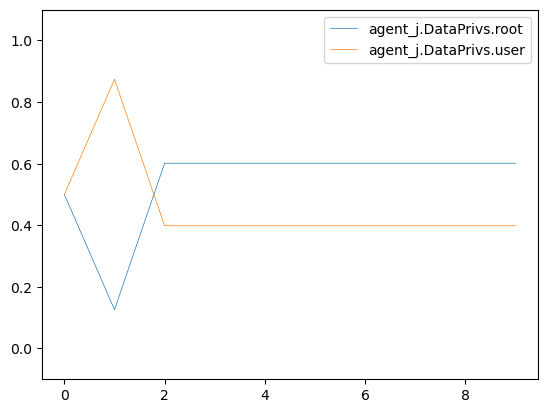

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0        LogIOCs       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop            Exit
3                   0.0                    1.0            Nop             Nop
4                   0.0                    1.0            Nop             Nop
5                   0.0                    1.0            Nop             Nop
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

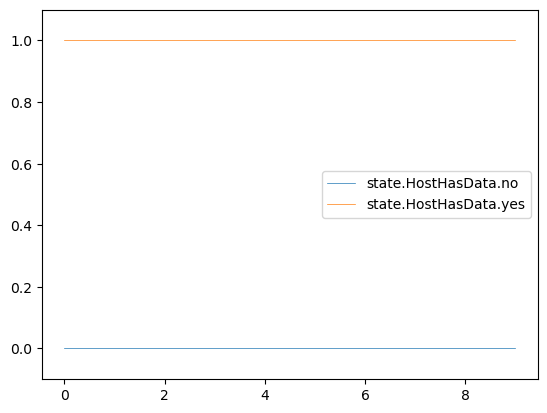

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                        file_enum  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

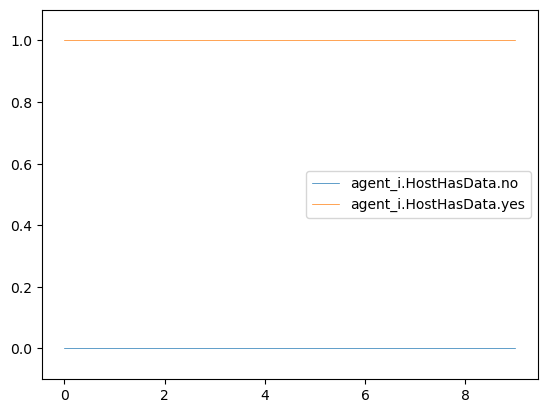

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.125786                 0.874214  ManipulateData   
2                0.601463                 0.398537            Exit   
3                0.601463                 0.398537             Nop   
4                0.601463                 0.398537             Nop   
5                0.601463                 0.398537             Nop   
6                0.601463                 0.398537             Nop   
7                0.601463                 0.398537             Nop   
8                0.601463                 0.398537             Nop   
9                0.601463                 0.398537             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                            auth                   user_files   
2            Nop                          denied                   user_files   
3            Nop                            auth                   user_files   
4            Nop                            auth                   user_files   
5            Nop                            auth                   user_files   
6            Nop                          denied                         none   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

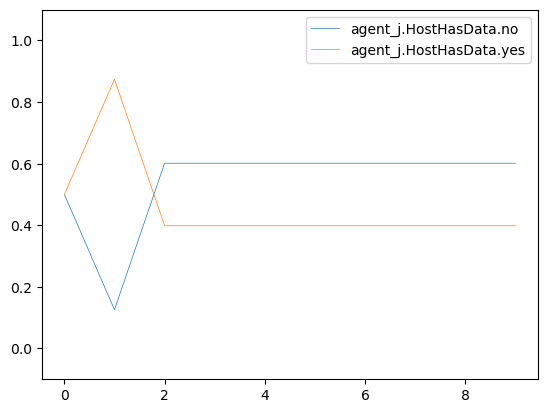

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

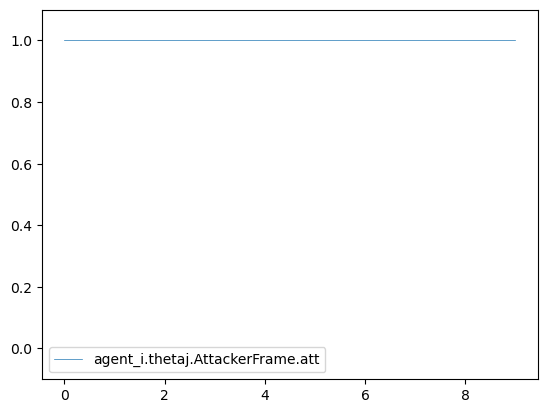

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

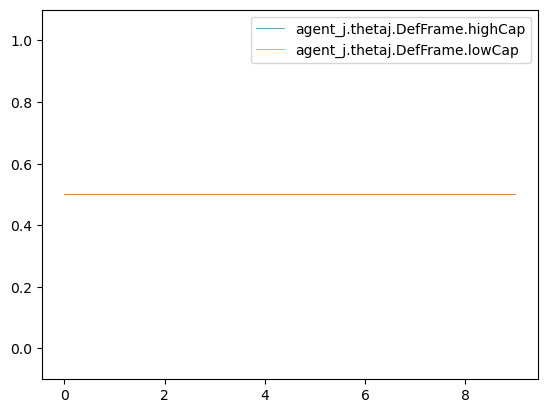

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

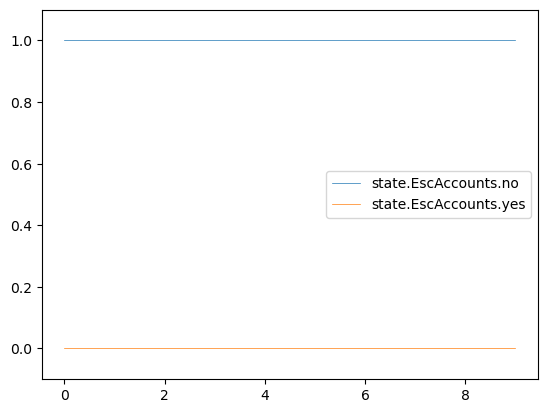

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

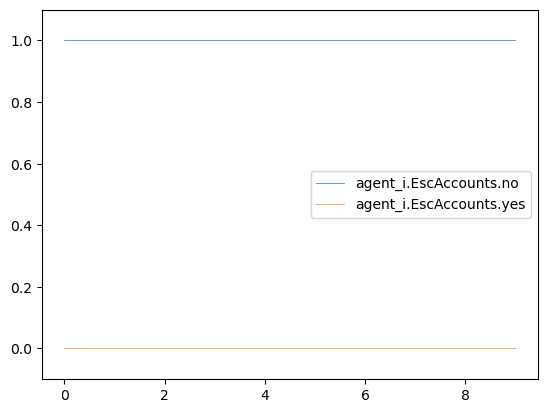

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500           Exit   
2                   0.325                    0.675            Nop   
3                   0.325                    0.675            Nop   
4                   0.325                    0.675            Nop   
5                   0.325                    0.675            Nop   
6                   0.325                    0.675            Nop   
7                   0.325                    0.675            Nop   
8                   0.325                    0.675            Nop   
9                   0.325                    0.675            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

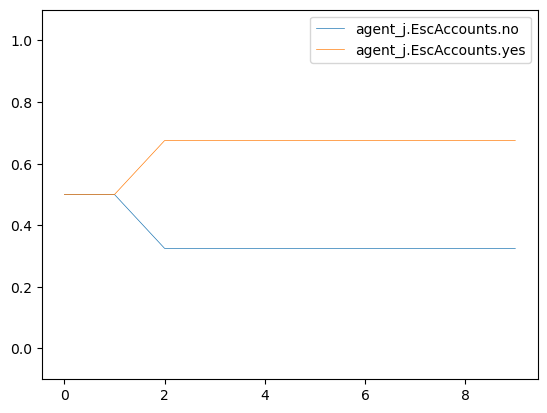

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

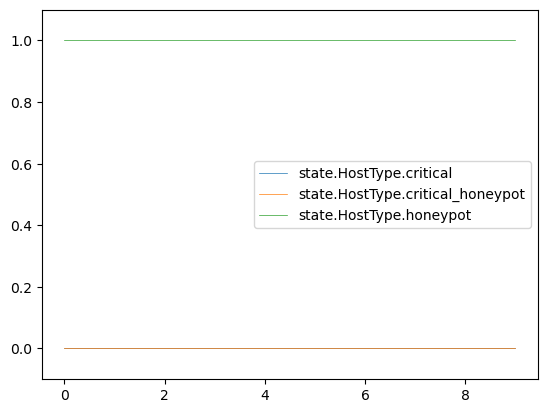

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

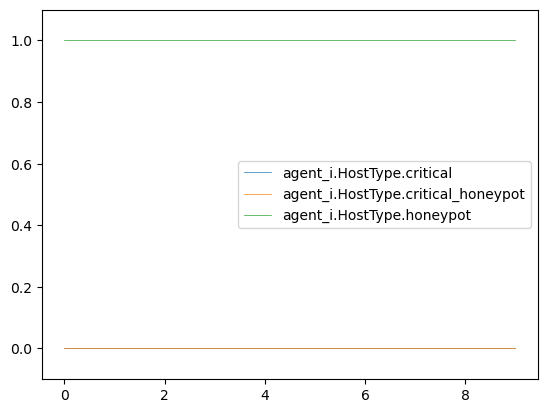

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.3                                 0.0   
2                        0.3                                 0.0   
3                        0.3                                 0.0   
4                        0.3                                 0.0   
5                        0.3                                 0.0   
6                        0.3                                 0.0   
7                        0.3                                 0.0   
8                        0.3                                 0.0   
9                        0.3                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon        LogIOCs   
1                        0.7           Exit            Nop   
2                        0.7            Nop            Nop   
3                        0.7            Nop            Nop   
4                        0.7            Nop            Nop   
5                        0.7            Nop            Nop   
6                        0.7            Nop            Nop   
7                        0.7            Nop            Nop   
8                        0.7            Nop            Nop   
9                        0.7            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

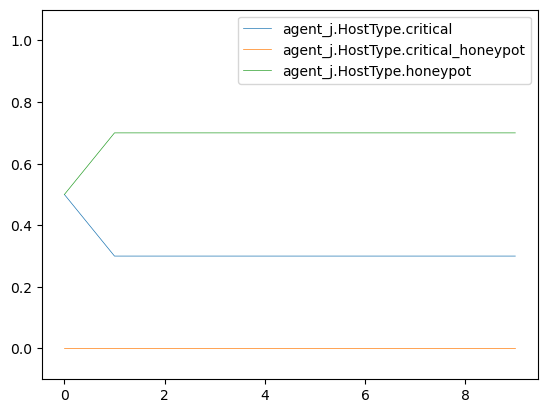

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

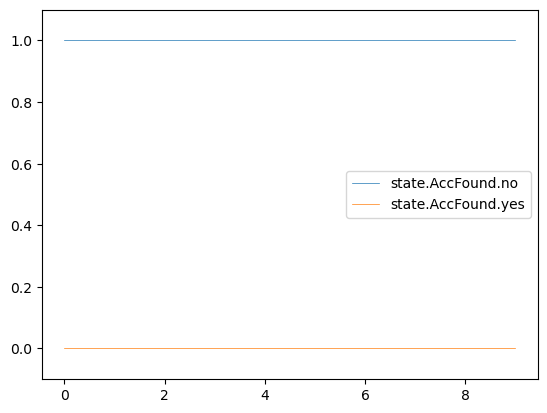

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

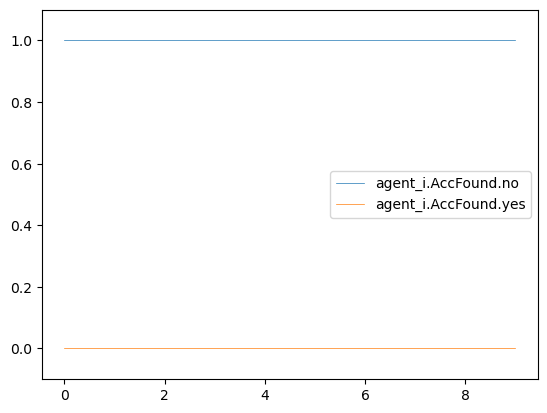

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon        LogIOCs   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

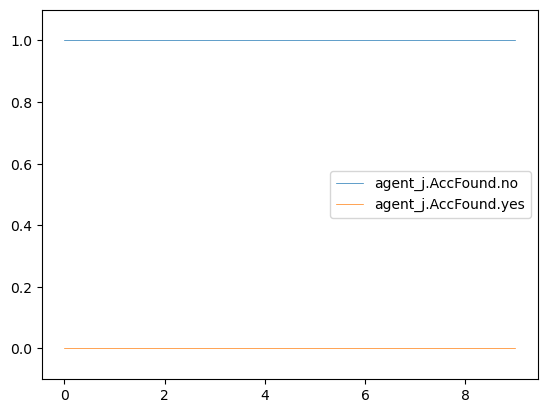

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

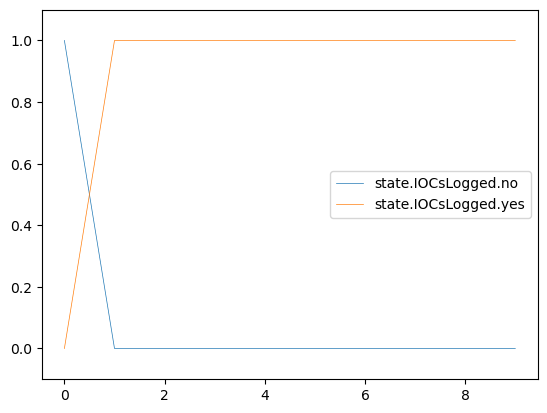

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

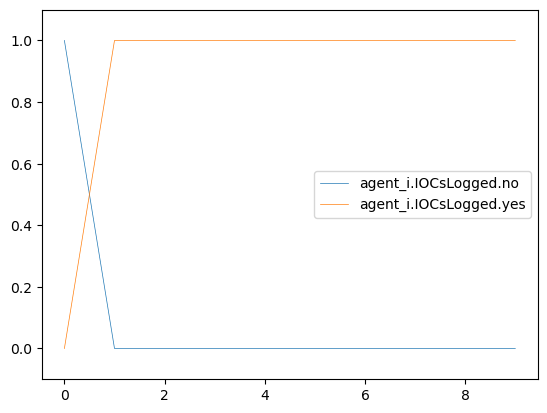

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00      FileRecon   
1                   0.65                    0.35           Exit   
2                   0.65                    0.35            Nop   
3                   0.65                    0.35            Nop   
4                   0.65                    0.35            Nop   
5                   0.65                    0.35            Nop   
6                   0.65                    0.35            Nop   
7                   0.65                    0.35            Nop   
8                   0.65                    0.35            Nop   
9                   0.65                    0.35            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

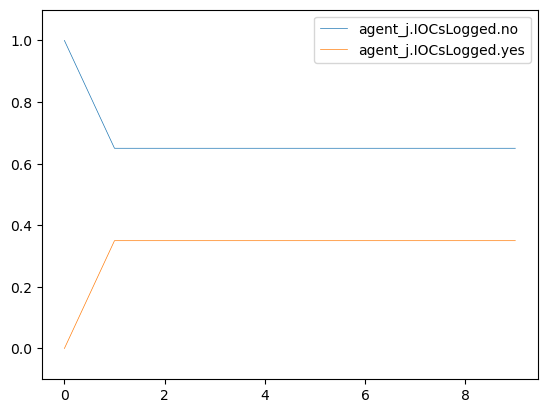

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

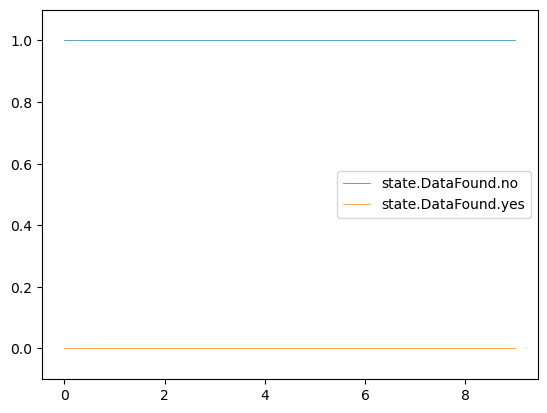

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

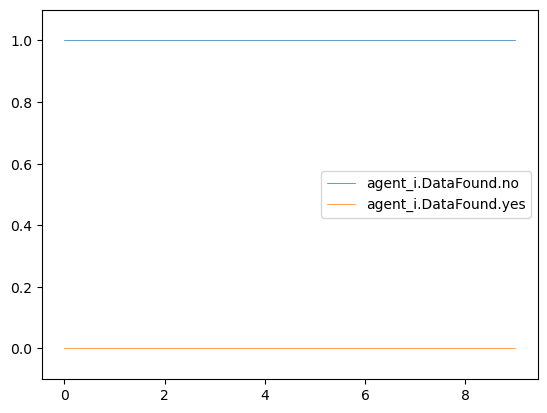

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016           Exit            Nop   
2              0.954984               0.045016            Nop            Nop   
3              0.954984               0.045016            Nop            Nop   
4              0.954984               0.045016            Nop            Nop   
5              0.954984               0.045016            Nop            Nop   
6              0.954984               0.045016            Nop            Nop   
7              0.954984               0.045016            Nop            Nop   
8              0.954984               0.045016            Nop            Nop   
9              0.954984               0.045016            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

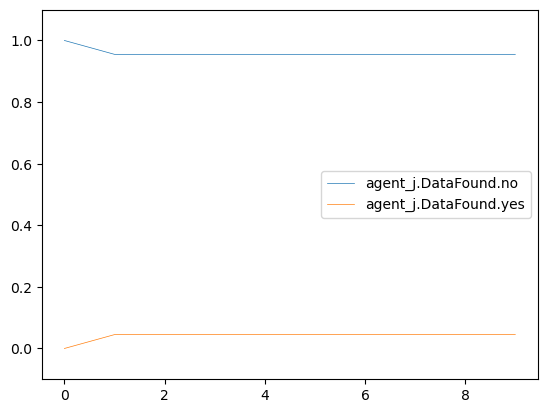

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

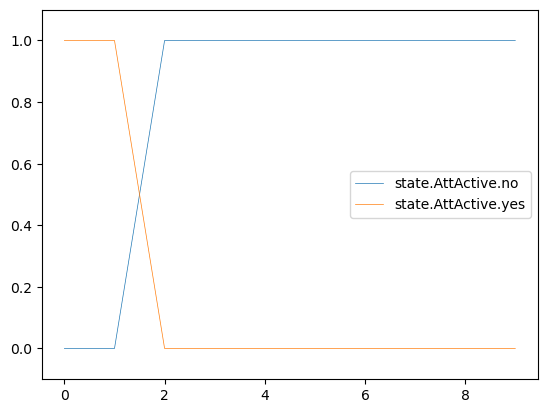

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000            Nop           Exit   
2              0.968591               0.031409            Nop            Nop   
3              0.998854               0.001146            Nop            Nop   
4              1.000000               0.000000            Nop            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

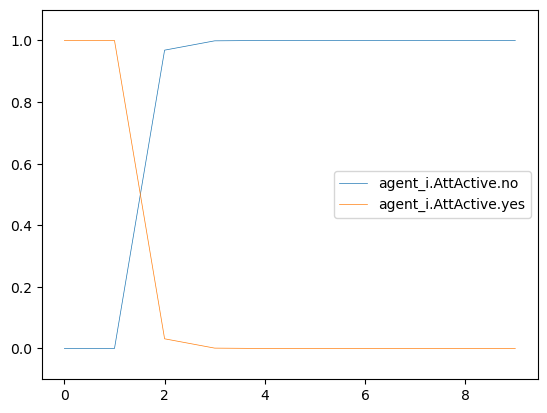

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

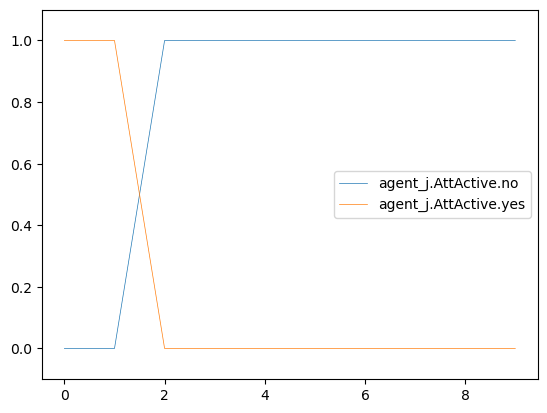

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

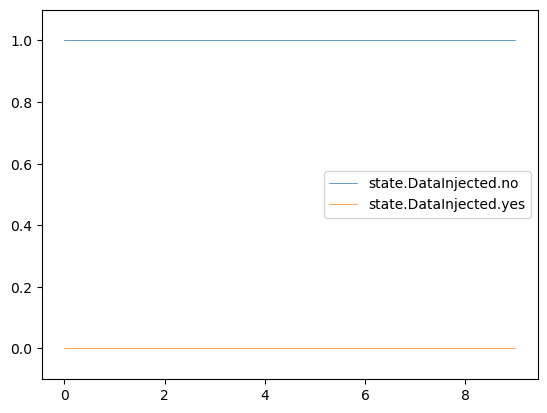

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

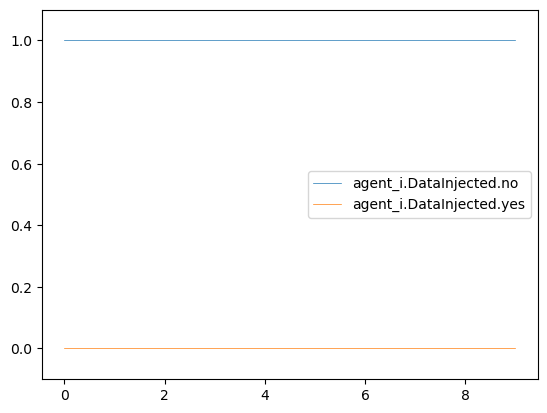

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

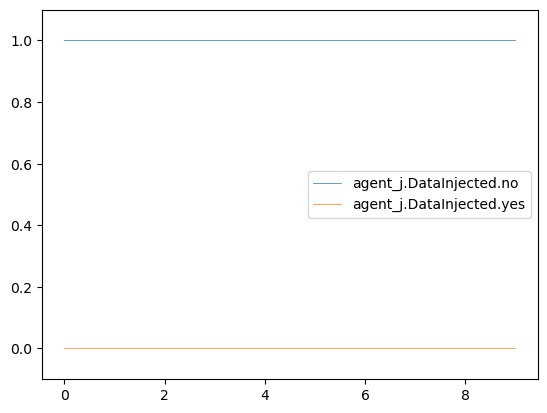

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

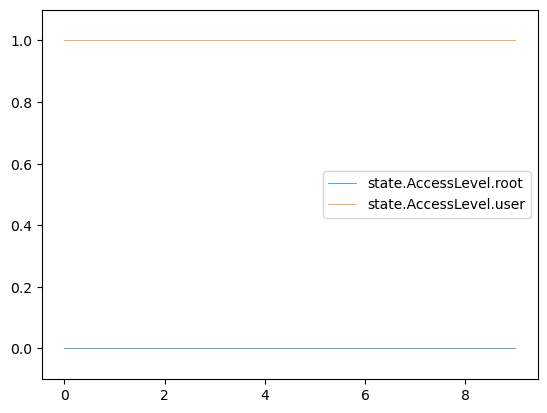

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

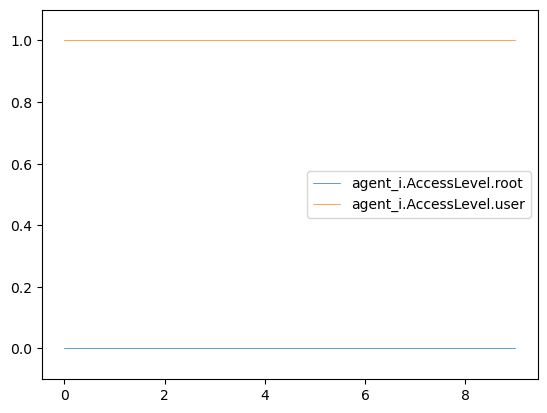

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                         none   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

In [ ]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    